<a href="https://colab.research.google.com/github/damithdev/twitter-news-scraping/blob/master/Twitter_Scraping_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Text Analytics Coursework - MSc in Big Data Analytics
#### July 2020

###### Name: Damith Warnakulasuriya
###### IIT ID: 20191273
###### RGU ID: 1915109

### Answer (a)

Initializing necessary configurations

In [ ]:
!pip install twitter # Installig Twitter


     |████████████████████████████████| 61kB 1.8MB/s 


###Constants

In [ ]:
CONSUMER_KEY = 'C1El96xn4a6MF7WiStKCtWddQ'
CONSUMER_SECRET = '58F2JF3POHCXv29pm7mZUCoo7NKpN4F5NwV2KZv0AUqXO0i5Ua'
OAUTH_TOKEN = '382034120-sH3bbj7RlOK7Lff1z8gvdjbL1E2QXRBUB4WXyel0'
OAUTH_TOKEN_SECRET = 'K6tNUIhSqCjgBg3Xg7wLD7XiQGsr861I2MSeRIwBVIx22'

bbc_screen_name = "BBCWorld"
cnn_screen_name = "CNN"

screen_names = [cnn_screen_name,bbc_screen_name]
min_pull_count = 10000;
item_pull_count = round(min_pull_count/len(screen_names))



Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Initializing Twitter API

In [ ]:
import twitter # Twitter lib


auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth) # Initialize twitter api

type(twitter_api)

twitter.api.Twitter

Necessary Imports

In [ ]:
import traceback
from urllib.parse import urlparse # parse urls into 6 components
from bs4 import BeautifulSoup # for pulling data out of HTML and XML files
import re
import requests
import time
import csv
import pandas as pd 

**function get_end_url**

*get expanded url from the tweet object*
*if the url is a tweet url get the tweet html and parse the website url*

returns re-directed webpage url

In [ ]:


def get_end_url(item):
  # print(item)
  try:
    url = item['entities']['urls'][0]['expanded_url']
    r = requests.get(url)
    # print(r.url)
    parsed_uri = urlparse(r.url)
    result = '{uri.netloc}'.format(uri=parsed_uri)
    # print(result)
    if 'twitter' in result:
      id_of_tweet = item['id']
      time.sleep(4)
      html = twitter_api.statuses.oembed(_id=id_of_tweet)['html']
      # print(html)
      soup = BeautifulSoup(html)
      url = soup.p.a['href']
      r = requests.get(url)

    url = r.url

    # print(str(itr) +":"+ url)

    parsed_uri = urlparse(r.url)
    result = '{uri.netloc}'.format(uri=parsed_uri)
    if 'twitter' in result:
      return None;
    return url
  
  except Exception as e:
    print("exception")
    print(e)
    traceback.print_exc()
    return None    


builds the urls list until it reaches the minimum url count

fetch twitter user timeline continuously backwards,
extract url then find the end url using above method

then backup the urls to google drive for future use

In [ ]:


tweets = []
end_urls = []
newslist = {}

itr = 0

for item in screen_names:
  print(item)
  
  retries = 0;
  item_tweets = []
  max_id = None
  item_urls = []

  while len(item_urls) < item_pull_count:
    if retries > 30 : break;

    if max_id is not None:
      res = twitter_api.statuses.user_timeline(screen_name=item,count=item_pull_count,max_id=max_id)
    else :
      res = twitter_api.statuses.user_timeline(screen_name=item,count=item_pull_count)
    item_tweets += res
    last = res[len(res)-1]
    max_id = last['id']
    print(len(item_tweets))
    retries =+ 1

    for tweet in res:
      # if itr > 5 :
      #   retries = 11;
      #   itr = 0
      #   break;

      urls = tweet['entities']['urls']
      if urls == [] : continue
      url = urls[0]['expanded_url']
      newslist[url] = tweet
      resurl = get_end_url(tweet)
      if resurl is not None : 
        item_urls.append(resurl)
        itr += 1
        print(str(itr)+" - " + resurl)

  tweets += item_tweets
  end_urls += item_urls

print("TOTAL TWEETS:" + str(len(tweets)))
print("TOTAL URLS:" + str(len(end_urls)))


#Save to csv using panas for reference
tempdf = pd.DataFrame(end_urls)
csv_data = tempdf.to_csv('news_urls_big.csv',index=False)
!cp news_urls_big.csv "/content/gdrive/My Drive/colab_data"

print("COMPLETE")

CNN
200
1 - https://www.cnn.com/2020/07/21/business/walmart-thanksgiving-day-closed/index.html?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-21T17%3A53%3A03
2 - https://www.cnn.com/2020/07/21/asia/india-yellow-turtle-found-scli-intl/index.html?utm_source=twCNN&utm_medium=social&utm_content=2020-07-21T17%3A44%3A04&utm_term=link
3 - https://www.cnn.com/2020/07/21/health/cinnamon-prediabetes-wellness/index.html?utm_source=twCNN&utm_medium=social&utm_content=2020-07-21T17%3A35%3A01&utm_term=link
4 - https://www.cnn.com/2020/07/21/world/greta-thunberg-donate-covid-amazon-trnd/index.html?utm_medium=social&utm_content=2020-07-21T17%3A24%3A33&utm_source=twCNN&utm_term=link
5 - https://www.cnn.com/2020/07/21/business/winn-dixie-mask-policy-reversal/index.html?utm_term=link&utm_content=2020-07-21T16%3A46%3A05&utm_source=twCNN&utm_medium=social
6 - https://www.cnn.com/2020/07/21/politics/fact-check-trump-ad-biden-police-911/index.html?utm_term=link&utm_medium=social&utm_con

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py", line 384, in _make_request
    six.raise_from(e, None)
  File "<string>", line 2, in raise_from
  File "/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py", line 380, in _make_request
    httplib_response = conn.getresponse()
  File "/usr/lib/python3.6/http/client.py", line 1356, in getresponse
    response.begin()
  File "/usr/lib/python3.6/http/client.py", line 307, in begin
    version, status, reason = self._read_status()
  File "/usr/lib/python3.6/http/client.py", line 268, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/usr/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  File "/usr/lib/python3.6/ssl.py", line 1012, in recv_into
    return self.read(nbytes, buffer)
  Fil

29 - https://www.cnn.com/2020/07/21/tech/linkedin-layoffs/index.html
30 - https://www.cnn.com/projects/ppp-business-loans/?utm_medium=social&utm_source=twCNN&utm_content=2020-07-21T11%3A02%3A05&utm_term=link
31 - https://www.cnn.com/2020/07/21/politics/joe-biden-caregiving-plan/index.html
32 - https://www.cnn.com/2020/07/15/health/n95-mask-inventor-coronavirus-sanjay-wellness-trnd/index.html?utm_medium=social&utm_content=2020-07-21T10%3A41%3A05&utm_term=link&utm_source=twCNN
33 - https://www.cnn.com/2020/07/21/health/racism-cognitive-function-study-wellness/index.html
34 - https://www.cnn.com/2020/07/20/us/alvin-ailey-dance-school-troy-powell-invs/index.html
35 - https://www.cnn.com/2020/07/21/politics/us-ukraine-navy/index.html
36 - https://www.cnn.com/2020/07/20/us/wall-of-moms-portland-protest-trnd/index.html
37 - https://www.cnn.com/2020/07/21/business/us-sanctions-china-companies-xinjiang-intl-hnk/index.html
38 - https://www.cnn.com/2020/07/21/us/san-francisco-giants-kneel-nationa

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/urllib3/response.py", line 362, in _error_catcher
    yield
  File "/usr/local/lib/python3.6/dist-packages/urllib3/response.py", line 444, in read
    data = self._fp.read(amt)
  File "/usr/lib/python3.6/http/client.py", line 459, in read
    n = self.readinto(b)
  File "/usr/lib/python3.6/http/client.py", line 503, in readinto
    n = self.fp.readinto(b)
  File "/usr/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  File "/usr/lib/python3.6/ssl.py", line 1012, in recv_into
    return self.read(nbytes, buffer)
  File "/usr/lib/python3.6/ssl.py", line 874, in read
    return self._sslobj.read(len, buffer)
  File "/usr/lib/python3.6/ssl.py", line 631, in read
    v = self._sslobj.read(len, buffer)
ConnectionResetError: [Errno 104] Connection reset by peer

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/l

219 - https://www.cnn.com/2020/07/14/us/alligator-kayak-trnd/index.html?utm_source=twCNN&utm_content=2020-07-19T10%3A31%3A06&utm_medium=social&utm_term=video
220 - https://www.cnn.com/2020/07/13/success/ford-bronco-2021-reveal/index.html?utm_term=video&utm_content=2020-07-19T10%3A16%3A04&utm_medium=social&utm_source=twCNN
221 - https://www.cnn.com/2020/07/16/world/solar-orbiter-first-closest-images-sun-campfires-scn-trnd/index.html?utm_content=2020-07-19T10%3A01%3A03&utm_medium=social&utm_source=twCNN&utm_term=link
222 - https://edition.cnn.com/travel/article/horse-island-ireland-sold-scli-intl/index.html?utm_term=video&utm_medium=social&utm_content=2020-07-19T09%3A31%3A06&utm_source=twCNN
223 - https://edition.cnn.com/travel/article/svalbard-norway-arctic-ice/index.html?utm_content=2020-07-19T09%3A16%3A03&utm_source=twCNN&utm_medium=social&utm_term=video
224 - https://www.cnn.com/2020/07/17/business/boeing-747-british-airways/index.html?utm_medium=social&utm_source=twCNN&utm_content=2

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/urllib3/response.py", line 362, in _error_catcher
    yield
  File "/usr/local/lib/python3.6/dist-packages/urllib3/response.py", line 444, in read
    data = self._fp.read(amt)
  File "/usr/lib/python3.6/http/client.py", line 459, in read
    n = self.readinto(b)
  File "/usr/lib/python3.6/http/client.py", line 503, in readinto
    n = self.fp.readinto(b)
  File "/usr/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  File "/usr/lib/python3.6/ssl.py", line 1012, in recv_into
    return self.read(nbytes, buffer)
  File "/usr/lib/python3.6/ssl.py", line 874, in read
    return self._sslobj.read(len, buffer)
  File "/usr/lib/python3.6/ssl.py", line 631, in read
    v = self._sslobj.read(len, buffer)
ConnectionResetError: [Errno 104] Connection reset by peer

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/l

733 - https://www.cnn.com/2020/07/14/tech/apple-slow-iphone-settlement-payouts/index.html?utm_medium=social&utm_content=2020-07-14T20%3A11%3A05&utm_source=twCNN&utm_term=link
734 - https://www.cnn.com/2020/07/14/economy/france-healthcare-workers-pay-intl/index.html?utm_term=link&utm_content=2020-07-14T20%3A01%3A04&utm_medium=social&utm_source=twCNN
735 - https://www.cnn.com/2020/07/14/business/best-buy-mask-requirement/index.html?utm_content=2020-07-14T19%3A51%3A02&utm_medium=social&utm_source=twCNN&utm_term=link
736 - https://www.cnn.com/2020/07/14/us/ghislaine-maxwell-pleads-not-guilty/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-14T19:41:25
737 - https://www.cnn.com/2020/07/14/politics/donald-trump-fauci-2020-campaign/index.html?utm_term=link&utm_content=2020-07-14T19%3A41%3A00&utm_medium=social&utm_source=twCNN
738 - https://www.cnn.com/2020/07/14/politics/immigration-harvard-visa-policy-online-only/index.html?utm_term=link&utm_content=2020-07-14T19%3A39%3A37&u

Prints list of end urls found

**Fetch URLs Backup file form github gist**

In [ ]:
news_urls = 'https://github.com/damithdev/public_files/blob/master/news_urls.csv?raw=true'

news_urls_df = pd.read_csv(news_urls)



**Fetch Article Data from the URL list**

Extract the article body from the html.
Store extracted data in article_data.csv.
Backup article_data.csv to google drive for future use

In [ ]:
print("Before fetching urls - "+ str(len(news_urls_df)))

articles = {}
errors = 0

itr = 0
for index, row in news_urls_df.iterrows():
  url = row['0']
  itr += 1
  
  try:
    r = requests.get(url)
    print(r.url)
    page = r.text
    soup = BeautifulSoup(page)
    title = soup.title 
    print(title)
    if title is not None:
      title = title.string
      content = ""
      flag = ""

      parsed_uri = urlparse(r.url)
      screen = '{uri.netloc}'.format(uri=parsed_uri)
      print(screen)
      if 'cnn' in screen:
          header = soup.find("h1", {"class": "pg-headline"})
          content = header.find_parent("div", {"class": "l-container"})
          flag = "CNN"
      elif 'bbc' in screen:
          flag = "BBC"
          content = soup.find(property="articleBody")
      else:
        raise Exception("Cannot Determine News Type")
      
      print(flag)
      title = title.string.split('- CNN')[0]
      print(title)
      if content is not None:articles[title]={'Title':title,'Content':content}
      print(str(len(articles)) + ":"+ title)
      print('=============================================================')
  except Exception as e:
    errors += 1
    print("exception")
    print(e)
    traceback.print_exc()

print("after fetching urls, articles based on unique titles (duplicate removal based on title) - "+ str(len(articles)))



csv_columns = ['Title','Content']
dict_data = []

for post in articles.values():
  dict_data.append(post)

# print(dict_data)

csv_file = "article_data.csv"
try:
    with open(csv_file, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        for data in dict_data:
            writer.writerow(data)
    
    print("Success")
    !cp article_data.csv "/content/gdrive/My Drive/colab_data"
except IOError:
    errors += 1
    print("I/O error")

print("Errors: " + str(articles))
print("Successful: "+ str(len(dict_data)))

Before fetching urls - 2678
https://www.cnn.com/2020/07/19/politics/coronavirus-stimulus-negotiations-white-house/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-20T12%3A45%3A02&utm_term=link
<title>Stimulus bill: White House chief of staff says stimulus negotiations will start 'in earnest' on Monday - CNNPolitics</title>
www.cnn.com
CNN
Stimulus bill: White House chief of staff says stimulus negotiations will start 'in earnest' on Monday 
1:Stimulus bill: White House chief of staff says stimulus negotiations will start 'in earnest' on Monday 
https://www.cnn.com/2020/07/20/asia/coronavirus-xinjiang-urumqi-intl-hnk/index.html?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-20T12%3A30%3A09
<title>Xinjiang capital in lockdown over spike in coronavirus cases - CNN</title>
www.cnn.com
CNN
Xinjiang capital in lockdown over spike in coronavirus cases 
2:Xinjiang capital in lockdown over spike in coronavirus cases 
https://www.cnn.com/2020/07/19/entertai

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/12/us/atlanta-coronavirus-guitarist-skateboard-instagram-chavis-flagg-trnd/index.html?utm_term=video&utm_content=2020-07-20T07%3A00%3A12&utm_medium=social&utm_source=twCNN
<title>Atlanta artist Chavis Flagg won't be stopped from making music during the coronavirus pandemic - CNN</title>
www.cnn.com
CNN
Atlanta artist Chavis Flagg won't be stopped from making music during the coronavirus pandemic 
23:Atlanta artist Chavis Flagg won't be stopped from making music during the coronavirus pandemic 
https://edition.cnn.com/travel/article/svalbard-norway-arctic-ice/index.html?utm_content=2020-07-20T06%3A31%3A06&utm_source=twCNN&utm_medium=social&utm_term=video
<title data-rh="true">Svalbard, Norway: One woman, four men and weeks in the Arctic ice | CNN Travel</title>
edition.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/16/world/metal-eating-bacteria-intl-scli-scn/index.html?utm_term=link&utm_content=2020-07-20T06%3A01%3A05&utm_source=twCNN&utm_medium=social
<title>Bacteria that eats metal accidentally discovered by scientists - CNN</title>
www.cnn.com
CNN
Bacteria that eats metal accidentally discovered by scientists 
24:Bacteria that eats metal accidentally discovered by scientists 
https://www.cnn.com/2020/07/15/health/n95-mask-inventor-coronavirus-sanjay-wellness-trnd/index.html?utm_term=link&utm_content=2020-07-20T05%3A05%3A03&utm_medium=social&utm_source=twCNN
<title>Peter Tsai, inventor of the N95 mask filter, is on a mission to help healthcare workers - CNN</title>
www.cnn.com
CNN
Peter Tsai, inventor of the N95 mask filter, is on a mission to help healthcare workers 
25:Peter Tsai, inventor of the N95 mask filter, is on a mission to help healthcare workers 
https://www.cnn.com/videos/business/2020/07/16/what-is-inflation-orig.cnn-business?utm_medium=social&utm_term

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/14/health/throat-worm-japan-intl-scli/index.html?utm_term=link&utm_source=twCNN&utm_content=2020-07-20T04%3A01%3A05&utm_medium=social
<title>Doctors remove live worm from woman's tonsil - CNN</title>
www.cnn.com
CNN
Doctors remove live worm from woman's tonsil 
26:Doctors remove live worm from woman's tonsil 
https://www.cnn.com/travel/article/southeast-asia-overtourism-coronavirus-intl-hnk/index.html?utm_source=twCNN&utm_term=link&utm_medium=social&utm_content=2020-07-20T03%3A31%3A06
<title data-rh="true">Before the virus, Asia's ecosystems were buckling under overtourism. When the tourists return, it has to be different | CNN Travel</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/10/health/covid-19-symptoms-new-knowledge-wellness/index.html?utm_content=2020-07-20T03%3A01%3A03&utm_medium=social&utm_term=link&utm_source=twCNN
<title>Covid-19 symptoms: What we know now and what to do - CNN</title>
www.cnn.com
CNN
Covid-19 symptoms: What we know now and what to do 
27:Covid-19 symptoms: What we know now and what to do 
https://edition.cnn.com/2020/07/09/asia/polynesia-america-intl-hnk-scli-scn/index.html?utm_source=twCNN&utm_term=link&utm_content=2020-07-20T02%3A01%3A03&utm_medium=social
<title>Indigenous Americans had contact with Polynesians 800 years ago, DNA study confirms - CNN</title>
edition.cnn.com
CNN
Indigenous Americans had contact with Polynesians 800 years ago, DNA study confirms 
28:Indigenous Americans had contact with Polynesians 800 years ago, DNA study confirms 
https://www.cnn.com/2020/07/13/world/ocean-investment-world-resources-institute-cte/index.html?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/15/us/north-carolina-asheville-reparations/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-19T22%3A30%3A04&utm_term=link
<title>Asheville, North Carolina, approves reparations for Black residents  - CNN</title>
www.cnn.com
CNN
Asheville, North Carolina, approves reparations for Black residents  
31:Asheville, North Carolina, approves reparations for Black residents  
https://www.cnn.com/2020/07/18/health/long-term-effects-young-people-covid-wellness/index.html?utm_content=2020-07-19T22%3A00%3A18&utm_medium=social&utm_source=twCNN&utm_term=link
<title>Young Covid-19 survivors warn they're still suffering - CNN</title>
www.cnn.com
CNN
Young Covid-19 survivors warn they're still suffering 
32:Young Covid-19 survivors warn they're still suffering 
https://www.cnn.com/2020/07/19/us/drones-nudity-minnesota-trnd/index.html?utm_source=twCNN&utm_content=2020-07-19T21%3A30%3A09&utm_medium=social&utm_term=link
<title>Police used drones to monitor nudi

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/18/us/john-lewis-ct-vivian-dead/index.html?utm_source=twCNN&utm_medium=social&utm_content=2020-07-19T13%3A16%3A07&utm_term=link
<title>The US loses two icons of the civil rights movement in one day  - CNN</title>
www.cnn.com
CNN
The US loses two icons of the civil rights movement in one day  
57:The US loses two icons of the civil rights movement in one day  
https://www.cnn.com/2020/07/15/us/north-carolina-asheville-reparations/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-19T13%3A01%3A03&utm_term=link
<title>Asheville, North Carolina, approves reparations for Black residents  - CNN</title>
www.cnn.com
CNN
Asheville, North Carolina, approves reparations for Black residents  
57:Asheville, North Carolina, approves reparations for Black residents  
https://www.cnn.com/2020/07/16/health/patient-symptom-cdc-study-wellness/index.html?utm_term=link&utm_content=2020-07-19T12%3A46%3A03&utm_source=twCNN&utm_medium=social
<title>Almost all Covid-1

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/17/health/covid-19-coronavirus-need-to-know-now-wellness-trnd/index.html?utm_source=twCNN&utm_content=2020-07-19T11%3A01%3A03&utm_medium=social&utm_term=link
<title>Covid-19: What we now know about the disease caused by the novel coronavirus - CNN</title>
www.cnn.com
CNN
Covid-19: What we now know about the disease caused by the novel coronavirus 
61:Covid-19: What we now know about the disease caused by the novel coronavirus 
https://www.cnn.com/2020/07/14/us/alligator-kayak-trnd/index.html?utm_source=twCNN&utm_content=2020-07-19T10%3A31%3A06&utm_medium=social&utm_term=video
<title>An alligator slammed into the side of a kayak, tipping the boater into the river - CNN</title>
www.cnn.com
CNN
An alligator slammed into the side of a kayak, tipping the boater into the river 
62:An alligator slammed into the side of a kayak, tipping the boater into the river 
https://www.cnn.com/2020/07/13/success/ford-bronco-2021-reveal/index.html?utm_term=video&utm_content=202

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'
Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://edition.cnn.com/travel/article/svalbard-norway-arctic-ice/index.html?utm_content=2020-07-19T09%3A16%3A03&utm_source=twCNN&utm_medium=social&utm_term=video
<title data-rh="true">Svalbard, Norway: One woman, four men and weeks in the Arctic ice | CNN Travel</title>
edition.cnn.com
exception
'NoneType' object has no attribute 'find_parent'
https://www.cnn.com/2020/07/17/business/boeing-747-british-airways/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-19T09%3A01%3A05&utm_term=link
<title>Boeing 747: British Airways is retiring its fleet of jumbo jets - CNN</title>
www.cnn.com
CNN
Boeing 747: British Airways is retiring its fleet of jumbo jets 
65:Boeing 747: British Airways is retiring its fleet of jumbo jets 
https://www.cnn.com/2020/07/15/health/eating-fish-protect-brain-air-pollution-wellness/index.html?utm_content=2020-07-19T08%3A46%3A03&utm_medium=social&utm_source=twCNN&utm_term=link
<title>Eating fish could help protect aging brains from air pollution, st

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/16/world/metal-eating-bacteria-intl-scli-scn/index.html?utm_term=link&utm_content=2020-07-19T07%3A01%3A06&utm_source=twCNN&utm_medium=social
<title>Bacteria that eats metal accidentally discovered by scientists - CNN</title>
www.cnn.com
CNN
Bacteria that eats metal accidentally discovered by scientists 
67:Bacteria that eats metal accidentally discovered by scientists 
https://edition.cnn.com/2020/07/17/sport/tuk-tuk-racing-sri-lanka-spt-intl/index.html?utm_medium=social&utm_term=video&utm_content=2020-07-19T06%3A31%3A03&utm_source=twCNN
<title>Tuk-tuk racing delivers thrills and spills - CNN</title>
edition.cnn.com
CNN
Tuk-tuk racing delivers thrills and spills 
68:Tuk-tuk racing delivers thrills and spills 
https://www.cnn.com/2020/07/15/us/11-year-old-shot-washington-dc-grandfather-response/index.html?utm_term=link&utm_medium=social&utm_source=twCNN&utm_content=2020-07-19T06%3A01%3A03
<title>He's been working with police to prevent crime for years. His gr

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


<title>Peter Tsai, inventor of the N95 mask filter, is on a mission to help healthcare workers - CNN</title>
www.cnn.com
CNN
Peter Tsai, inventor of the N95 mask filter, is on a mission to help healthcare workers 
69:Peter Tsai, inventor of the N95 mask filter, is on a mission to help healthcare workers 
https://www.cnn.com/2020/07/10/health/covid-19-symptoms-new-knowledge-wellness/index.html?utm_content=2020-07-19T04%3A30%3A04&utm_medium=social&utm_term=link&utm_source=twCNN
<title>Covid-19 symptoms: What we know now and what to do - CNN</title>
www.cnn.com
CNN
Covid-19 symptoms: What we know now and what to do 
69:Covid-19 symptoms: What we know now and what to do 
https://www.cnn.com/2020/07/14/health/throat-worm-japan-intl-scli/index.html?utm_term=link&utm_source=twCNN&utm_content=2020-07-19T04%3A01%3A02&utm_medium=social
<title>Doctors remove live worm from woman's tonsil - CNN</title>
www.cnn.com
CNN
Doctors remove live worm from woman's tonsil 
69:Doctors remove live worm from w

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/10/health/covid-19-symptoms-new-knowledge-wellness/index.html?utm_content=2020-07-19T03%3A01%3A04&utm_medium=social&utm_term=link&utm_source=twCNN
<title>Covid-19 symptoms: What we know now and what to do - CNN</title>
www.cnn.com
CNN
Covid-19 symptoms: What we know now and what to do 
69:Covid-19 symptoms: What we know now and what to do 
https://www.cnn.com/2020/07/18/weather/fewer-flights-covid-weather-forecast-hurricane-impact/index.html?utm_source=twCNN&utm_medium=social&utm_content=2020-07-19T02%3A30%3A07&utm_term=link
<title>Weather forecasts are less accurate because of Covid-19, a new study reveals - CNN</title>
www.cnn.com
CNN
Weather forecasts are less accurate because of Covid-19, a new study reveals 
70:Weather forecasts are less accurate because of Covid-19, a new study reveals 
https://www.cnn.com/2020/07/18/us/fahim-saleh-death-trnd/index.html?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-19T02%3A15%3A04
<title>Fahim Sa

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/17/politics/white-house-portraits-clinton-bush-trump/index.html?utm_source=twCNN&utm_medium=social&utm_content=2020-07-18T23%3A14%3A06&utm_term=link
<title>White House portraits of Bill Clinton and George W. Bush moved from prominent space to rarely used room - CNNPolitics</title>
www.cnn.com
CNN
White House portraits of Bill Clinton and George W. Bush moved from prominent space to rarely used room 
77:White House portraits of Bill Clinton and George W. Bush moved from prominent space to rarely used room 
https://www.cnn.com/2020/07/18/health/long-term-effects-young-people-covid-wellness/index.html?utm_content=2020-07-18T23%3A00%3A13&utm_medium=social&utm_source=twCNN&utm_term=link
<title>Young Covid-19 survivors warn they're still suffering - CNN</title>
www.cnn.com
CNN
Young Covid-19 survivors warn they're still suffering 
77:Young Covid-19 survivors warn they're still suffering 
https://www.cnn.com/2020/07/18/politics/fact-check-trump-june-july-2020/index

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/us/live-news/john-lewis-dies/h_65ad2c9cb029896fff51bb80f28b7b43?utm_term=link&utm_content=2020-07-18T13%3A07%3A02&utm_source=twCNN&utm_medium=social
<title data-rh="true">Barack Obama: Lewis "will continue, even in his passing, to serve as a beacon"</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'
https://www.cnn.com/videos/us/2020/07/16/jewelry-store-treasure-hunt-newsource-orig.cnn?utm_term=video&utm_medium=social&utm_source=twCNN&utm_content=2020-07-17T00%3A21%3A26


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'
Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


<title>Store buries roughly $1M in jewelry creating treasure hunt - CNN Video</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'
https://www.cnn.com/2020/07/18/health/long-term-effects-young-people-covid-wellness/index.html?utm_content=2020-07-18T12%3A44%3A06&utm_medium=social&utm_source=twCNN&utm_term=image
<title>Young Covid-19 survivors warn they're still suffering - CNN</title>
www.cnn.com
CNN
Young Covid-19 survivors warn they're still suffering 
104:Young Covid-19 survivors warn they're still suffering 
https://www.cnn.com/2020/07/18/politics/john-lewis-reacts/index.html?utm_content=2020-07-18T12%3A28%3A04&utm_source=twCNN&utm_medium=social&utm_term=image
<title>Activists and politicians honor John Lewis - CNNPolitics</title>
www.cnn.com
CNN
Activists and politicians honor John Lewis 
105:Activists and politicians honor John Lewis 
https://edition.cnn.com/travel/article/dirty-dancing-mountain-lake-filling-up-trnd/index.html?utm_term=video&utm_content=2

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/14/us/arizona-teachers-coronavirus-survivors/index.html?utm_content=2020-07-18T11%3A28%3A01&utm_medium=social&utm_term=link&utm_source=twCNN
<title>Three Arizona teachers caught coronavirus but only two survived. This is what they want you to know - CNN</title>
www.cnn.com
CNN
Three Arizona teachers caught coronavirus but only two survived. This is what they want you to know 
106:Three Arizona teachers caught coronavirus but only two survived. This is what they want you to know 
https://www.cnn.com/2020/07/14/us/alligator-kayak-trnd/index.html?utm_source=twCNN&utm_content=2020-07-16T02%3A00%3A59&utm_medium=social&utm_term=video
<title>An alligator slammed into the side of a kayak, tipping the boater into the river - CNN</title>
www.cnn.com
CNN
An alligator slammed into the side of a kayak, tipping the boater into the river 
106:An alligator slammed into the side of a kayak, tipping the boater into the river 
https://www.cnn.com/2020/07/14/world/nursing-home-

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/13/world/comet-neowise-pictures-how-to-see-scn-trnd/index.html?utm_medium=social&utm_content=2020-07-18T09%3A30%3A05&utm_source=twCNN&utm_term=multi-image
<title>How to see Comet Neowise: Rare comet pictured as it soars through the sky - CNN</title>
www.cnn.com
CNN
How to see Comet Neowise: Rare comet pictured as it soars through the sky 
108:How to see Comet Neowise: Rare comet pictured as it soars through the sky 
https://www.cnn.com/videos/sports/2020/07/15/simone-biles-double-tuck-video-orig-vstan-bdk.cnn?utm_source=twCNN&utm_content=2020-07-15T17%3A20%3A07&utm_term=video&utm_medium=social
<title>Pandemic can't stop Simone Biles' stunning aerial display - CNN Video</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/14/business/burger-king-cow-diet/index.html?utm_source=twCNN&utm_term=link&utm_content=2020-07-18T08%3A27%3A04&utm_medium=social
<title>Burger King's latest sustainability effort: reduce cow farts - CNN</title>
www.cnn.com
CNN
Burger King's latest sustainability effort: reduce cow farts 
109:Burger King's latest sustainability effort: reduce cow farts 
https://edition.cnn.com/2020/07/14/sport/coree-woltering-ice-age-trail-ultrarunner-cmd-spt-intl/index.html
<title>Coree Woltering runs almost 1,200 miles in record time - CNN</title>
edition.cnn.com
CNN
Coree Woltering runs almost 1,200 miles in record time 
110:Coree Woltering runs almost 1,200 miles in record time 
https://www.cnn.com/travel/article/greek-college-student-bikes-home-48-days-trnd/index.html?utm_content=2020-07-18T07%3A28%3A05&utm_medium=social&utm_term=link&utm_source=twCNN
<title data-rh="true">This Greek college student biked 48 days to make it back home to his family | CNN Travel</title>
ww

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/13/success/ford-bronco-2021-reveal/index.html?utm_term=video&utm_content=2020-07-14T01%3A01%3A02&utm_medium=social&utm_source=twCNN
<title>2021 Ford Bronco reveal: New SUVs boast of Jeep-beating off-road abilities - CNN</title>
www.cnn.com
CNN
2021 Ford Bronco reveal: New SUVs boast of Jeep-beating off-road abilities 
110:2021 Ford Bronco reveal: New SUVs boast of Jeep-beating off-road abilities 
https://edition.cnn.com/2020/07/12/us/madeline-swegle-navy-black-female-tactical-pilot-trnd/index.html?utm_source=twCNN&utm_term=image&utm_content=2020-07-18T06%3A26%3A02&utm_medium=social
<title>Madeline Swegle has become the US Navy's first Black female tactical aircraft pilot - CNN</title>
edition.cnn.com
CNN
Madeline Swegle has become the US Navy's first Black female tactical aircraft pilot 
111:Madeline Swegle has become the US Navy's first Black female tactical aircraft pilot 
https://www.cnn.com/2020/07/18/us/portland-arrests-federal-authorities/index.html?ut

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/us/live-news/john-lewis-dies/h_ba3e6209817b6fee499a5940d75cd410?utm_medium=social&utm_source=twCNN&utm_content=2020-07-18T05:50:25
<title data-rh="true">Lewis received the Presidential Medal of Freedom in 2011</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/us/live-news/john-lewis-dies/h_8efbda5a6760ed4c5061a8f3f89faf6e?utm_medium=social&utm_source=twCNN&utm_content=2020-07-18T05:40:20
<title data-rh="true">Lewis had decades of advocacy under his belt</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'
https://www.cnn.com/us/live-news/john-lewis-dies/h_8efbda5a6760ed4c5061a8f3f89faf6e?utm_medium=social&utm_source=twCNN&utm_content=2020-07-18T05:40:20
<title data-rh="true">Lewis had decades of advocacy under his belt</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'
Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/10/health/covid-19-symptoms-new-knowledge-wellness/index.html?utm_content=2020-07-18T05%3A30%3A05&utm_medium=social&utm_term=link&utm_source=twCNN
<title>Covid-19 symptoms: What we know now and what to do - CNN</title>
www.cnn.com
CNN
Covid-19 symptoms: What we know now and what to do 
111:Covid-19 symptoms: What we know now and what to do 
https://www.cnn.com/2020/07/17/uk/queen-knights-captain-tom-moore-gbr-intl-scli/index.html?utm_medium=social&utm_content=2020-07-18T05%3A19%3A10&utm_source=twCNN&utm_term=video
<title>Captain Tom Moore knighted by Queen after raising millions for NHS  - CNN</title>
www.cnn.com
CNN
Captain Tom Moore knighted by Queen after raising millions for NHS  
111:Captain Tom Moore knighted by Queen after raising millions for NHS  
https://www.cnn.com/videos/world/2020/07/13/comet-neowise-2020-orig-jk.cnn?utm_source=twCNN&utm_medium=social&utm_content=2020-07-14T07%3A40%3A03&utm_term=video
<title>NEOWISE comet is now visible from Ear

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/17/politics/john-lewis-dead-at-80/index.html?utm_source=twCNN&utm_content=2020-07-18T04%3A45%3A06&utm_term=video&utm_medium=social
<title>John Lewis, civil rights legend and longtime Georgia congressman, dead at 80 - CNNPolitics</title>
www.cnn.com
CNN
John Lewis, civil rights legend and longtime Georgia congressman, dead at 80 
111:John Lewis, civil rights legend and longtime Georgia congressman, dead at 80 
https://www.cnn.com/2020/07/14/health/throat-worm-japan-intl-scli/index.html?utm_term=link&utm_source=twCNN&utm_content=2020-07-18T04%3A29%3A02&utm_medium=social
<title>Doctors remove live worm from woman's tonsil - CNN</title>
www.cnn.com
CNN
Doctors remove live worm from woman's tonsil 
111:Doctors remove live worm from woman's tonsil 
https://www.cnn.com/2020/07/17/politics/john-lewis-dead-at-80/index.html?utm_source=twCNN&utm_content=2020-07-18T04%3A04%3A57&utm_medium=social&utm_term=link
<title>John Lewis, civil rights legend and longtime Georgia c

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/17/us/aj-freund-mother-joann-cunningham-sentence/index.html?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-18T00%3A33%3A01
<title>AJ Freund's mother, Joann Cunningham, sentenced to 35 years - CNN</title>
www.cnn.com
CNN
AJ Freund's mother, Joann Cunningham, sentenced to 35 years 
121:AJ Freund's mother, Joann Cunningham, sentenced to 35 years 
https://www.cnn.com/2020/07/17/us/miss-kentucky-ramsey-bearse-trnd/index.html?utm_source=twCNN&utm_content=2020-07-18T00%3A22%3A59&utm_medium=social&utm_term=link
<title>Former Miss Kentucky sentenced to 2 years in prison for sending topless photos to a middle school student - CNN</title>
www.cnn.com
CNN
Former Miss Kentucky sentenced to 2 years in prison for sending topless photos to a middle school student 
122:Former Miss Kentucky sentenced to 2 years in prison for sending topless photos to a middle school student 
https://www.cnn.com/2020/07/17/politics/white-house-portraits-clinton-bush-trump

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


<title>Simone Biles: Pandemic can't stop US gymnast's stunning aerial display - CNN</title>
www.cnn.com
CNN
Simone Biles: Pandemic can't stop US gymnast's stunning aerial display 
127:Simone Biles: Pandemic can't stop US gymnast's stunning aerial display 
https://www.cnn.com/2020/07/17/us/molotov-cocktail-suspect-pleads-not-guilty/index.html?utm_term=link&utm_medium=social&utm_source=twCNN&utm_content=2020-07-17T23%3A22%3A25
<title>Woman accused of throwing Molotov cocktail at NYPD pleads not guilty   - CNN</title>
www.cnn.com
CNN
Woman accused of throwing Molotov cocktail at NYPD pleads not guilty   
128:Woman accused of throwing Molotov cocktail at NYPD pleads not guilty   
https://www.cnn.com/2020/07/17/politics/keisha-lance-bottoms-brian-kemp-mask-lawsuit-cnntv/index.html?utm_term=link&utm_medium=social&utm_source=twCNN&utm_content=2020-07-17T23%3A12%3A06
<title>Brian Kemp's mask lawsuit: Atlanta Mayor Keisha Lance Bottoms sees 'personal retaliation' at play - CNNPolitics</title>
w

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/17/politics/donald-trump-schools-strategy-2020/index.html?utm_term=link&utm_source=twCNN&utm_content=2020-07-17T22%3A11%3A01&utm_medium=social
<title>Trump's school reopening push a gamble aimed at White suburban voters - CNNPolitics</title>
www.cnn.com
CNN
Trump's school reopening push a gamble aimed at White suburban voters 
134:Trump's school reopening push a gamble aimed at White suburban voters 
https://www.cnn.com/2020/07/17/business/home-depot-lowes-masks-required/index.html?utm_term=link&utm_content=2020-07-17T22%3A05%3A44&utm_medium=social&utm_source=twCNN
<title>Home Depot and Lowe's will start requiring customers to wear masks - CNN</title>
www.cnn.com
CNN
Home Depot and Lowe's will start requiring customers to wear masks 
135:Home Depot and Lowe's will start requiring customers to wear masks 
https://www.cnn.com/2020/07/16/politics/georgia-kemp-mask-mandate/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-17T12:28:14
<title>Georg

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/17/world/meanwhile-in-america-july-17/index.html?utm_term=link&utm_source=twCNN&utm_content=2020-07-17T21%3A35%3A00&utm_medium=social
<title>What if they make a Covid-19 vaccine but Americans refuse to take it? - CNN</title>
www.cnn.com
CNN
What if they make a Covid-19 vaccine but Americans refuse to take it? 
137:What if they make a Covid-19 vaccine but Americans refuse to take it? 
https://www.cnn.com/2020/07/17/politics/white-house-cdc-house-testimony-schools/index.html?utm_content=2020-07-17T21%3A27%3A05&utm_medium=social&utm_source=twCNN&utm_term=link
<title>White House blocks CDC from testifying on reopening schools next week - CNNPolitics</title>
www.cnn.com
CNN
White House blocks CDC from testifying on reopening schools next week 
138:White House blocks CDC from testifying on reopening schools next week 
https://www.cnn.com/2020/07/17/politics/short-term-health-plans-trump-administration/index.html?utm_term=link&utm_medium=social&utm_content=2020-07-

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/17/us/mta-new-york-metro-man-masks-trnd/index.html?utm_term=link&utm_medium=social&utm_content=2020-07-17T20%3A45%3A15&utm_source=twCNN
<title>The MTA's superhero Metro-Man hands out face masks to commuters - CNN</title>
www.cnn.com
CNN
The MTA's superhero Metro-Man hands out face masks to commuters 
140:The MTA's superhero Metro-Man hands out face masks to commuters 
https://www.cnn.com/world/live-news/coronavirus-pandemic-07-17-20-intl/h_c15328da85b138a875e9e6b665a2106e?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-17T20%3A35%3A20
<title data-rh="true">Florida's governor says he won't close gyms despite surging Covid-19 cases</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-17-20-intl/h_9830dfe5da9937273d6fc2b3242d534e?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-17T20%3A25%3A20
<title data-rh="true">Brazil's infection rate has "stabilized" but "concerted action" needed, WHO says</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/17/us/georgia-mayors-kemp-mask-order/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-17T18:37:42
<title>Georgia mayors speak out against governor's ban on face mask mandates - CNN</title>
www.cnn.com
CNN
Georgia mayors speak out against governor's ban on face mask mandates 
141:Georgia mayors speak out against governor's ban on face mask mandates 
https://www.cnn.com/world/live-news/coronavirus-pandemic-07-17-20-intl/h_c7fc322a71b307d290974725a04d2512?utm_term=link&utm_medium=social&utm_source=twCNN&utm_content=2020-07-17T20%3A15%3A07
<title data-rh="true">Most California schools will not reopen for in-person education this fall, governor says</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/webview/world/live-news/coronavirus-pandemic-07-17-20-intl/h_74983f570389e669a6547e6cacd05993?utm_source=twCNN&utm_content=2020-07-17T19%3A34%3A04&utm_medium=social&utm_term=image
<title data-rh="true">Lowes and Home Depot shoppers will now have to wear masks</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/17/politics/vance-trump-taxes-grand-jury/index.html?utm_content=2020-07-17T19%3A16%3A41&utm_medium=social&utm_source=twCNN&utm_term=link
<title>Trump taxes subpoena fight can resume quickly after Supreme Court action - CNNPolitics</title>
www.cnn.com
CNN
Trump taxes subpoena fight can resume quickly after Supreme Court action 
142:Trump taxes subpoena fight can resume quickly after Supreme Court action 
https://www.cnn.com/2020/07/17/politics/ruth-bader-ginsburg-cancer-chemotherapy/index.html?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-17T19%3A00%3A13
<title>Ruth Bader Ginsburg announces cancer recurrence, will remain on the Supreme Court - CNNPolitics</title>
www.cnn.com
CNN
Ruth Bader Ginsburg announces cancer recurrence, will remain on the Supreme Court 
143:Ruth Bader Ginsburg announces cancer recurrence, will remain on the Supreme Court 
https://www.cnn.com/2020/07/17/us/fahim-saleh-killing/index.html?utm_source=twCNN&utm_medium

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


<title>Instagram's TikTok rival is going global - CNN</title>
www.cnn.com
CNN
Instagram's TikTok rival is going global 
158:Instagram's TikTok rival is going global 
https://www.cnn.com/2020/07/17/tech/mark-zuckerberg-anthony-fauci-donald-trump/index.html?utm_term=link&utm_medium=social&utm_content=2020-07-17T15%3A28%3A08&utm_source=twCNN
<title>Mark Zuckerberg criticizes Trump for undermining Anthony Fauci and masks  - CNN</title>
www.cnn.com
CNN
Mark Zuckerberg criticizes Trump for undermining Anthony Fauci and masks  
159:Mark Zuckerberg criticizes Trump for undermining Anthony Fauci and masks  
https://www.cnn.com/2020/07/17/uk/queen-knights-captain-tom-moore-gbr-intl-scli/index.html?utm_medium=social&utm_content=2020-07-17T15%3A23%3A10&utm_source=twCNN&utm_term=link
<title>Captain Tom Moore knighted by Queen after raising millions for NHS  - CNN</title>
www.cnn.com
CNN
Captain Tom Moore knighted by Queen after raising millions for NHS  
159:Captain Tom Moore knighted by Queen afte

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/17/motorsport/bubba-wallace-nascar-players-tribune-spt-intl/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-17T13%3A40%3A07&utm_term=link
<title>Bubba Wallace: NASCAR driver learning to 'embrace' activism  - CNN</title>
www.cnn.com
CNN
Bubba Wallace: NASCAR driver learning to 'embrace' activism  
165:Bubba Wallace: NASCAR driver learning to 'embrace' activism  
https://www.cnn.com/world/live-news/coronavirus-pandemic-07-17-20-intl/h_4ae182bb2b1230ba289a6fb0eafc7f9e?utm_term=link&utm_medium=social&utm_source=twCNN&utm_content=2020-07-17T13%3A30%3A06
<title data-rh="true">Fauci's boss says idea of firing or demoting him is "unimaginable"</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://edition.cnn.com/2020/07/17/uk/princess-beatrice-royal-secret-wedding-scli-gbr-intl/index.html?utm_term=link&utm_medium=social&utm_content=2020-07-17T13%3A20%3A05&utm_source=twCNN
<title>Princess Beatrice marries Edoardo Mapelli Mozzi in secret ceremony in front of Queen - CNN</title>
edition.cnn.com
CNN
Princess Beatrice marries Edoardo Mapelli Mozzi in secret ceremony in front of Queen 
166:Princess Beatrice marries Edoardo Mapelli Mozzi in secret ceremony in front of Queen 
https://www.cnn.com/2020/07/16/politics/democratic-convention-congress-virtual/index.html?utm_term=link&utm_medium=social&utm_content=2020-07-17T13%3A10%3A05&utm_source=twCNN
<title>Democratic officials tell members of Congress not to travel to national convention  - CNNPolitics</title>
www.cnn.com
CNN
Democratic officials tell members of Congress not to travel to national convention  
167:Democratic officials tell members of Congress not to travel to national convention  
https://www.cnn.com/2020/07/16/po

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/travel/article/pumpkin-island-great-barrier-reef-sale/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-17T07%3A04%3A58&utm_term=link
<title data-rh="true">Great Barrier Reef island, once won in a poker game, is up for sale | CNN Travel</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/16/politics/ivanka-trump-goya-find-something-new/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-17T06%3A54%3A52&utm_term=link
<title>Ivanka Trump's alternative universe - CNNPolitics</title>
www.cnn.com
CNN
Ivanka Trump's alternative universe 
180:Ivanka Trump's alternative universe 
https://www.cnn.com/2020/07/16/health/physical-distancing-reduces-covid-19-wellness/index.html?utm_term=link&utm_content=2020-07-17T06%3A42%3A53&utm_medium=social&utm_source=twCNN
<title>Physical distancing measures could reduce new Covid-19 cases by 13% - CNN</title>
www.cnn.com
CNN
Physical distancing measures could reduce new Covid-19 cases by 13% 
181:Physical distancing measures could reduce new Covid-19 cases by 13% 
https://www.cnn.com/2020/07/16/us/black-lives-matter-mural-bystander/index.html?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-17T06%3A31%3A01
<title>Man charged for allegedly pulling gun on Black Lives Matter mural bys

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/16/entertainment/sara-bareilles-coronavirus/index.html?utm_source=twCNN&utm_content=2020-07-17T06%3A07%3A01&utm_medium=social&utm_term=link
<title>Sara Bareilles discusses her coronavirus recovery and how her boyfriend cared for her  - CNN</title>
www.cnn.com
CNN
Sara Bareilles discusses her coronavirus recovery and how her boyfriend cared for her  
183:Sara Bareilles discusses her coronavirus recovery and how her boyfriend cared for her  
https://www.cnn.com/2020/07/16/success/intern-pandemic-work-transformed/index.html?utm_medium=social&utm_content=2020-07-17T05%3A58%3A02&utm_source=twCNN&utm_term=link
<title>Intern life in a pandemic - CNN</title>
www.cnn.com
CNN
Intern life in a pandemic 
184:Intern life in a pandemic 
exception
("Connection broken: ConnectionResetError(104, 'Connection reset by peer')", ConnectionResetError(104, 'Connection reset by peer'))


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/urllib3/response.py", line 362, in _error_catcher
    yield
  File "/usr/local/lib/python3.6/dist-packages/urllib3/response.py", line 444, in read
    data = self._fp.read(amt)
  File "/usr/lib/python3.6/http/client.py", line 459, in read
    n = self.readinto(b)
  File "/usr/lib/python3.6/http/client.py", line 503, in readinto
    n = self.fp.readinto(b)
  File "/usr/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  File "/usr/lib/python3.6/ssl.py", line 1012, in recv_into
    return self.read(nbytes, buffer)
  File "/usr/lib/python3.6/ssl.py", line 874, in read
    return self._sslobj.read(len, buffer)
  File "/usr/lib/python3.6/ssl.py", line 631, in read
    v = self._sslobj.read(len, buffer)
ConnectionResetError: [Errno 104] Connection reset by peer

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/l

https://www.cnn.com/2020/07/16/politics/andrew-cuomo-coronavirus-poster-new-york-cnntv/index.html?utm_source=twCNN&utm_content=2020-07-17T05%3A37%3A55&utm_medium=social&utm_term=link
<title>Andrew Cuomo defends Covid poster that doesn't mention NY death toll - CNNPolitics</title>
www.cnn.com
CNN
Andrew Cuomo defends Covid poster that doesn't mention NY death toll 
185:Andrew Cuomo defends Covid poster that doesn't mention NY death toll 
https://www.cnn.com/2020/07/16/world/james-webb-space-telescope-launch-delay-scn/index.html?utm_source=twCNN&utm_content=2020-07-17T05%3A25%3A06&utm_medium=social&utm_term=link
<title>NASA's James Webb Space Telescope launch delayed - CNN</title>
www.cnn.com
CNN
NASA's James Webb Space Telescope launch delayed 
186:NASA's James Webb Space Telescope launch delayed 
https://www.cnn.com/2020/07/16/politics/us-intelligence-iran-air-defenses/index.html?utm_term=link&utm_source=twCNN&utm_content=2020-07-17T05%3A20%3A16&utm_medium=social
<title>US has 'several

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/16/us/paola-castillo-coronavirus-texas-trnd/index.html?utm_medium=social&utm_content=2020-07-17T03%3A04%3A53&utm_source=twCNN&utm_term=link
<title>24-year-old who beat Covid-19 after nearly 80 days in a hospital says she regrets not wearing a mask - CNN</title>
www.cnn.com
CNN
24-year-old who beat Covid-19 after nearly 80 days in a hospital says she regrets not wearing a mask 
195:24-year-old who beat Covid-19 after nearly 80 days in a hospital says she regrets not wearing a mask 
https://www.cnn.com/2020/07/16/tech/bitcoin-trust-twitter-hack/index.html?utm_term=link&utm_medium=social&utm_content=2020-07-17T02%3A50%3A41&utm_source=twCNN
<title>Twitter hack once again puts a negative spotlight on Bitcoin - CNN</title>
www.cnn.com
CNN
Twitter hack once again puts a negative spotlight on Bitcoin 
196:Twitter hack once again puts a negative spotlight on Bitcoin 
https://www.cnn.com/world/live-news/coronavirus-pandemic-07-16-20-intl/h_97296b9f04e9c7fc05cb08694cd4

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/16/politics/donald-trump-white-suburbs/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-17T02%3A41%3A27&utm_term=link
<title>Trump pitches White suburban voters in blatantly political White House event - CNNPolitics</title>
www.cnn.com
CNN
Trump pitches White suburban voters in blatantly political White House event 
197:Trump pitches White suburban voters in blatantly political White House event 
https://www.cnn.com/2020/07/16/business/kfc-beyond-meat-chicken/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-17T02%3A36%3A42&utm_term=link
<title>KFC will sell plant-based fried chicken in these cities - CNN</title>
www.cnn.com
CNN
KFC will sell plant-based fried chicken in these cities 
198:KFC will sell plant-based fried chicken in these cities 
https://www.cnn.com/2020/07/16/us/chuck-woolery-son-covid-19/index.html?utm_term=link&utm_content=2020-07-17T02%3A23%3A27&utm_medium=social&utm_source=twCNN
<title>Chuck Woolery: Forme

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


<title>Georgia governor sues Atlanta mayor over city's mask mandate - CNNPolitics</title>
www.cnn.com
CNN
Georgia governor sues Atlanta mayor over city's mask mandate 
199:Georgia governor sues Atlanta mayor over city's mask mandate 
https://www.cnn.com/2020/07/16/politics/georgia-kemp-mask-mandate/index.html?utm_content=2020-07-17T02%3A07%3A30&utm_source=twCNN&utm_medium=social&utm_term=link
<title>Georgia governor sues Atlanta mayor over city's mask mandate - CNNPolitics</title>
www.cnn.com
CNN
Georgia governor sues Atlanta mayor over city's mask mandate 
199:Georgia governor sues Atlanta mayor over city's mask mandate 
https://www.cnn.com/2020/07/16/politics/commission-on-unalienable-rights-report-unveiled/index.html?utm_term=link&utm_content=2020-07-17T01%3A59%3A55&utm_source=twCNN&utm_medium=social
<title>Pompeo says more rights don't mean more justice as he unveils human rights report  - CNNPolitics</title>
www.cnn.com
CNN
Pompeo says more rights don't mean more justice as he unv

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/16/weather/weekend-forecast-heat-wave-us/index.html?utm_source=twCNN&utm_medium=social&utm_content=2020-07-17T01%3A11%3A59&utm_term=link
<title>Weekend weather: Heat wave to hit 90% of the US - CNN</title>
www.cnn.com
CNN
Weekend weather: Heat wave to hit 90% of the US 
203:Weekend weather: Heat wave to hit 90% of the US 
https://www.cnn.com/2020/07/16/politics/larry-hogan-trump-coronavirus-response/index.html?utm_medium=social&utm_term=video&utm_content=2020-07-17T00%3A57%3A03&utm_source=twCNN
<title>Maryland governor responds to White House criticism: I've 'been very upfront and straightforward' - CNNPolitics</title>
www.cnn.com
CNN
Maryland governor responds to White House criticism: I've 'been very upfront and straightforward' 
204:Maryland governor responds to White House criticism: I've 'been very upfront and straightforward' 
https://www.cnn.com/2020/07/16/us/university-of-california-latino-diversity-trnd/index.html?utm_term=link&utm_source=twCNN&utm_

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/16/health/patient-symptom-cdc-study-wellness/index.html?utm_term=link&utm_content=2020-07-16T23%3A45%3A08&utm_source=twCNN&utm_medium=social
<title>Almost all Covid-19 patients with symptoms had at least one of these three, small CDC survey says - CNN</title>
www.cnn.com
CNN
Almost all Covid-19 patients with symptoms had at least one of these three, small CDC survey says 
205:Almost all Covid-19 patients with symptoms had at least one of these three, small CDC survey says 
https://www.cnn.com/videos/business/2020/07/16/what-is-inflation-orig.cnn-business?utm_medium=social&utm_term=video&utm_source=twCNN&utm_content=2020-07-16T23%3A02%3A08
<title>Here's what you need to know about inflation - CNN Video</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/16/media/netflix-earnings-q2-coronavirus/index.html?utm_source=twCNN&utm_medium=social&utm_content=2020-07-16T22%3A34%3A59&utm_term=link
<title>Netflix names Ted Sarandos co-CEO as stock takes a tumble on soft guidance - CNN</title>
www.cnn.com
CNN
Netflix names Ted Sarandos co-CEO as stock takes a tumble on soft guidance 
206:Netflix names Ted Sarandos co-CEO as stock takes a tumble on soft guidance 
https://www.cnn.com/world/live-news/coronavirus-pandemic-07-16-20-intl/h_5a3b73d95a52868e1b864d66a37779d6?utm_term=link&utm_content=2020-07-16T22%3A24%3A43&utm_medium=social&utm_source=twCNN
<title data-rh="true">Savannah mayor in response to suspension of local mask mandates: "Our order still stands"</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-16-20-intl/h_3bc14e1cef747678ee95897d0272601a?utm_medium=social&utm_content=2020-07-16T22%3A07%3A48&utm_source=twCNN&utm_term=link
<title data-rh="true">New Hampshire to give $25 million in Covid-19 aid to state universities and community colleges</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-16-20-intl/h_e86c715661dafaf43c985da5fb4a430e?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-16T21%3A50%3A36
<title data-rh="true">Only 2 US states have reported no Covid-19 deaths in the past week </title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/16/us/teens-catch-giant-tuna-trnd/index.html?utm_source=twCNN&utm_content=2020-07-16T21%3A40%3A39&utm_medium=social&utm_term=video
<title>Teen fishermen reel in 700 pound bluefin tuna after a seven hour fight - CNN</title>
www.cnn.com
CNN
Teen fishermen reel in 700 pound bluefin tuna after a seven hour fight 
207:Teen fishermen reel in 700 pound bluefin tuna after a seven hour fight 
https://www.cnn.com/2020/07/16/business/white-castle-flippy-robot/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-16T21:34:38
<title>White Castle is testing a burger-grilling robot named Flippy - CNN</title>
www.cnn.com
CNN
White Castle is testing a burger-grilling robot named Flippy 
208:White Castle is testing a burger-grilling robot named Flippy 
https://www.cnn.com/2020/07/16/business/white-castle-flippy-robot/index.html?utm_source=twCNN&utm_medium=social&utm_content=2020-07-16T21%3A30%3A13&utm_term=link
<title>White Castle is testing a burger-grilling robo

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/webview/world/live-news/coronavirus-pandemic-07-16-20-intl/h_a072d489be85b571c37add7c30546cc2?utm_content=2020-07-16T21%3A11%3A38&utm_source=twCNN&utm_medium=social&utm_term=image
<title data-rh="true">Publix will require customers to wear face coverings</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/webview/world/live-news/coronavirus-pandemic-07-16-20-intl/h_67d71171afffb69dde9af1547d245bf4?utm_term=image&utm_medium=social&utm_content=2020-07-16T21%3A01%3A26&utm_source=twCNN
<title data-rh="true">Colorado mandates masks in public indoor spaces</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/16/politics/us-travel-bans-late-new-york-city-coronavirus/index.html?utm_content=2020-07-16T20%3A49%3A07&utm_medium=social&utm_source=twCNN&utm_term=link
<title>US travel bans came too late for New York City, CDC study finds - CNNPolitics</title>
www.cnn.com
CNN
US travel bans came too late for New York City, CDC study finds 
209:US travel bans came too late for New York City, CDC study finds 
https://www.cnn.com/2020/07/16/health/hydroxychloroquine-doesnt-work-hospitalized-patients/index.html?utm_content=2020-07-16T20%3A45%3A34&utm_medium=social&utm_source=twCNN&utm_term=link
<title>Hydroxychloroquine doesn't work in non-hospitalized patients - CNN</title>
www.cnn.com
CNN
Hydroxychloroquine doesn't work in non-hospitalized patients 
210:Hydroxychloroquine doesn't work in non-hospitalized patients 
https://www.cnn.com/2020/05/29/health/new-york-coronavirus-antibodies-study/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-16T19:57:22
<title>S

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-16-20-intl/h_c0131a971a4ea0b67f57b8343fb981a8?utm_medium=social&utm_source=twCNN&utm_content=2020-07-16T19%3A10%3A07&utm_term=link
<title data-rh="true">Hydroxychloroquine doesn't help Covid-19 patients who aren't hospitalized, new study finds</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/16/politics/federal-execution-wesley-purkey/index.html?utm_term=link&utm_medium=social&utm_source=twCNN&utm_content=2020-07-16T19%3A00%3A18
<title>Wesley Purkey executed after Supreme Court cleared the way for second federal execution since 2003 - CNNPolitics</title>
www.cnn.com
CNN
Wesley Purkey executed after Supreme Court cleared the way for second federal execution since 2003 
215:Wesley Purkey executed after Supreme Court cleared the way for second federal execution since 2003 
https://www.cnn.com/2020/07/16/media/mary-trump-book-sales/index.html?utm_term=link&utm_content=2020-07-16T18%3A50%3A04&utm_medium=social&utm_source=twCNN
<title>Mary Trump's book breaks record with mammoth sales - CNN</title>
www.cnn.com
CNN
Mary Trump's book breaks record with mammoth sales 
216:Mary Trump's book breaks record with mammoth sales 
https://www.cnn.com/2020/07/16/politics/georgia-kemp-mask-mandate/index.html?utm_source=twCNN&utm_content=2020-07-16T18%3A40%3A05&utm

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/16/success/30-year-mortgage-rates-record-low/index.html?utm_term=link&utm_medium=social&utm_source=twCNN&utm_content=2020-07-16T17%3A30%3A07
<title>Mortgage rate fall below 3% for first time ever - CNN</title>
www.cnn.com
CNN
Mortgage rate fall below 3% for first time ever 
221:Mortgage rate fall below 3% for first time ever 
https://www.cnn.com/2020/07/16/us/florida-thursday-coronavirus/index.html?utm_content=2020-07-16T17%3A20%3A04&utm_source=twCNN&utm_medium=social&utm_term=link
<title>Florida coronavirus: State records a record 156 coronavirus deaths in 24 hours - CNN</title>
www.cnn.com
CNN
Florida coronavirus: State records a record 156 coronavirus deaths in 24 hours 
222:Florida coronavirus: State records a record 156 coronavirus deaths in 24 hours 
https://www.cnn.com/2020/07/16/business/cvs-target-masks-required/index.html?utm_source=twCNN&utm_medium=social&utm_content=2020-07-16T17%3A10%3A02&utm_term=link
<title>CVS and Target join other major reta

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/16/us/coronavirus-teachers-preparing-wills/index.html?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-16T14%3A50%3A05
<title>Teachers are so worried about returning to school that they're preparing wills - CNN</title>
www.cnn.com
CNN
Teachers are so worried about returning to school that they're preparing wills 
233:Teachers are so worried about returning to school that they're preparing wills 
https://www.cnn.com/2020/07/16/politics/georgia-kemp-mask-mandate/index.html?utm_source=twCNN&utm_content=2020-07-16T14%3A40%3A06&utm_medium=social&utm_term=link
<title>Georgia governor sues Atlanta mayor over city's mask mandate - CNNPolitics</title>
www.cnn.com
CNN
Georgia governor sues Atlanta mayor over city's mask mandate 
233:Georgia governor sues Atlanta mayor over city's mask mandate 
https://www.cnn.com/2020/07/16/health/vaccine-open-letter-challenge-trials-intl-gbr/index.html?utm_term=link&utm_source=twCNN&utm_content=2020-07-16T14%3A30%

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/15/tech/huawei-andy-purdy-uk-ban/index.html?utm_medium=social&utm_content=2020-07-16T12%3A29%3A05&utm_source=twCNN&utm_term=link
<title>Huawei security chief: UK ban is not related to US claims of security risks - CNN</title>
www.cnn.com
CNN
Huawei security chief: UK ban is not related to US claims of security risks 
241:Huawei security chief: UK ban is not related to US claims of security risks 
https://www.cnn.com/2020/07/15/sport/choi-suk-hyeon-triathlon-abuse-south-korea-spt-intl/index.html?utm_term=link&utm_content=2020-07-16T12%3A15%3A09&utm_medium=social&utm_source=twCNN
<title>Choi Suk-hyeon: Before taking her own life, triathlete asked her mother to 'lay bare the sins' of her alleged abusers - CNN</title>
www.cnn.com
CNN
Choi Suk-hyeon: Before taking her own life, triathlete asked her mother to 'lay bare the sins' of her alleged abusers 
242:Choi Suk-hyeon: Before taking her own life, triathlete asked her mother to 'lay bare the sins' of her alleged

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/16/us/arizona-coronavirus-man-woke-up-paralyzed/index.html?sr=twCNN071620arizona-coronavirus-man-woke-up-paralyzed0658AMVODtop
<title>Arizona man in a coma from coronavirus woke up paralyzed - CNN</title>
www.cnn.com
CNN
Arizona man in a coma from coronavirus woke up paralyzed 
243:Arizona man in a coma from coronavirus woke up paralyzed 
https://www.cnn.com/2020/07/15/entertainment/little-boy-saves-sister-dog-attack-anne-hathaway-trnd/index.html?utm_term=link&utm_medium=social&utm_source=twCNN&utm_content=2020-07-16T10%3A10%3A38
<title>Bridger Walker praised by Anne Hathaway for saving sister from dog attack  - CNN</title>
www.cnn.com
CNN
Bridger Walker praised by Anne Hathaway for saving sister from dog attack  
243:Bridger Walker praised by Anne Hathaway for saving sister from dog attack  
https://www.cnn.com/2020/07/15/health/coronavirus-test-cost/index.html?utm_medium=social&utm_content=2020-07-16T09%3A53%3A39&utm_source=twCNN&utm_term=link
<title>A cor

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://edition.cnn.com/travel/article/horse-island-ireland-sold-scli-intl/index.html?utm_term=video&utm_medium=social&utm_content=2020-07-16T06%3A31%3A07&utm_source=twCNN
<title data-rh="true">Horse Island, a private island off the coast of Ireland, sells for $6 million after buyer takes a video tour | CNN Travel</title>
edition.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/15/us/usc-to-award-scholarships-to-those-who-stay-home-trnd/index.html?utm_medium=social&utm_content=2020-07-16T06%3A18%3A26&utm_source=twCNN&utm_term=link
<title>USC will award $4,000 scholarships per semester to students who stay at home - CNN</title>
www.cnn.com
CNN
USC will award $4,000 scholarships per semester to students who stay at home 
263:USC will award $4,000 scholarships per semester to students who stay at home 
https://www.cnn.com/videos/politics/2020/07/15/anthony-sabatini-florida-is-doing-fine-keilar-sot-nr-vpx.cnn?utm_medium=social&utm_source=twCNN&utm_content=2020-07-16T06:13:57
<title>Florida GOP lawmaker's claim about coronavirus stuns Brianna Keilar - CNN Video</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/15/politics/candace-valenzuela-texas-runoff-afro-latina-congress/index.html?utm_medium=social&utm_content=2020-07-16T06%3A05%3A02&utm_source=twCNN&utm_term=link
<title>Candace Valenzuela, who could become first Afro-Latina in Congress, wins Texas runoff - CNNPolitics</title>
www.cnn.com
CNN
Candace Valenzuela, who could become first Afro-Latina in Congress, wins Texas runoff 
264:Candace Valenzuela, who could become first Afro-Latina in Congress, wins Texas runoff 
https://www.cnn.com/2020/07/15/politics/esper-race-inequality-military/index.html?utm_medium=social&utm_content=2020-07-16T06%3A03%3A04&utm_source=twCNN&utm_term=link
<title>Defense Secretary Mark Esper lays out immediate actions to address race and inequality in the military - CNNPolitics</title>
www.cnn.com
CNN
Defense Secretary Mark Esper lays out immediate actions to address race and inequality in the military 
265:Defense Secretary Mark Esper lays out immediate actions to address race and ine

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/15/us/pennsylvania-homeowners-bees-honey-trnd/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-16T04%3A47%3A13&utm_term=link
<title>Couple finds out they're living with thousands of bees after fresh honey drips down their walls - CNN</title>
www.cnn.com
CNN
Couple finds out they're living with thousands of bees after fresh honey drips down their walls 
271:Couple finds out they're living with thousands of bees after fresh honey drips down their walls 
https://www.cnn.com/2020/07/15/health/eating-fish-protect-brain-air-pollution-wellness/index.html?utm_content=2020-07-16T04%3A34%3A23&utm_medium=social&utm_source=twCNN&utm_term=link
<title>Eating fish could help protect aging brains from air pollution, study finds - CNN</title>
www.cnn.com
CNN
Eating fish could help protect aging brains from air pollution, study finds 
271:Eating fish could help protect aging brains from air pollution, study finds 
https://edition.cnn.com/travel/article/horse-

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/15/health/n95-mask-inventor-coronavirus-sanjay-wellness-trnd/index.html?utm_term=link&utm_content=2020-07-16T03%3A47%3A45&utm_medium=social&utm_source=twCNN
<title>Peter Tsai, inventor of the N95 mask filter, is on a mission to help healthcare workers - CNN</title>
www.cnn.com
CNN
Peter Tsai, inventor of the N95 mask filter, is on a mission to help healthcare workers 
271:Peter Tsai, inventor of the N95 mask filter, is on a mission to help healthcare workers 
https://www.cnn.com/2020/07/15/tech/twitter-hack-elon-musk-bill-gates/index.html?utm_content=2020-07-16T03%3A38%3A33&utm_medium=social&utm_source=twCNN&utm_term=link
<title>Twitter blames 'coordinated' attack on its systems for hack of Joe Biden, Barack Obama, Bill Gates and others - CNN</title>
www.cnn.com
CNN
Twitter blames 'coordinated' attack on its systems for hack of Joe Biden, Barack Obama, Bill Gates and others 
271:Twitter blames 'coordinated' attack on its systems for hack of Joe Biden, Barack

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://edition.cnn.com/travel/article/dirty-dancing-mountain-lake-filling-up-trnd/index.html?utm_term=video&utm_content=2020-07-16T02%3A56%3A46&utm_source=twCNN&utm_medium=social
<title data-rh="true">'Dirty Dancing' lake is filling up with water 12 years after it went bone dry | CNN Travel</title>
edition.cnn.com
exception
'NoneType' object has no attribute 'find_parent'
https://www.cnn.com/2020/07/15/us/north-carolina-asheville-reparations/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-16T02%3A41%3A40&utm_term=link
<title>Asheville, North Carolina, approves reparations for Black residents  - CNN</title>
www.cnn.com
CNN
Asheville, North Carolina, approves reparations for Black residents  
272:Asheville, North Carolina, approves reparations for Black residents  


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://edition.cnn.com/2020/07/15/world/vreni-haussermann-c2e-spc-scn-int/index.html?utm_content=2020-07-16T02%3A25%3A08&utm_source=twCNN&utm_term=image&utm_medium=social
<title>Discovering new species in Chilean Patagonia -- before they go extinct - CNN</title>
edition.cnn.com
CNN
Discovering new species in Chilean Patagonia -- before they go extinct 
273:Discovering new species in Chilean Patagonia -- before they go extinct 
https://edition.cnn.com/2020/07/15/world/vreni-haussermann-c2e-spc-scn-int/index.html?utm_term=video&utm_content=2020-07-16T02%3A17%3A43&utm_medium=social&utm_source=twCNN
<title>Discovering new species in Chilean Patagonia -- before they go extinct - CNN</title>
edition.cnn.com
CNN
Discovering new species in Chilean Patagonia -- before they go extinct 
273:Discovering new species in Chilean Patagonia -- before they go extinct 
https://www.cnn.com/2020/07/14/us/alligator-kayak-trnd/index.html?utm_source=twCNN&utm_content=2020-07-16T02%3A00%3A59&utm_medium=social

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


<title>Twitter blames 'coordinated' attack on its systems for hack of Joe Biden, Barack Obama, Bill Gates and others - CNN</title>
www.cnn.com
CNN
Twitter blames 'coordinated' attack on its systems for hack of Joe Biden, Barack Obama, Bill Gates and others 
275:Twitter blames 'coordinated' attack on its systems for hack of Joe Biden, Barack Obama, Bill Gates and others 
https://www.cnn.com/2020/07/15/success/small-business-tenants-landlords-commercial-property/index.html?utm_term=link&utm_medium=social&utm_source=twCNN&utm_content=2020-07-15T22%3A03%3A33
<title>What happens when small businesses can't pay the rent - CNN</title>
www.cnn.com
CNN
What happens when small businesses can't pay the rent 
276:What happens when small businesses can't pay the rent 
https://www.cnn.com/world/live-news/coronavirus-pandemic-07-15-20-intl/h_f8ab9b8723ac8e79c6f0589352309e07
<title data-rh="true">A new projection for deaths and some promising vaccine news: Here are the latest US coronavirus updates</t

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-15-20-intl/h_bbae4142f5128b8af90c96b72ae89dda?utm_content=2020-07-15T21%3A45%3A48&utm_medium=social&utm_source=twCNN&utm_term=link
<title data-rh="true">Montana will now require masks in counties with 4 or more active cases of Covid-19</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'
https://www.cnn.com/2020/07/15/tech/twitter-hack-elon-musk-bill-gates/index.html?utm_source=twCNN&utm_medium=social&utm_content=2020-07-15T21%3A35%3A18&utm_term=link


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


<title>Twitter blames 'coordinated' attack on its systems for hack of Joe Biden, Barack Obama, Bill Gates and others - CNN</title>
www.cnn.com
CNN
Twitter blames 'coordinated' attack on its systems for hack of Joe Biden, Barack Obama, Bill Gates and others 
276:Twitter blames 'coordinated' attack on its systems for hack of Joe Biden, Barack Obama, Bill Gates and others 
https://www.cnn.com/2020/07/15/politics/national-environmental-policy-act-changes/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-15T21%3A21%3A08&utm_term=link
<title>Trump rolls back landmark environmental law to speed up approval of federal projects - CNNPolitics</title>
www.cnn.com
CNN
Trump rolls back landmark environmental law to speed up approval of federal projects 
277:Trump rolls back landmark environmental law to speed up approval of federal projects 
https://www.cnn.com/webview/world/live-news/coronavirus-pandemic-07-15-20-intl/h_3511852d6a73fc50b6acbbfeda65fd15?utm_content=2020-07-15T21%3A1

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/15/us/christian-cooper-central-park-op-ed/index.html?utm_content=2020-07-15T21%3A01%3A06&utm_source=twCNN&utm_medium=social&utm_term=link
<title>Black birdwatcher Christian Cooper says prosecuting Amy Cooper 'lets white people off the hook' - CNN</title>
www.cnn.com
CNN
Black birdwatcher Christian Cooper says prosecuting Amy Cooper 'lets white people off the hook' 
278:Black birdwatcher Christian Cooper says prosecuting Amy Cooper 'lets white people off the hook' 
https://www.cnn.com/2020/07/15/politics/medical-care-us-mexico-border/index.html?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-15T20%3A49%3A20
<title>Border agency provided inconsistent medical care to migrants in custody, watchdog finds - CNNPolitics</title>
www.cnn.com
CNN
Border agency provided inconsistent medical care to migrants in custody, watchdog finds 
279:Border agency provided inconsistent medical care to migrants in custody, watchdog finds 
https://www.cnn.com/20

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/15/politics/kevin-stitt-oklahoma-governor-coronavirus/index.html?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-15T19%3A46%3A28
<title>Kevin Stitt, Oklahoma governor, announces he has tested positive for coronavirus - CNNPolitics</title>
www.cnn.com
CNN
Kevin Stitt, Oklahoma governor, announces he has tested positive for coronavirus 
282:Kevin Stitt, Oklahoma governor, announces he has tested positive for coronavirus 
https://www.cnn.com/2020/06/19/us/states-face-mask-coronavirus-trnd/index.html?utm_content=2020-07-15T19%3A36%3A25&utm_source=twCNN&utm_medium=social&utm_term=link
<title>These are the states requiring people to wear masks when out in public - CNN</title>
www.cnn.com
CNN
These are the states requiring people to wear masks when out in public 
282:These are the states requiring people to wear masks when out in public 
https://www.cnn.com/2020/07/15/us/beetle-tiny-cameras-scli-scn-intl/index.html?utm_content=2020-07-15T19%3A2

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/14/politics/trump-administration-coronavirus-hospital-data-cdc/index.html?utm_term=link&utm_source=twCNN&utm_content=2020-07-15T18%3A20%3A04&utm_medium=social
<title>Coronavirus hospital data will now be sent to Trump administration instead of CDC - CNNPolitics</title>
www.cnn.com
CNN
Coronavirus hospital data will now be sent to Trump administration instead of CDC 
288:Coronavirus hospital data will now be sent to Trump administration instead of CDC 
https://www.cnn.com/2020/07/15/us/george-floyd-death-lawsuit/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-15T18%3A10%3A09&utm_term=link
<title>George Floyd's family files civil rights lawsuit calling killings by police a 'public health crisis' - CNN</title>
www.cnn.com
CNN
George Floyd's family files civil rights lawsuit calling killings by police a 'public health crisis' 
289:George Floyd's family files civil rights lawsuit calling killings by police a 'public health crisis' 
https://www.c

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/15/politics/donald-trump-peter-navarro-anthony-fauci/index.html?utm_term=link&utm_medium=social&utm_source=twCNN&utm_content=2020-07-15T17%3A10%3A08
<title>Fauci holds his ground against Navarro broadside - CNNPolitics</title>
www.cnn.com
CNN
Fauci holds his ground against Navarro broadside 
294:Fauci holds his ground against Navarro broadside 
https://www.cnn.com/2020/07/15/us/george-floyd-death-lawsuit/index.html?utm_source=twCNN&utm_medium=social&utm_content=2020-07-15T16%3A50%3A05&utm_term=link
<title>George Floyd's family files civil rights lawsuit calling killings by police a 'public health crisis' - CNN</title>
www.cnn.com
CNN
George Floyd's family files civil rights lawsuit calling killings by police a 'public health crisis' 
294:George Floyd's family files civil rights lawsuit calling killings by police a 'public health crisis' 
https://www.cnn.com/2020/07/15/politics/trump-lawsuit-tax-records/index.html?utm_term=link&utm_medium=social&utm_source=tw

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/15/health/gun-access-alzheimers-wellness/index.html?utm_term=link&utm_medium=social&utm_source=twCNN&utm_content=2020-07-15T15%3A50%3A05
<title>One-third of caregivers say Alzheimer's patients have access to guns at home, study finds - CNN</title>
www.cnn.com
CNN
One-third of caregivers say Alzheimer's patients have access to guns at home, study finds 
298:One-third of caregivers say Alzheimer's patients have access to guns at home, study finds 
https://www.cnn.com/2020/07/15/politics/pompeo-presser-july-15/index.html?utm_content=2020-07-15T15%3A40%3A04&utm_source=twCNN&utm_medium=social&utm_term=link
<title>US announces visa restrictions for employees of Huawei and other Chinese tech companies - CNNPolitics</title>
www.cnn.com
CNN
US announces visa restrictions for employees of Huawei and other Chinese tech companies 
299:US announces visa restrictions for employees of Huawei and other Chinese tech companies 
https://www.cnn.com/2020/07/15/health/uk-quit-sm

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/webview/world/live-news/coronavirus-pandemic-07-15-20-intl/h_3caf3061fa3730b271fee0716f97fb2c?utm_term=link&utm_content=2020-07-15T14%3A00%3A02&utm_source=twCNN&utm_medium=social
<title data-rh="true">54 Florida hospital ICUs have reached capacity as Miami-Dade county reports Covid-19 ventilator use is up 92%</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/webview/business/live-news/stock-market-news-071520/h_fd0d0edc622c66923bba9371836e31e1
<title data-rh="true">Dow rises sharply on vaccine results and Goldman earnings</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'
https://www.cnn.com/2020/07/15/us/gun-violence-covid-crisis-black-latino-communities/index.html?utm_medium=social&utm_content=2020-07-15T13%3A50%3A04&utm_source=twCNN&utm_term=link


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


<title>Black and Latino communities face another public health crisis amid the pandemic -- gun violencehispassssss - CNN</title>
www.cnn.com
CNN
Black and Latino communities face another public health crisis amid the pandemic -- gun violencehispassssss 
305:Black and Latino communities face another public health crisis amid the pandemic -- gun violencehispassssss 
https://www.cnn.com/2020/07/14/politics/trump-cdc-directors-op-ed/index.html?utm_content=2020-07-15T13%3A00%3A16&utm_medium=social&utm_source=twCNN&utm_term=link
<title>Former CDC directors lambast Trump - CNNPolitics</title>
www.cnn.com
CNN
Former CDC directors lambast Trump 
306:Former CDC directors lambast Trump 
https://www.cnn.com/2020/07/14/politics/pelosi-august-recess-coronavirus-bill/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-15T12%3A45%3A05&utm_term=link
<title>Nancy Pelosi 'absolutely' willing to delay August recess for Covid aid package negotiations - CNNPolitics</title>
www.cnn.com
CNN
Nanc

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/15/politics/donald-trump-coronavirus/index.html?utm_term=link&utm_source=twCNN&utm_content=2020-07-15T11%3A15%3A04&utm_medium=social
<title>Trump offers denial and delusion as pandemic crisis overtakes his presidency - CNNPolitics</title>
www.cnn.com
CNN
Trump offers denial and delusion as pandemic crisis overtakes his presidency 
309:Trump offers denial and delusion as pandemic crisis overtakes his presidency 
https://www.cnn.com/2020/07/15/tech/apple-ireland-tax-european-commission/index.html?utm_term=link&utm_content=2020-07-15T11%3A00%3A05&utm_source=twCNN&utm_medium=social
<title>Apple wins appeal against $15 billion EU tax bill  - CNN</title>
www.cnn.com
CNN
Apple wins appeal against $15 billion EU tax bill  
310:Apple wins appeal against $15 billion EU tax bill  
https://www.cnn.com/2020/07/15/success/nissan-ariya-electric-suv-reveal/index.html?utm_term=image&utm_source=twCNN&utm_medium=social&utm_content=2020-07-15T10%3A45%3A07
<title>Nissan unveils 

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/15/us/st-louis-attorney-missouri-governor-trump/index.html?utm_term=image&utm_medium=social&utm_content=2020-07-15T09%3A00%3A10&utm_source=twCNN
<title>St. Louis prosecutor investigating couple who brandished guns at protesters says governor and Trump are targeting her  - CNN</title>
www.cnn.com
CNN
St. Louis prosecutor investigating couple who brandished guns at protesters says governor and Trump are targeting her  
313:St. Louis prosecutor investigating couple who brandished guns at protesters says governor and Trump are targeting her  
https://www.cnn.com/2020/07/15/us/baton-rouge-police-investigation-knee-restraint/index.html?utm_medium=social&utm_content=2020-07-15T08%3A50%3A06&utm_source=twCNN&utm_term=link
<title>Baton Rouge Police investigating officer who used knee to restrain 17-year-old suspect - CNN</title>
www.cnn.com
CNN
Baton Rouge Police investigating officer who used knee to restrain 17-year-old suspect 
314:Baton Rouge Police investigating 

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


<title>Trump offers denial and delusion as pandemic crisis overtakes his presidency - CNNPolitics</title>
www.cnn.com
CNN
Trump offers denial and delusion as pandemic crisis overtakes his presidency 
318:Trump offers denial and delusion as pandemic crisis overtakes his presidency 
https://www.cnn.com/2020/07/14/americas/latin-america-politicians-coronavirus-intl/index.html?utm_term=link&utm_source=twCNN&utm_content=2020-07-15T06%3A56%3A01&utm_medium=social
<title>Coronavirus hits Latin America's political class - CNN</title>
www.cnn.com
CNN
Coronavirus hits Latin America's political class 
319:Coronavirus hits Latin America's political class 
https://edition.cnn.com/world/live-news/coronavirus-pandemic-07-14-20-intl/h_1e6333db40d1af7c83349fc09f62e635?utm_term=link&utm_medium=social&utm_content=2020-07-15T06%3A56%3A00&utm_source=twCNN
<title data-rh="true">Trust scientists and avoid "political nonsense" about Covid-19, Fauci advises</title>
edition.cnn.com
exception
'NoneType' object ha

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/14/us/canada-mlb-blue-jays-spt/index.html?utm_medium=social&utm_content=2020-07-15T06%3A52%3A03&utm_source=twCNN&utm_term=link
<title>Toronto Blue Jays seeking exemption to play home games - CNN</title>
www.cnn.com
CNN
Toronto Blue Jays seeking exemption to play home games 
320:Toronto Blue Jays seeking exemption to play home games 
https://www.cnn.com/2020/07/14/politics/american-academy-of-diplomacy-letter/index.html?utm_source=twCNN&utm_content=2020-07-15T06%3A44%3A02&utm_medium=social&utm_term=link
<title>Diplomats demand Pompeo act on accusations of border mistreatment of minority officers - CNNPolitics</title>
www.cnn.com
CNN
Diplomats demand Pompeo act on accusations of border mistreatment of minority officers 
321:Diplomats demand Pompeo act on accusations of border mistreatment of minority officers 
https://www.cnn.com/2020/07/14/politics/trump-administration-coronavirus-hospital-data-cdc/index.html?utm_term=link&utm_medium=social&utm_content=2020-0

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/14/us/florida-coronavirus-seniors-isolation-trnd/index.html?utm_content=2020-07-15T05%3A54%3A03&utm_source=twCNN&utm_medium=social&utm_term=link
<title>Florida seniors mark four months isolated indoors -- and the virus is only getting worse - CNN</title>
www.cnn.com
CNN
Florida seniors mark four months isolated indoors -- and the virus is only getting worse 
331:Florida seniors mark four months isolated indoors -- and the virus is only getting worse 
https://edition.cnn.com/travel/article/maldives-reopens-tourism/index.html?utm_term=link&utm_medium=social&utm_content=2020-07-15T05%3A40%3A06&utm_source=twCNN
<title data-rh="true">The Maldives is now open to all global tourists. Here's how they're doing it  | CNN Travel</title>
edition.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/14/politics/us-canada-border-closure-extension/index.html?utm_term=link&utm_source=twCNN&utm_content=2020-07-15T05%3A33%3A07&utm_medium=social
<title>US border closures with Canada and Mexico to be extended another month, officials say - CNNPolitics</title>
www.cnn.com
CNN
US border closures with Canada and Mexico to be extended another month, officials say 
332:US border closures with Canada and Mexico to be extended another month, officials say 
https://www.cnn.com/2020/07/14/politics/joseph-dunford-covid-response-fund/index.html?utm_source=twCNN&utm_content=2020-07-15T05%3A27%3A03&utm_medium=social&utm_term=link
<title>Joseph Dunford won't run key commission to oversee US implementation of $500 billion fund - CNNPolitics</title>
www.cnn.com
CNN
Joseph Dunford won't run key commission to oversee US implementation of $500 billion fund 
333:Joseph Dunford won't run key commission to oversee US implementation of $500 billion fund 
https://www.cnn.com/2020/07/

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/14/world/nursing-home-recreates-album-covers-trnd/index.html?utm_content=2020-07-15T04%3A46%3A04&utm_medium=social&utm_source=twCNN&utm_term=multi-image
<title>A nursing home in England recreates famous album covers using its residents as models  - CNN</title>
www.cnn.com
CNN
A nursing home in England recreates famous album covers using its residents as models  
341:A nursing home in England recreates famous album covers using its residents as models  
https://www.cnn.com/2020/07/14/politics/steve-watkins-election-charges/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-15T04%3A33%3A02&utm_term=link
<title>Kansas congressman faces felony charges related to 2019 local election - CNNPolitics</title>
www.cnn.com
CNN
Kansas congressman faces felony charges related to 2019 local election 
342:Kansas congressman faces felony charges related to 2019 local election 
https://www.cnn.com/2020/07/14/us/rayshard-brooks-wendys-demolished/index.html?utm_t

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-14-20-intl/h_b2e84ab57c689b865d186bbc8029e72a?utm_content=2020-07-15T04%3A30%3A09&utm_source=twCNN&utm_medium=social&utm_term=link
<title data-rh="true">Venezuela surpasses 10,000 Covid-19 cases</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'
https://www.cnn.com/2020/07/14/health/coronavirus-masks-cdc-editorial/index.html?utm_term=link&utm_content=2020-07-15T04%3A26%3A04&utm_medium=social&utm_source=twCNN


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


<title>The CDC wants you to wear a mask to fight coronavirus - CNN</title>
www.cnn.com
CNN
The CDC wants you to wear a mask to fight coronavirus 
344:The CDC wants you to wear a mask to fight coronavirus 
https://www.cnn.com/2020/07/14/health/throat-worm-japan-intl-scli/index.html?utm_term=link&utm_source=twCNN&utm_content=2020-07-15T04%3A01%3A03&utm_medium=social
<title>Doctors remove live worm from woman's tonsil - CNN</title>
www.cnn.com
CNN
Doctors remove live worm from woman's tonsil 
344:Doctors remove live worm from woman's tonsil 
https://www.cnn.com/2020/07/14/us/military-dog-tag-returned-after-46-years-trnd/index.html?utm_content=2020-07-15T03%3A44%3A04&utm_source=twCNN&utm_medium=social&utm_term=link
<title>12-year-old boy finds a  veteran's dog tag and returns it to his family 46 years after his death - CNN</title>
www.cnn.com
CNN
12-year-old boy finds a  veteran's dog tag and returns it to his family 46 years after his death 
345:12-year-old boy finds a  veteran's dog tag 

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/14/us/bubonic-plague-squirrel-scn-trnd/index.html?utm_source=twCNN&utm_content=2020-07-15T03%3A04%3A05&utm_medium=social&utm_term=link
<title>Bubonic plague: Squirrel tests positive in Colorado, health officials warn - CNN</title>
www.cnn.com
CNN
Bubonic plague: Squirrel tests positive in Colorado, health officials warn 
349:Bubonic plague: Squirrel tests positive in Colorado, health officials warn 
https://www.cnn.com/2020/07/14/politics/pentagon-hate-symbols-ban/index.html?utm_term=link&utm_content=2020-07-15T03%3A03%3A06&utm_medium=social&utm_source=twCNN
<title>Pentagon set to unveil policy aimed at banning public display of racially or socially divisive symbols on military installations - CNNPolitics</title>
www.cnn.com
CNN
Pentagon set to unveil policy aimed at banning public display of racially or socially divisive symbols on military installations 
350:Pentagon set to unveil policy aimed at banning public display of racially or socially divisive symb

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/14/politics/alabama-republican-senate-primary-results/index.html?utm_term=image&utm_medium=social&utm_content=2020-07-15T01%3A49%3A55&utm_source=twCNN
<title>Jeff Sessions loses Alabama GOP Senate runoff to Trump-backed Tommy Tuberville - CNNPolitics</title>
www.cnn.com
CNN
Jeff Sessions loses Alabama GOP Senate runoff to Trump-backed Tommy Tuberville 
354:Jeff Sessions loses Alabama GOP Senate runoff to Trump-backed Tommy Tuberville 
https://www.cnn.com/2020/07/14/politics/jenna-ellis-mail-voting-kfile/index.html?utm_term=link&utm_medium=social&utm_source=twCNN&utm_content=2020-07-15T01%3A34%3A38
<title>Senior Trump campaign lawyer critical of mail-in ballots voted by mail three times - CNNPolitics</title>
www.cnn.com
CNN
Senior Trump campaign lawyer critical of mail-in ballots voted by mail three times 
355:Senior Trump campaign lawyer critical of mail-in ballots voted by mail three times 
https://www.cnn.com/2020/07/14/politics/donald-trump-police-brutali

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/14/politics/white-house-statement-attacking-fauci-fact-check/index.html?utm_term=link&utm_medium=social&utm_source=twCNN&utm_content=2020-07-15T00%3A52%3A26
<title>Fact-checking the White House statement against Dr. Anthony Fauci - CNNPolitics</title>
www.cnn.com
CNN
Fact-checking the White House statement against Dr. Anthony Fauci 
357:Fact-checking the White House statement against Dr. Anthony Fauci 
https://www.cnn.com/2020/07/14/world/world-population-shrink-intl-scli-scn/index.html?utm_term=link&utm_medium=social&utm_content=2020-07-15T00%3A42%3A45&utm_source=twCNN
<title>World's population likely to shrink after 50 years - CNN</title>
www.cnn.com
CNN
World's population likely to shrink after 50 years 
358:World's population likely to shrink after 50 years 
https://www.cnn.com/2020/07/14/world/white-dwarf-star-milky-way-scn/index.html?utm_term=link&utm_content=2020-07-15T00%3A33%3A36&utm_source=twCNN&utm_medium=social
<title>White dwarf star was flung a

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/14/politics/ivanka-trump-find-something-new-unemployment/index.html?utm_term=link&utm_source=twCNN&utm_content=2020-07-14T22%3A31%3A03&utm_medium=social
<title>New Ivanka Trump initiative tells out-of-work Americans to 'find something new' - CNNPolitics</title>
www.cnn.com
CNN
New Ivanka Trump initiative tells out-of-work Americans to 'find something new' 
363:New Ivanka Trump initiative tells out-of-work Americans to 'find something new' 
https://www.cnn.com/2020/07/14/politics/ruth-bader-ginsburg-hospitalized/index.html?utm_source=twCNN&utm_content=2020-07-14T22%3A15%3A03&utm_medium=social&utm_term=link
<title>Ruth Bader Ginsburg hospitalized for possible infection - CNNPolitics</title>
www.cnn.com
CNN
Ruth Bader Ginsburg hospitalized for possible infection 
364:Ruth Bader Ginsburg hospitalized for possible infection 
https://www.cnn.com/world/live-news/coronavirus-pandemic-07-14-20-intl/h_b78ff6120b288d019fa2aae18db3b1b9?utm_term=link&utm_source=twCNN&utm

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


<title>Moderna coronavirus vaccine shows 'promising' results in published Phase 1 study - CNN</title>
www.cnn.com
CNN
Moderna coronavirus vaccine shows 'promising' results in published Phase 1 study 
364:Moderna coronavirus vaccine shows 'promising' results in published Phase 1 study 
https://www.cnn.com/world/live-news/coronavirus-pandemic-07-14-20-intl/h_1bfb69d0626f17eb1965cd5ad1acdc01?utm_term=link&utm_medium=social&utm_source=twCNN&utm_content=2020-07-14T21%3A55%3A25
<title data-rh="true">Brazilian president says he removed tariffs on some supplies used to fight Covid-19</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'
https://www.cnn.com/2020/07/14/politics/ruth-bader-ginsburg-hospitalized/index.html?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-14T21%3A46%3A07


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


<title>Ruth Bader Ginsburg hospitalized for possible infection - CNNPolitics</title>
www.cnn.com
CNN
Ruth Bader Ginsburg hospitalized for possible infection 
364:Ruth Bader Ginsburg hospitalized for possible infection 
https://www.cnn.com/world/live-news/coronavirus-pandemic-07-14-20-intl/h_8d8d1ff9bb5876785c164ef57c094451?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-14T21%3A45%3A41
<title data-rh="true">These are the 3 ways Delaware students will go back to school this fall</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-14-20-intl/h_0a1e9579c6acb8adc5a8cd454f221d59?utm_medium=social&utm_source=twCNN&utm_content=2020-07-14T21%3A35%3A51&utm_term=link
<title data-rh="true">CDC director offers bleak public health outlook for fall and winter</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-14-20-intl/h_a89e6e93b7d2ac59dc4d2449b70143b9?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-14T21%3A26%3A03
<title data-rh="true">Milwaukee residents will be required to wear masks in public spaces</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-14-20-intl/h_950d22dedb8f1f6d984669bed0099611?utm_term=link&utm_medium=social&utm_content=2020-07-14T20%3A53%3A16&utm_source=twCNN
<title data-rh="true">Masks are key to reopening schools, CDC director says</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-14-20-intl/h_e57d6ea629eb6e49ab8ea5880a892443?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-14T20%3A43%3A09
<title data-rh="true">GOP senator defends Fauci: "Any effort to undermine him is not going to be productive"</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/14/business/grocery-prices-june/index.html?utm_term=link&utm_content=2020-07-14T20%3A33%3A07&utm_medium=social&utm_source=twCNN
<title>Here's what's getting more expensive — and cheaper — at the grocery store - CNN</title>
www.cnn.com
CNN
Here's what's getting more expensive — and cheaper — at the grocery store 
365:Here's what's getting more expensive — and cheaper — at the grocery store 
https://www.cnn.com/world/live-news/coronavirus-pandemic-07-14-20-intl/h_d14dc2dbc6fe63a9a77a8ba5b2876e7c?utm_source=twCNN&utm_medium=social&utm_content=2020-07-14T20%3A23%3A17&utm_term=link
<title data-rh="true">NBA player Harrison Barnes tests positive for Covid-19</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/14/tech/apple-slow-iphone-settlement-payouts/index.html?utm_medium=social&utm_content=2020-07-14T20%3A11%3A05&utm_source=twCNN&utm_term=link
<title>Apple customers can now submit claims as part of settlement over slowing down iPhones - CNN</title>
www.cnn.com
CNN
Apple customers can now submit claims as part of settlement over slowing down iPhones 
366:Apple customers can now submit claims as part of settlement over slowing down iPhones 
https://www.cnn.com/2020/07/14/economy/france-healthcare-workers-pay-intl/index.html?utm_term=link&utm_content=2020-07-14T20%3A01%3A04&utm_medium=social&utm_source=twCNN
<title>France to give $9 billion in pay raises to health care workers - CNN</title>
www.cnn.com
CNN
France to give $9 billion in pay raises to health care workers 
367:France to give $9 billion in pay raises to health care workers 
https://www.cnn.com/2020/07/14/business/best-buy-mask-requirement/index.html?utm_content=2020-07-14T19%3A51%3A02&utm_medium=soci

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/13/us/radio-host-fired-spanish-landscapers-trnd/index.html?utm_content=2020-07-14T18%3A03%3A38&utm_medium=social&utm_source=twCNN&utm_term=link
<title>A New Hampshire radio station cuts ties with conservative host after she filmed herself yelling at landscapers for speaking Spanish - CNN</title>
www.cnn.com
CNN
A New Hampshire radio station cuts ties with conservative host after she filmed herself yelling at landscapers for speaking Spanish 
376:A New Hampshire radio station cuts ties with conservative host after she filmed herself yelling at landscapers for speaking Spanish 
https://www.cnn.com/2020/07/14/us/texas-nurse-hospitalized-coronavirus-trnd/index.html?sr=twCNN071420texas-nurse-hospitalized-coronavirus-trnd0152PMVODtop
<title>A Texas ICU nurse is hospitalized with Covid-19 after testing negative  - CNN</title>
www.cnn.com
CNN
A Texas ICU nurse is hospitalized with Covid-19 after testing negative  
377:A Texas ICU nurse is hospitalized with Covid-19 

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


<title>American woman caught in a romance scam freed after being held by lover for more than a year - CNN</title>
www.cnn.com
CNN
American woman caught in a romance scam freed after being held by lover for more than a year 
377:American woman caught in a romance scam freed after being held by lover for more than a year 
https://www.cnn.com/2020/07/14/health/ill-health-baby-boomers-gen-x-wellness/index.html?utm_term=link&utm_content=2020-07-14T17%3A15%3A13&utm_medium=social&utm_source=twCNN
<title>Gen X faces more years of ill health than baby boomers, study suggests - CNN</title>
www.cnn.com
CNN
Gen X faces more years of ill health than baby boomers, study suggests 
378:Gen X faces more years of ill health than baby boomers, study suggests 
https://www.cnn.com/webview/world/live-news/coronavirus-pandemic-07-14-20-intl/h_671af9b5c269e22559121d142869233b?utm_term=link&utm_content=2020-07-14T17%3A00%3A04&utm_source=twCNN&utm_medium=social
<title data-rh="true">Florida reports 132 coronavi

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/14/us/harvey-weinstein-settlement-rejected/index.html?utm_source=twCNN&utm_medium=social&utm_content=2020-07-14T16%3A45%3A32&utm_term=link
<title>Harvey Weinstein $19 million settlement with accusers rejected - CNN</title>
www.cnn.com
CNN
Harvey Weinstein $19 million settlement with accusers rejected 
379:Harvey Weinstein $19 million settlement with accusers rejected 
https://www.cnn.com/2020/07/14/politics/trump-schools-reopening/index.html?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-14T16%3A38%3A51
<title>'Normally, people don't play with kids' lives': Trump's push to reopen schools becomes another partisan fight - CNNPolitics</title>
www.cnn.com
CNN
'Normally, people don't play with kids' lives': Trump's push to reopen schools becomes another partisan fight 
380:'Normally, people don't play with kids' lives': Trump's push to reopen schools becomes another partisan fight 
https://www.cnn.com/world/live-news/coronavirus-pandemic-07-

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/14/us/texas-nurse-hospitalized-coronavirus-trnd/index.html?utm_medium=social&utm_content=2020-07-14T16%3A23%3A48&utm_source=twCNN&utm_term=link
<title>A Texas ICU nurse is hospitalized with Covid-19 after testing negative  - CNN</title>
www.cnn.com
CNN
A Texas ICU nurse is hospitalized with Covid-19 after testing negative  
380:A Texas ICU nurse is hospitalized with Covid-19 after testing negative  
https://www.cnn.com/2020/07/14/us/police-officer-killed-washington/index.html?utm_content=2020-07-14T16%3A00%3A23&utm_medium=social&utm_source=twCNN&utm_term=link
<title>Police officer killed near Seattle - CNN</title>
www.cnn.com
CNN
Police officer killed near Seattle 
381:Police officer killed near Seattle 
https://www.cnn.com/2020/07/14/health/throat-worm-japan-intl-scli/index.html?utm_term=link&utm_source=twCNN&utm_content=2020-07-14T15%3A52%3A06&utm_medium=social
<title>Doctors remove live worm from woman's tonsil - CNN</title>
www.cnn.com
CNN
Doctors remove

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-14-20-intl/h_0dff934fafcdf0d152bfa32dbc36ecaf?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-14T14%3A45%3A08
<title data-rh="true">Latin America and the Caribbean have reported more coronavirus deaths than US and Canada</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'
https://www.cnn.com/2020/07/14/business/burger-king-cow-diet/index.html?utm_source=twCNN&utm_term=link&utm_content=2020-07-14T14%3A40%3A05&utm_medium=social


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


<title>Burger King's latest sustainability effort: reduce cow farts - CNN</title>
www.cnn.com
CNN
Burger King's latest sustainability effort: reduce cow farts 
385:Burger King's latest sustainability effort: reduce cow farts 
https://www.cnn.com/2020/07/14/health/to-do-lists-psychology-coronavirus-wellness/index.html?utm_content=2020-07-14T14%3A35%3A03&utm_medium=social&utm_source=twCNN&utm_term=link
<title>The psychology behind to-do lists and how they can make you feel less anxious - CNN</title>
www.cnn.com
CNN
The psychology behind to-do lists and how they can make you feel less anxious 
386:The psychology behind to-do lists and how they can make you feel less anxious 
https://edition.cnn.com/2020/07/14/sport/coree-woltering-ice-age-trail-ultrarunner-cmd-spt-intl/index.html
<title>Coree Woltering runs almost 1,200 miles in record time - CNN</title>
edition.cnn.com
CNN
Coree Woltering runs almost 1,200 miles in record time 
386:Coree Woltering runs almost 1,200 miles in record time 


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://edition.cnn.com/2020/07/14/asia/china-flood-coronavirus-intl-hnk/index.html?utm_medium=social&utm_content=2020-07-14T10%3A01%3A05&utm_term=link&utm_source=twCNN
<title>China has just contained the coronavirus. Now it's battling some of the worst floods in decades - CNN</title>
edition.cnn.com
CNN
China has just contained the coronavirus. Now it's battling some of the worst floods in decades 
403:China has just contained the coronavirus. Now it's battling some of the worst floods in decades 
https://edition.cnn.com/2020/07/14/health/us-coronavirus-tuesday/index.html?utm_medium=social&utm_content=2020-07-14T09%3A52%3A05&utm_source=twCNN&utm_term=link
<title>US coronavirus: CDC director says masks are key to reopening schools - CNN</title>
edition.cnn.com
CNN
US coronavirus: CDC director says masks are key to reopening schools 
403:US coronavirus: CDC director says masks are key to reopening schools 
https://www.cnn.com/2020/07/14/asia/xu-zhangrun-arrested-fired-tsinghua-intl-hnk/

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/13/us/coronavirus-cdc-schools-reopen-guidelines/index.html?utm_medium=social&utm_content=2020-07-14T07%3A39%3A03&utm_term=link&utm_source=twCNN
<title>Here's what the CDC recommends schools do as they reopen - CNN</title>
www.cnn.com
CNN
Here's what the CDC recommends schools do as they reopen 
411:Here's what the CDC recommends schools do as they reopen 
https://www.cnn.com/2020/07/13/world/comet-neowise-pictures-how-to-see-scn-trnd/index.html?utm_medium=social&utm_content=2020-07-14T07%3A31%3A01&utm_source=twCNN&utm_term=multi-image
<title>How to see Comet Neowise: Rare comet pictured as it soars through the sky - CNN</title>
www.cnn.com
CNN
How to see Comet Neowise: Rare comet pictured as it soars through the sky 
411:How to see Comet Neowise: Rare comet pictured as it soars through the sky 
https://www.cnn.com/2020/07/13/europe/cornwall-pub-electric-fence-gbr-intl/index.html?utm_source=twCNN&utm_term=link&utm_content=2020-07-14T07%3A21%3A29&utm_medium=so

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-13-20-intl/index.html?sr=twCNN071320undefined0946PMStory
<title data-rh="true">July 13 coronavirus news</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/13/politics/delayed-use-defense-production-act-ppe-shortages/index.html?utm_content=2020-07-14T05%3A08%3A03&utm_medium=social&utm_source=twCNN&utm_term=link
<title>Trump administration's delayed use of 1950s law leads to critical supplies shortages - CNNPolitics</title>
www.cnn.com
CNN
Trump administration's delayed use of 1950s law leads to critical supplies shortages 
426:Trump administration's delayed use of 1950s law leads to critical supplies shortages 
https://www.cnn.com/2020/07/12/politics/fauci-trump-coronavirus/index.html?sr=twCNN071320fauci-trump-coronavirus0815PMVODtop
<title>Anthony Fauci: Trump has no current plans to fire top physician, source says - CNNPolitics</title>
www.cnn.com
CNN
Anthony Fauci: Trump has no current plans to fire top physician, source says 
427:Anthony Fauci: Trump has no current plans to fire top physician, source says 
https://www.cnn.com/2020/07/13/health/florida-coronavirus-cases-comparisons/index.html?utm_source=twCN

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-13-20-intl/h_a890c651935d1c4be8bce90e6090d9ee?utm_source=twCNN&utm_term=link&utm_content=2020-07-14T04%3A36%3A05&utm_medium=social
<title data-rh="true">Oregon governor expands face mask requirements</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-13-20-intl/h_09d5309938f716b24772133f4a72a60c?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-14T04%3A26%3A04
<title data-rh="true">Miami Beach mayor says face masks have become politicized</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-13-20-intl/h_fa353ed9bc6a28a87492da504e7c1bf6?utm_content=2020-07-14T04%3A25%3A04&utm_medium=social&utm_source=twCNN&utm_term=link
<title data-rh="true">Florida governor says people should be "diligent" about wearing face coverings</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/13/politics/geoffrey-berman-testimony-transcript/index.html?utm_source=twCNN&utm_term=link&utm_medium=social&utm_content=2020-07-14T04%3A05%3A02
<title>Fired federal Manhattan prosecutor argued Trump didn't have legal authority to remove him - CNNPolitics</title>
www.cnn.com
CNN
Fired federal Manhattan prosecutor argued Trump didn't have legal authority to remove him 
432:Fired federal Manhattan prosecutor argued Trump didn't have legal authority to remove him 
https://www.cnn.com/world/live-news/coronavirus-pandemic-07-13-20-intl/h_31744ed4623908a19600c985c9899531?utm_source=twCNN&utm_term=link&utm_medium=social&utm_content=2020-07-14T04%3A02%3A05
<title data-rh="true">NFL players set to test new mouth shield prototype</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/13/tech/apple-employees-home-covid-tests/index.html?utm_term=link&utm_source=twCNN&utm_content=2020-07-14T03%3A52%3A01&utm_medium=social
<title>Apple will send coronavirus test kits to its employees' homes - CNN</title>
www.cnn.com
CNN
Apple will send coronavirus test kits to its employees' homes 
433:Apple will send coronavirus test kits to its employees' homes 
https://www.cnn.com/world/live-news/coronavirus-pandemic-07-13-20-intl/h_6b684e64a97512e48c1785d719a0ef4c?utm_term=link&utm_source=twCNN&utm_content=2020-07-14T03%3A50%3A06&utm_medium=social
<title data-rh="true">2 NBA players have tested positive for Covid-19 in the league's Disney bubble</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-13-20-intl/h_34b7b050d0a5a3b9e86139e78d5efbeb?utm_term=link&utm_source=twCNN&utm_content=2020-07-14T03%3A42%3A03&utm_medium=social
<title data-rh="true">Wyoming governor extends public health orders through July 31</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-13-20-intl/h_d5e339493bc90cafb3276002deee2a9f?utm_term=link&utm_source=twCNN&utm_content=2020-07-14T03%3A41%3A06&utm_medium=social
<title data-rh="true">WNBA season will start on July 25</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-13-20-intl/h_dffb2582e4715a850b1d20534ad76eec?utm_content=2020-07-14T03%3A38%3A02&utm_medium=social&utm_term=link&utm_source=twCNN
<title data-rh="true">Fauci is optimistic about some of the treatments in development for Covid-19</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-13-20-intl/h_bb4ec644b32436ef6c306a4ceb27b9c0?utm_content=2020-07-14T03%3A37%3A01&utm_medium=social&utm_source=twCNN&utm_term=link
<title data-rh="true">West Virginia governor closes bars in county with surge of Covid-19 cases</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-13-20-intl/h_7527d56939d0d40d6c20844c6362aaec?utm_content=2020-07-14T03%3A33%3A01&utm_medium=social&utm_source=twCNN&utm_term=link
<title data-rh="true">Global coronavirus cases surpass 13 million</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-13-20-intl/h_6f3aadb8464531f2295670199fd4cf8f?utm_source=twCNN&utm_term=link&utm_content=2020-07-14T03%3A32%3A03&utm_medium=social
<title data-rh="true">"Community engagement" will be key to getting vaccine support, Fauci says</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-13-20-intl/h_3808b39008beca70f46e4ff19c9cc0d5?utm_source=twCNN&utm_term=link&utm_medium=social&utm_content=2020-07-14T03%3A31%3A07
<title data-rh="true">UK government to make face masks mandatory in shops in England</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-13-20-intl/h_adefc4a57075c5f109c284934dddebb9?utm_source=twCNN&utm_term=link&utm_medium=social&utm_content=2020-07-14T03%3A29%3A03
<title data-rh="true">"Tens of millions of vaccines" will be "put into American arms" by end of year, official says</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/12/politics/trump-puerto-rico-hurricane-maria/index.html?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-14T03%3A13%3A53
<title>New York Times: Trump considered selling Puerto Rico following Hurricane Maria, former acting Homeland Security chief says - CNNPolitics</title>
www.cnn.com
CNN
New York Times: Trump considered selling Puerto Rico following Hurricane Maria, former acting Homeland Security chief says 
434:New York Times: Trump considered selling Puerto Rico following Hurricane Maria, former acting Homeland Security chief says 
https://www.cnn.com/2020/07/13/politics/robert-mueller-trump-stone-flynn/index.html?utm_content=2020-07-14T02%3A56%3A04&utm_medium=social&utm_term=link&utm_source=twCNN
<title>Robert Mueller considered speaking up earlier against Trump and Barr's attacks, sources say - CNNPolitics</title>
www.cnn.com
CNN
Robert Mueller considered speaking up earlier against Trump and Barr's attacks, sources say 
435:Robert 

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/13/media/andrew-weissmann-book/index.html?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-14T02%3A14%3A28
<title>Prosecutor Andrew Weissmann's book on Mueller investigation already cleared by Trump administration, publisher says - CNN</title>
www.cnn.com
CNN
Prosecutor Andrew Weissmann's book on Mueller investigation already cleared by Trump administration, publisher says 
443:Prosecutor Andrew Weissmann's book on Mueller investigation already cleared by Trump administration, publisher says 
https://www.cnn.com/world/live-news/coronavirus-pandemic-07-13-20-intl/h_ca0b154eb1dec284ef238681825ed6ac?utm_term=link&utm_source=twCNN&utm_content=2020-07-14T02%3A01%3A08&utm_medium=social
<title data-rh="true">Houston mayor proposes a shutdown as city passes 30,000 Covid-19 cases </title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/13/europe/madeleine-mccann-portugal-wells-search/index.html?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-14T01%3A59%3A39
<title>Portuguese search for Madeleine McCann evidence in wells  - CNN</title>
www.cnn.com
CNN
Portuguese search for Madeleine McCann evidence in wells  
444:Portuguese search for Madeleine McCann evidence in wells  
https://www.cnn.com/2020/07/13/us/us-coronavirus-monday/index.html?utm_medium=social&utm_content=2020-07-14T01%3A44%3A59&utm_term=link&utm_source=twCNN
<title>US coronavirus: California, New Mexico and Oregon put new restrictions on indoor activities - CNN</title>
www.cnn.com
CNN
US coronavirus: California, New Mexico and Oregon put new restrictions on indoor activities 
445:US coronavirus: California, New Mexico and Oregon put new restrictions on indoor activities 
https://www.cnn.com/2020/07/13/us/atlanta-braves-name-tomahawk-chop-trnd/index.html?utm_source=twCNN&utm_term=link&utm_content=2020-07-14T0

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/13/us/black-lives-matter-trump-mural-vandalized-trnd/index.html?utm_term=link&utm_source=twCNN&utm_content=2020-07-14T00%3A14%3A47&utm_medium=social
<title>Black Lives Matter street mural vandalized outside Trump Tower  - CNN</title>
www.cnn.com
CNN
Black Lives Matter street mural vandalized outside Trump Tower  
448:Black Lives Matter street mural vandalized outside Trump Tower  
https://www.cnn.com/2020/07/13/us/uncle-jimmy-baseball-cards-trnd/index.html?utm_source=twCNN&utm_term=link&utm_content=2020-07-14T00%3A00%3A23&utm_medium=social
<title>Uncle Jimmy baseball card collection could be worth millions - CNN</title>
www.cnn.com
CNN
Uncle Jimmy baseball card collection could be worth millions 
449:Uncle Jimmy baseball card collection could be worth millions 
https://www.cnn.com/2020/07/13/media/mary-trump-temporary-restraining-order-lifted/index.html?utm_term=link&utm_source=twCNN&utm_content=2020-07-13T23%3A41%3A51&utm_medium=social
<title>Mary Trump fre

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/13/tech/tesla-model-y-range/index.html?utm_content=2020-07-13T21%3A29%3A59&utm_medium=social&utm_source=twCNN&utm_term=link
<title>Tesla scraps plans for its bargain version of the Model Y  - CNN</title>
www.cnn.com
CNN
Tesla scraps plans for its bargain version of the Model Y  
455:Tesla scraps plans for its bargain version of the Model Y  
https://www.cnn.com/2020/07/13/entertainment/naya-rivera-search-body-found/index.html?utm_source=twCNN&utm_term=link&utm_medium=social&utm_content=2020-07-13T21%3A19%3A59
<title>Naya Rivera: 'Glee' actress died after saving her 4-year-old son, authorities say - CNN</title>
www.cnn.com
CNN
Naya Rivera: 'Glee' actress died after saving her 4-year-old son, authorities say 
456:Naya Rivera: 'Glee' actress died after saving her 4-year-old son, authorities say 
https://www.cnn.com/world/live-news/coronavirus-pandemic-07-13-20-intl/h_c49ff33f927317ba9e41a357d3738475?utm_term=link&utm_source=twCNN&utm_content=2020-07-13T21%3A14%

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-13-20-intl/h_61aca1f661a582075575cb391d60863e?utm_medium=social&utm_source=twCNN&utm_content=2020-07-13T19:12:05
<title data-rh="true">"We haven't even begun to see the end of it yet," Fauci says of coronavirus</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/13/health/new-york-city-coronavirus-zero-deaths/index.html?utm_source=twCNN&utm_term=link&utm_content=2020-07-13T21%3A01%3A05&utm_medium=social
<title>New York City reports zero new deaths from Covid-19 for the first time in months - CNN</title>
www.cnn.com
CNN
New York City reports zero new deaths from Covid-19 for the first time in months 
457:New York City reports zero new deaths from Covid-19 for the first time in months 
https://www.cnn.com/world/live-news/coronavirus-pandemic-07-13-20-intl/?sr=twCNN071320undefined0323PMStory
<title data-rh="true">July 13 coronavirus news</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-13-20-intl/h_0f48adacb15c12161421214ef966d6f0?utm_medium=social&utm_content=2020-07-13T20%3A48%3A33&utm_source=twCNN&utm_term=link
<title data-rh="true">Bolivia's foreign minister tests positive for Covid-19 </title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/13/health/florida-coronavirus-cases-comparisons/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-13T20:43:31
<title>Florida coronavirus: 1 state has more Covid-19 cases than most countries - CNN</title>
www.cnn.com
CNN
Florida coronavirus: 1 state has more Covid-19 cases than most countries 
457:Florida coronavirus: 1 state has more Covid-19 cases than most countries 
https://www.cnn.com/2020/07/13/us/virgin-mary-statue-burned-boston-trnd/index.html?utm_content=2020-07-13T20%3A36%3A22&utm_medium=social&utm_term=link&utm_source=twCNN
<title>Virgin Mary statue set on fire at a Boston church - CNN</title>
www.cnn.com
CNN
Virgin Mary statue set on fire at a Boston church 
458:Virgin Mary statue set on fire at a Boston church 
https://www.cnn.com/world/live-news/coronavirus-pandemic-07-13-20-intl/h_b1471944f83dd0afcbeb15bf98755f60?utm_term=link&utm_source=twCNN&utm_content=2020-07-13T20%3A26%3A31&utm_medium=social
<title data-rh="true">Fauci: In 

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-13-20-intl/h_39b048aa83b5fa9e9bb34bd453a30876?utm_source=twCNN&utm_term=link&utm_medium=social&utm_content=2020-07-13T20%3A14%3A47
<title data-rh="true">US didn't shut down entirely, and now country is seeing surging cases, Fauci says</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'
https://www.cnn.com/2020/07/13/health/florida-coronavirus-cases-comparisons/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-13T20:07:18


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


<title>Florida coronavirus: 1 state has more Covid-19 cases than most countries - CNN</title>
www.cnn.com
CNN
Florida coronavirus: 1 state has more Covid-19 cases than most countries 
458:Florida coronavirus: 1 state has more Covid-19 cases than most countries 
https://www.cnn.com/2020/07/13/health/florida-coronavirus-cases-comparisons/index.html?utm_source=twCNN&utm_term=link&utm_medium=social&utm_content=2020-07-13T20%3A04%3A54
<title>Florida coronavirus: 1 state has more Covid-19 cases than most countries - CNN</title>
www.cnn.com
CNN
Florida coronavirus: 1 state has more Covid-19 cases than most countries 
458:Florida coronavirus: 1 state has more Covid-19 cases than most countries 
https://www.cnn.com/world/live-news/coronavirus-pandemic-07-13-20-intl/h_d0f24dc18a31e9eac05a8803b4c0cd5e?utm_content=2020-07-13T19%3A53%3A35&utm_medium=social&utm_source=twCNN&utm_term=link
<title data-rh="true">Brazil president will take another Covid-19 test this week</title>
www.cnn.com
exception
'N

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-13-20-intl/h_c2c53e05e5bd93390b9bb5a5030cb680?utm_source=twCNN&utm_term=link&utm_content=2020-07-13T19%3A41%3A32&utm_medium=social
<title data-rh="true">Protecting yourself is the best way to reopen the country, says Fauci</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/13/politics/trump-administration-visa-rules-lawsuit/index.html?utm_medium=social&utm_content=2020-07-13T19%3A31%3A07&utm_term=link&utm_source=twCNN
<title>17 states, DC sue Trump administration over visa rules for college students - CNNPolitics</title>
www.cnn.com
CNN
17 states, DC sue Trump administration over visa rules for college students 
459:17 states, DC sue Trump administration over visa rules for college students 
https://www.cnn.com/world/live-news/coronavirus-pandemic-07-13-20-intl/h_733c897d115161bb1c12d3f82ceb9835?utm_content=2020-07-13T19%3A28%3A32&utm_medium=social&utm_term=link&utm_source=twCNN
<title data-rh="true">California governor orders closure of bars and indoor dining at restaurants</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/13/health/covid-immunity-antibody-response-uk-study-wellness/index.html?utm_content=2020-07-13T19%3A20%3A04&utm_medium=social&utm_source=twCNN&utm_term=link
<title>Covid-19 immunity from antibodies may last only months, UK study suggests - CNN</title>
www.cnn.com
CNN
Covid-19 immunity from antibodies may last only months, UK study suggests 
460:Covid-19 immunity from antibodies may last only months, UK study suggests 
https://www.cnn.com/videos/world/2020/07/13/comet-neowise-2020-orig-jk.cnn?utm_source=twCNN&utm_medium=social&utm_content=2020-07-13T19%3A10%3A03&utm_term=video
<title>NEOWISE comet is now visible from Earth. Don't miss it! - CNN Video</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/07/politics/mary-trump-book-donald-trump/index.html?utm_source=twCNN&utm_term=link&utm_content=2020-07-13T19%3A00%3A07&utm_medium=social
<title>Mary Trump's scathing book claims Trump paid someone to take his SATs - CNNPolitics</title>
www.cnn.com
CNN
Mary Trump's scathing book claims Trump paid someone to take his SATs 
461:Mary Trump's scathing book claims Trump paid someone to take his SATs 
https://www.cnn.com/2020/07/12/politics/fauci-trump-coronavirus/index.html?utm_source=twCNN&utm_term=link&utm_content=2020-07-13T18%3A50%3A04&utm_medium=social
<title>Anthony Fauci: Trump has no current plans to fire top physician, source says - CNNPolitics</title>
www.cnn.com
CNN
Anthony Fauci: Trump has no current plans to fire top physician, source says 
461:Anthony Fauci: Trump has no current plans to fire top physician, source says 
https://www.cnn.com/2020/07/10/tech/instagram-conversion-therapy-ban-scli-intl-gbr/index.html?utm_content=2020-07-13T18%3A40%3A03&ut

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/travel/article/greek-college-student-bikes-home-48-days-trnd/index.html?utm_content=2020-07-13T18%3A30%3A13&utm_medium=social&utm_term=link&utm_source=twCNN
<title data-rh="true">This Greek college student biked 48 days to make it back home to his family | CNN Travel</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/10/health/covid-19-symptoms-new-knowledge-wellness/index.html?utm_content=2020-07-13T18%3A20%3A04&utm_medium=social&utm_term=link&utm_source=twCNN
<title>Covid-19 symptoms: What we know now and what to do - CNN</title>
www.cnn.com
CNN
Covid-19 symptoms: What we know now and what to do 
462:Covid-19 symptoms: What we know now and what to do 
https://www.cnn.com/2020/07/12/health/michigan-coronavirus-torch-lake-sandbar/index.html?utm_term=link&utm_source=twCNN&utm_content=2020-07-13T18%3A10%3A04&utm_medium=social
<title>Michigan coronavirus: Revelers celebrated the July 4 weekend at a Michigan lake. Now some have Covid-19 - CNN</title>
www.cnn.com
CNN
Michigan coronavirus: Revelers celebrated the July 4 weekend at a Michigan lake. Now some have Covid-19 
462:Michigan coronavirus: Revelers celebrated the July 4 weekend at a Michigan lake. Now some have Covid-19 
https://www.cnn.com/2020/07/10/entertainment/eminem-kid-cudi-trnd/index.html?utm_content=2020-07-13T

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://edition.cnn.com/travel/article/what-its-like-american-in-europe/index.html?utm_medium=social&utm_content=2020-07-13T15%3A20%3A05&utm_term=link&utm_source=twCNN
<title data-rh="true">What it's like to be an American in Europe right now | CNN Travel</title>
edition.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/13/business/chipotle-cauiflower-rice/index.html?utm_medium=social&utm_content=2020-07-13T15%3A10%3A04&utm_term=link&utm_source=twCNN
<title>Chipotle is testing cauliflower rice in some US restaurants - CNN</title>
www.cnn.com
CNN
Chipotle is testing cauliflower rice in some US restaurants 
472:Chipotle is testing cauliflower rice in some US restaurants 
https://www.cnn.com/2020/07/13/us/mormon-church-wear-mask-coronavirus-trnd/index.html?utm_medium=social&utm_content=2020-07-13T15%3A00%3A10&utm_source=twCNN&utm_term=link
<title>Mormon leaders ask church members to wear face masks in public to defend against coronavirus - CNN</title>
www.cnn.com
CNN
Mormon leaders ask church members to wear face masks in public to defend against coronavirus 
473:Mormon leaders ask church members to wear face masks in public to defend against coronavirus 
https://www.cnn.com/2020/07/13/us/arizona-covid-obituary-politicians-criticized/index.html?utm_term=link&utm_source=twCNN&u

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/13/us/arizona-lake-suspected-electrocution/index.html?utm_medium=social&utm_content=2020-07-13T13%3A20%3A04&utm_source=twCNN&utm_term=link
<title>Five people injured in suspected electrocution on Arizona lake - CNN</title>
www.cnn.com
CNN
Five people injured in suspected electrocution on Arizona lake 
480:Five people injured in suspected electrocution on Arizona lake 
https://www.cnn.com/2020/07/13/world/coronavirus-newsletter-07-13-20-intl/index.html?utm_content=2020-07-13T13%3A10%3A05&utm_medium=social&utm_term=link&utm_source=twCNN
<title>What you need to know about coronavirus on Monday, July 13 - CNN</title>
www.cnn.com
CNN
What you need to know about coronavirus on Monday, July 13 
481:What you need to know about coronavirus on Monday, July 13 
https://www.cnn.com/2020/07/12/politics/jerome-adams-surgeon-general-mask-mandate/index.html?utm_content=2020-07-13T13%3A00%3A12&utm_medium=social&utm_source=twCNN&utm_term=link
<title>This is what the Surgeon G

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'
Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/13/us/us-coronavirus-monday/index.html?utm_medium=social&utm_content=2020-07-13T11%3A30%3A02&utm_term=link&utm_source=twCNN
<title>US coronavirus: California, New Mexico and Oregon put new restrictions on indoor activities - CNN</title>
www.cnn.com
CNN
US coronavirus: California, New Mexico and Oregon put new restrictions on indoor activities 
486:US coronavirus: California, New Mexico and Oregon put new restrictions on indoor activities 
https://www.cnn.com/2020/07/13/us/uss-bonhomme-richard-fire-monday/index.html?utm_medium=social&utm_content=2020-07-13T11%3A15%3A03&utm_term=link&utm_source=twCNN
<title>USS Bonhomme Richard: Federal firefighters battling blaze on US Navy ship that could last for days - CNN</title>
www.cnn.com
CNN
USS Bonhomme Richard: Federal firefighters battling blaze on US Navy ship that could last for days 
487:USS Bonhomme Richard: Federal firefighters battling blaze on US Navy ship that could last for days 
https://edition.cnn.com/20

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://edition.cnn.com/2020/07/13/africa/zindzi-mandela-death-scli-intl/index.html?utm_content=2020-07-13T09%3A48%3A15&utm_medium=social&utm_source=twCNN&utm_term=link
<title>Zindzi Mandela, daughter of Nelson and Winnie Mandela, dead at 59 - CNN</title>
edition.cnn.com
CNN
Zindzi Mandela, daughter of Nelson and Winnie Mandela, dead at 59 
488:Zindzi Mandela, daughter of Nelson and Winnie Mandela, dead at 59 
https://www.cnn.com/travel/article/greek-college-student-bikes-home-48-days-trnd/index.html?utm_content=2020-07-13T09%3A48%3A03&utm_medium=social&utm_term=link&utm_source=twCNN
<title data-rh="true">This Greek college student biked 48 days to make it back home to his family | CNN Travel</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/travel/article/disney-masks-covid-rides-trnd/index.html?utm_source=twCNN&utm_term=link&utm_content=2020-07-13T09%3A30%3A06&utm_medium=social
<title data-rh="true">Disney won't give you a picture from your ride if you don't wear a mask | CNN Travel</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://edition.cnn.com/2020/07/13/us/washington-redskins-nickname-change-spt/index.html?utm_medium=social&utm_content=2020-07-13T09%3A19%3A05&utm_term=link&utm_source=twCNN
<title>Redskins: Washington team says it will change name and logo - CNN</title>
edition.cnn.com
CNN
Redskins: Washington team says it will change name and logo 
488:Redskins: Washington team says it will change name and logo 
https://edition.cnn.com/2020/07/13/entertainment/kelly-preston-dead/index.html?utm_medium=social&utm_content=2020-07-13T09%3A09%3A07&utm_source=twCNN&utm_term=link
<title>Kelly Preston, actress and wife of John Travolta, has died following a battle with breast cancer - CNN</title>
edition.cnn.com
CNN
Kelly Preston, actress and wife of John Travolta, has died following a battle with breast cancer 
488:Kelly Preston, actress and wife of John Travolta, has died following a battle with breast cancer 
https://www.cnn.com/2020/07/12/politics/federal-execution-united-state-court-of-appeals-for-the-s

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/13/asia/us-military-bases-okinawa-covid-19-intl-hnk-scli/index.html?utm_source=twCNN&utm_term=link&utm_medium=social&utm_content=2020-07-13T06%3A50%3A01
<title>Okinawa: US military bases hit by Covid-19 - CNN</title>
www.cnn.com
CNN
Okinawa: US military bases hit by Covid-19 
497:Okinawa: US military bases hit by Covid-19 
https://www.cnn.com/2020/07/12/us/benjamin-keough-elvis-presley-grandson-death/index.html?utm_medium=social&utm_content=2020-07-13T06%3A41%3A00&utm_term=link&utm_source=twCNN
<title>Benjamin Keough, Elvis Presley's grandson, has died  - CNN</title>
www.cnn.com
CNN
Benjamin Keough, Elvis Presley's grandson, has died  
497:Benjamin Keough, Elvis Presley's grandson, has died  
https://www.cnn.com/2020/07/11/us/ocean-grove-restaurant-1000-tip-customer-trnd/index.html?utm_medium=social&utm_content=2020-07-13T06%3A31%3A05&utm_term=link&utm_source=twCNN
<title>Customer leaves restaurant staff $1,000 tip to thank them for working through the pande

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


499:Instagram and Facebook ban content promoting gay conversion therapy 
https://edition.cnn.com/travel/article/audubon-photography-awards-birds-nature-trnd/index.html?utm_source=twCNN&utm_term=multi-image&utm_content=2020-07-13T04%3A06%3A03&utm_medium=social
<title data-rh="true">Audubon Photography Award winners show birds at their best  | CNN Travel</title>
edition.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/04/tech/mit-csail-coronavirus-robot-scn-trnd/index.html?utm_source=twCNN&utm_term=video&utm_content=2020-07-07T06%3A31%3A05&utm_medium=social
<title>MIT designs a robot that can disinfect a a warehouse floor in half an hour -- and could one day be employed in grocery stores and schools - CNN</title>
www.cnn.com
CNN
MIT designs a robot that can disinfect a a warehouse floor in half an hour -- and could one day be employed in grocery stores and schools 
500:MIT designs a robot that can disinfect a a warehouse floor in half an hour -- and could one day be employed in grocery stores and schools 
https://edition.cnn.com/2020/07/09/asia/polynesia-america-intl-hnk-scli-scn/index.html?utm_source=twCNN&utm_term=link&utm_content=2020-07-13T03%3A31%3A05&utm_medium=social
<title>Indigenous Americans had contact with Polynesians 800 years ago, DNA study confirms - CNN</title>
edition.cnn.com
CNN
Indigenous Americans had contact with Polynesians 800 years ago, DNA study c

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/11/us/wedding-dresses-health-care-workers-coronavirus-trnd/index.html?utm_content=2020-07-12T20%3A30%3A13&utm_medium=social&utm_source=twCNN&utm_term=link
<title>This group is donating wedding gowns to health care workers on the front line of the coronavirus pandemic  - CNN</title>
www.cnn.com
CNN
This group is donating wedding gowns to health care workers on the front line of the coronavirus pandemic  
513:This group is donating wedding gowns to health care workers on the front line of the coronavirus pandemic  
https://www.cnn.com/2020/07/11/business/trump-daca-coalition/index.html?utm_content=2020-07-12T20%3A15%3A05&utm_medium=social&utm_source=twCNN&utm_term=link
<title>Businesses including Apple and General Motors ask Trump to keep DACA in place - CNN</title>
www.cnn.com
CNN
Businesses including Apple and General Motors ask Trump to keep DACA in place 
514:Businesses including Apple and General Motors ask Trump to keep DACA in place 
https://www.cnn.com

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/07/health/mask-wearing-uk-intl-scli-gbr-wellness/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-12T12%3A29%3A05&utm_term=link
<title>Refusing to wear face masks 'should be as taboo as drunk driving' - CNN</title>
www.cnn.com
CNN
Refusing to wear face masks 'should be as taboo as drunk driving' 
533:Refusing to wear face masks 'should be as taboo as drunk driving' 
https://www.cnn.com/2020/07/10/sport/baseball-japan-robots-fans-spt-intl/index.html?utm_term=video&utm_content=2020-07-12T12%3A01%3A04&utm_medium=social&utm_source=twCNN
<title>Baseball in Japan: Meet robot fans 'Spot' and 'Pepper' - CNN</title>
www.cnn.com
CNN
Baseball in Japan: Meet robot fans 'Spot' and 'Pepper' 
534:Baseball in Japan: Meet robot fans 'Spot' and 'Pepper' 
https://edition.cnn.com/travel/article/sikh-pandemic-food-support/index.html?utm_source=twCNN&utm_term=link&utm_content=2020-07-12T11%3A31%3A06&utm_medium=social
<title data-rh="true">Sikhs across the US feed

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/09/us/trump-tower-black-lives-matter-mural-new-york-trnd/index.html?utm_source=twCNN&utm_medium=social&utm_content=2020-07-10T05%3A16%3A02&utm_term=video
<title>Black Lives Matter mural painted outside Trump Tower in Manhattan - CNN</title>
www.cnn.com
CNN
Black Lives Matter mural painted outside Trump Tower in Manhattan 
535:Black Lives Matter mural painted outside Trump Tower in Manhattan 
https://www.cnn.com/2020/07/10/health/coronavirus-entire-body-effects-columbia/index.html?utm_content=2020-07-12T10%3A31%3A06&utm_medium=social&utm_term=link&utm_source=twCNN
<title>How coronavirus affects the entire body - CNN</title>
www.cnn.com
CNN
How coronavirus affects the entire body 
536:How coronavirus affects the entire body 
https://www.cnn.com/2020/07/09/success/chevrolet-corvette-stingray-mid-engine/index.html?utm_content=2020-07-10T02%3A34%3A09&utm_term=video&utm_source=twCNN&utm_medium=social
<title>The latest Corvette is great, but wait until you see what

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/07/health/how-to-wear-mask-properly-wellness-trnd/index.html?utm_medium=social&utm_content=2020-07-12T06%3A29%3A04&utm_source=twCNN&utm_term=link
<title>The right (and wrong) way to wear a mask - CNN</title>
www.cnn.com
CNN
The right (and wrong) way to wear a mask 
540:The right (and wrong) way to wear a mask 
https://www.cnn.com/2020/07/07/politics/mary-trump-book-donald-trump/index.html?utm_source=twCNN&utm_term=link&utm_content=2020-07-07T18%3A40%3A05&utm_medium=social
<title>Mary Trump's scathing book claims Trump paid someone to take his SATs - CNNPolitics</title>
www.cnn.com
CNN
Mary Trump's scathing book claims Trump paid someone to take his SATs 
540:Mary Trump's scathing book claims Trump paid someone to take his SATs 
https://edition.cnn.com/travel/article/hot-dog-classic-american-summer-food/index.html?utm_source=twCNN&utm_content=2020-07-07T03:46:07&utm_term=video&utm_medium=social
<title data-rh="true">How the hot dog became an American icon | C

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/07/us/muslim-woman-starbucks-isis-target-trnd/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-12T04%3A29%3A05&utm_term=link
<title>Muslim woman files discrimination charge after she says a Target Starbucks barista wrote 'ISIS' on her cup - CNN</title>
www.cnn.com
CNN
Muslim woman files discrimination charge after she says a Target Starbucks barista wrote 'ISIS' on her cup 
540:Muslim woman files discrimination charge after she says a Target Starbucks barista wrote 'ISIS' on her cup 
https://www.cnn.com/2020/07/07/europe/dutch-police-belgium-torture-shipping-containers/index.html?utm_term=link&utm_source=twCNN&utm_content=2020-07-12T04%3A16%3A03&utm_medium=social
<title>Dutch police find secret torture site in containers on Dutch-Belgian border - CNN</title>
www.cnn.com
CNN
Dutch police find secret torture site in containers on Dutch-Belgian border 
541:Dutch police find secret torture site in containers on Dutch-Belgian border 
https://www.

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'
Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/10/politics/fact-check-white-house-statement-roger-stone-commutation/index.html?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-12T01%3A44%3A03
<title>Fact-checking the White House's statement announcing Roger Stone's commutation - CNNPolitics</title>
www.cnn.com
CNN
Fact-checking the White House's statement announcing Roger Stone's commutation 
546:Fact-checking the White House's statement announcing Roger Stone's commutation 
https://edition.cnn.com/2020/07/08/sport/usain-bolt-baby-name-intl-scli-spt/index.html?utm_term=image&utm_content=2020-07-12T01%3A27%3A03&utm_source=twCNN&utm_medium=social
<title>Usain Bolt shares first photos of baby daughter Olympia Lightning - CNN</title>
edition.cnn.com
CNN
Usain Bolt shares first photos of baby daughter Olympia Lightning 
547:Usain Bolt shares first photos of baby daughter Olympia Lightning 
https://www.cnn.com/2020/07/10/entertainment/jada-pinkett-will-smith-august-alsina/index.html?utm_con

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/11/us/family-3-million-treatment-life-for-lucy-sma-trnd/index.html?utm_medium=social&utm_content=2020-07-11T21%3A53%3A04&utm_term=link&utm_source=twCNN
<title>A family is trying to raise over $2 million to give their daughter a gene therapy treatment to save her life - CNN</title>
www.cnn.com
CNN
A family is trying to raise over $2 million to give their daughter a gene therapy treatment to save her life 
558:A family is trying to raise over $2 million to give their daughter a gene therapy treatment to save her life 
https://www.cnn.com/2020/07/11/us/super-mario-bros-auction-trnd/index.html?utm_content=2020-07-11T21%3A45%3A02&utm_medium=social&utm_term=link&utm_source=twCNN
<title>A rare, unopened Super Mario Bros. video game sold for $114,000 - CNN</title>
www.cnn.com
CNN
A rare, unopened Super Mario Bros. video game sold for $114,000 
558:A rare, unopened Super Mario Bros. video game sold for $114,000 
https://www.cnn.com/2020/07/11/politics/cdc-documents-w

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-11-20-intl/h_3d6e641560e661d3e24a3d83573f013d?utm_medium=social&utm_source=twCNN&utm_content=2020-07-11T16:47:15
<title data-rh="true">Florida reports 95 new coronavirus deaths</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/11/media/disney-world-reopening-disney-parks-chief/index.html?utm_term=link&utm_source=twCNN&utm_content=2020-07-11T17%3A22%3A02&utm_medium=social
<title>Disney Parks chief on reopening: 'We are in a new normal' - CNN</title>
www.cnn.com
CNN
Disney Parks chief on reopening: 'We are in a new normal' 
571:Disney Parks chief on reopening: 'We are in a new normal' 
https://www.cnn.com/2020/07/10/politics/fact-check-white-house-statement-roger-stone-commutation/index.html?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-11T16%3A53%3A02
<title>Fact-checking the White House's statement announcing Roger Stone's commutation - CNNPolitics</title>
www.cnn.com
CNN
Fact-checking the White House's statement announcing Roger Stone's commutation 
571:Fact-checking the White House's statement announcing Roger Stone's commutation 
https://www.cnn.com/2020/07/11/health/us-coronavirus-saturday/index.html?utm_source=twCNN&utm_term=link&utm_content=2020-07-11T

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/04/us/minnesota-prince-statue-trnd/index.html?utm_medium=social&utm_term=link&utm_content=2020-07-11T14%3A43%3A04&utm_source=twCNN
<title>Henderson, Minnesota: Town in 'Purple Rain' unveils Prince statue - CNN</title>
www.cnn.com
CNN
Henderson, Minnesota: Town in 'Purple Rain' unveils Prince statue 
573:Henderson, Minnesota: Town in 'Purple Rain' unveils Prince statue 
https://edition.cnn.com/2020/07/10/health/what-coronavirus-autopsies-reveal/index.html?utm_source=twCNN&utm_term=link&utm_medium=social&utm_content=2020-07-11T14%3A31%3A06
<title>Coronavirus autopsies: Small vessel blood clotting found in patients, pathologist says - CNN</title>
edition.cnn.com
CNN
Coronavirus autopsies: Small vessel blood clotting found in patients, pathologist says 
573:Coronavirus autopsies: Small vessel blood clotting found in patients, pathologist says 
https://www.cnn.com/2020/07/07/health/how-to-wear-mask-properly-wellness-trnd/index.html?utm_medium=social&utm_content=2

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/11/health/us-coronavirus-saturday/index.html?utm_source=twCNN&utm_term=image&utm_content=2020-07-11T12%3A29%3A05&utm_medium=social
<title>Expert warns the US is approaching 'one of the most unstable times in the history of our country'  - CNN</title>
www.cnn.com
CNN
Expert warns the US is approaching 'one of the most unstable times in the history of our country'  
573:Expert warns the US is approaching 'one of the most unstable times in the history of our country'  
https://www.cnn.com/2020/07/07/us/muslim-woman-starbucks-isis-target-trnd/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-11T11%3A31%3A05&utm_term=link
<title>Muslim woman files discrimination charge after she says a Target Starbucks barista wrote 'ISIS' on her cup - CNN</title>
www.cnn.com
CNN
Muslim woman files discrimination charge after she says a Target Starbucks barista wrote 'ISIS' on her cup 
573:Muslim woman files discrimination charge after she says a Target Starbucks 

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'
Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/08/asia/south-korea-drones-trnd/index.html?utm_source=twCNN&utm_medium=social&utm_term=video&utm_content=2020-07-09T05%3A34%3A02
<title>300 drones flew above Seoul to thank frontline workers and encourage coronavirus preventative measures - CNN</title>
www.cnn.com
CNN
300 drones flew above Seoul to thank frontline workers and encourage coronavirus preventative measures 
577:300 drones flew above Seoul to thank frontline workers and encourage coronavirus preventative measures 
https://www.cnn.com/2020/07/10/tech/us-china-global-tech-war-intl-hnk/index.html?utm_term=link&utm_source=twCNN&utm_content=2020-07-11T07%3A56%3A04&utm_medium=social
<title>A new world war over technology - CNN</title>
www.cnn.com
CNN
A new world war over technology 
578:A new world war over technology 
https://www.cnn.com/2020/07/10/sport/baseball-japan-robots-fans-spt-intl/index.html?utm_medium=social&utm_source=twCNN&utm_term=video&utm_content=2020-07-11T07%3A44%3A16
<title>Baseball 

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/07/europe/dutch-police-belgium-torture-shipping-containers/index.html?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-11T06%3A50%3A43
<title>Dutch police find secret torture site in containers on Dutch-Belgian border - CNN</title>
www.cnn.com
CNN
Dutch police find secret torture site in containers on Dutch-Belgian border 
580:Dutch police find secret torture site in containers on Dutch-Belgian border 
https://www.cnn.com/2020/07/06/media/mary-trump-book-release-date/index.html?utm_content=2020-07-11T06%3A28%3A02&utm_term=link&utm_source=twCNN&utm_medium=social
<title>The explosive tell-all book by Trump's niece is coming out two weeks earlier than expected - CNN</title>
www.cnn.com
CNN
The explosive tell-all book by Trump's niece is coming out two weeks earlier than expected 
581:The explosive tell-all book by Trump's niece is coming out two weeks earlier than expected 
https://edition.cnn.com/2020/07/06/health/spain-coronavirus-antibody

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/urllib3/response.py", line 362, in _error_catcher
    yield
  File "/usr/local/lib/python3.6/dist-packages/urllib3/response.py", line 444, in read
    data = self._fp.read(amt)
  File "/usr/lib/python3.6/http/client.py", line 459, in read
    n = self.readinto(b)
  File "/usr/lib/python3.6/http/client.py", line 503, in readinto
    n = self.fp.readinto(b)
  File "/usr/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  File "/usr/lib/python3.6/ssl.py", line 1012, in recv_into
    return self.read(nbytes, buffer)
  File "/usr/lib/python3.6/ssl.py", line 874, in read
    return self._sslobj.read(len, buffer)
  File "/usr/lib/python3.6/ssl.py", line 631, in read
    v = self._sslobj.read(len, buffer)
ConnectionResetError: [Errno 104] Connection reset by peer

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/l

https://www.cnn.com/2020/07/10/politics/fact-check-biden-police-enemy-defunding/index.html?utm_source=twCNN&utm_term=link&utm_medium=social&utm_content=2020-07-11T05%3A51%3A33
<title>Fact check: Pence and Trump campaign take Biden's policing comments out of context - CNNPolitics</title>
www.cnn.com
CNN
Fact check: Pence and Trump campaign take Biden's policing comments out of context 
582:Fact check: Pence and Trump campaign take Biden's policing comments out of context 
https://www.cnn.com/2020/07/10/health/coronavirus-entire-body-effects-columbia/index.html?utm_content=2020-07-11T05%3A29%3A05&utm_medium=social&utm_term=link&utm_source=twCNN
<title>How coronavirus affects the entire body - CNN</title>
www.cnn.com
CNN
How coronavirus affects the entire body 
582:How coronavirus affects the entire body 
https://www.cnn.com/2020/07/06/us/woman-allegedly-coughed-on-baby-loses-job-trnd/index.html?utm_medium=social&utm_content=2020-07-11T05%3A29%3A04&utm_term=link&utm_source=twCNN
<title>A 

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


<title>Income taxes are due July 15. Here's what you need to know - CNNPolitics</title>
www.cnn.com
CNN
Income taxes are due July 15. Here's what you need to know 
587:Income taxes are due July 15. Here's what you need to know 
https://www.cnn.com/world/live-news/coronavirus-pandemic-07-10-20-intl/h_802a8379f5a6073e223516058555e64d?utm_medium=social&utm_content=2020-07-11T05%3A03%3A05&utm_term=link&utm_source=twCNN
<title data-rh="true">New York gym owner sues state over not being able to reopen</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'
https://edition.cnn.com/travel/article/hot-dog-classic-american-summer-food/index.html?utm_source=twCNN&utm_content=2020-07-07T03:46:07&utm_term=video&utm_medium=social
<title data-rh="true">How the hot dog became an American icon | CNN Travel</title>
edition.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'
Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-10-20-intl/h_4b95aca0eb71c5bf4306724d39314503?utm_content=2020-07-11T04%3A51%3A16&utm_medium=social&utm_source=twCNN&utm_term=link
<title data-rh="true">Covid-19 antibody therapy could be available by end of the year, biotech CEO says</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/10/politics/white-house-russia-adviser-ryan-tully/index.html?utm_medium=social&utm_content=2020-07-11T04%3A39%3A11&utm_source=twCNN&utm_term=link
<title>White House fills top Russia job previously occupied by two impeachment witnesses - CNNPolitics</title>
www.cnn.com
CNN
White House fills top Russia job previously occupied by two impeachment witnesses 
588:White House fills top Russia job previously occupied by two impeachment witnesses 
https://www.cnn.com/2020/07/06/media/fox-news-trump-crop-epstein-maxwell/index.html?utm_medium=social&utm_source=twCNN&utm_term=link&utm_content=2020-07-11T04%3A29%3A04
<title>Fox News says it 'mistakenly' cropped Trump out of photo featuring Jeffrey Epstein and Ghislane Maxwell - CNN</title>
www.cnn.com
CNN
Fox News says it 'mistakenly' cropped Trump out of photo featuring Jeffrey Epstein and Ghislane Maxwell 
589:Fox News says it 'mistakenly' cropped Trump out of photo featuring Jeffrey Epstein and Ghislane Maxwell 
https

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/10/health/us-coronavirus-friday/index.html?sr=twCNN071020us-coronavirus-friday0938PMVODtop
<title>Florida publicly discloses hospitalizations as the US breaks another case record - CNN</title>
www.cnn.com
CNN
Florida publicly discloses hospitalizations as the US breaks another case record 
595:Florida publicly discloses hospitalizations as the US breaks another case record 
https://www.cnn.com/2020/07/10/health/lego-summer-at-home-wellness/index.html?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-11T02%3A54%3A17
<title>5 Lego challenges to make a stay-at-home summer fly - CNN</title>
www.cnn.com
CNN
5 Lego challenges to make a stay-at-home summer fly 
596:5 Lego challenges to make a stay-at-home summer fly 
https://www.cnn.com/2020/07/10/business/tyson-meatpacking-plants-automation/index.html?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-11T02%3A44%3A11
<title>Tyson and other meat processors are reportedly speedin

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/10/politics/dnc-warning-tiktok/index.html?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-11T01%3A08%3A02
<title>DNC and RNC warn campaigns about using TikTok - CNNPolitics</title>
www.cnn.com
CNN
DNC and RNC warn campaigns about using TikTok 
606:DNC and RNC warn campaigns about using TikTok 
https://www.cnn.com/2020/07/10/tech/amazon-tiktok/index.html?utm_content=2020-07-11T01%3A06%3A06&utm_medium=social&utm_term=link&utm_source=twCNN
<title>Amazon tells employees to delete TikTok immediately—then takes it back - CNN</title>
www.cnn.com
CNN
Amazon tells employees to delete TikTok immediately—then takes it back 
607:Amazon tells employees to delete TikTok immediately—then takes it back 
https://www.cnn.com/2020/07/10/us/coronavirus-schools-detroit/index.html?utm_content=2020-07-11T01%3A05%3A06&utm_medium=social&utm_source=twCNN&utm_term=link
<title>Detroit will open schools this Monday - CNN</title>
www.cnn.com
CNN
Detroit will open sch

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://edition.cnn.com/travel/article/summer-road-trips-coronavirus-spike/index.html?utm_source=twCNN&utm_term=link&utm_medium=social&utm_content=2020-07-11T00%3A48%3A04
<title data-rh="true">Is the summer road trip spreading coronavirus? | CNN Travel</title>
edition.cnn.com
exception
'NoneType' object has no attribute 'find_parent'
https://www.cnn.com/2020/07/10/media/tucker-carlson-writer-blake-neff/index.html?utm_term=link&utm_source=twCNN&utm_content=2020-07-11T00%3A43%3A04&utm_medium=social


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


<title>Tucker Carlson's top writer quits after secretly posting racist and sexist remarks in online forum - CNN</title>
www.cnn.com
CNN
Tucker Carlson's top writer quits after secretly posting racist and sexist remarks in online forum 
610:Tucker Carlson's top writer quits after secretly posting racist and sexist remarks in online forum 
https://www.cnn.com/2020/07/10/us/nfl-jersey-exchange-spt-trnd/index.html?utm_medium=social&utm_content=2020-07-11T00%3A41%3A04&utm_term=link&utm_source=twCNN
<title>NFL reveals protocols that ban autographs and jersey exchanges, but no changes in-game  - CNN</title>
www.cnn.com
CNN
NFL reveals protocols that ban autographs and jersey exchanges, but no changes in-game  
611:NFL reveals protocols that ban autographs and jersey exchanges, but no changes in-game  
https://www.cnn.com/politics/live-news/trump-commutes-roger-stone-sentence/h_c882810f24955c420a8031909cba8d6a?utm_medium=social&utm_source=twCNN&utm_content=2020-07-11T00:39:41
<title data-rh="t

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/10/us/andres-guardado-autopsy-coroner/index.html?utm_medium=social&utm_content=2020-07-11T00%3A34%3A22&utm_term=link&utm_source=twCNN
<title>Coroner releases Andres Guardado autopsy results despite sheriff's request - CNN</title>
www.cnn.com
CNN
Coroner releases Andres Guardado autopsy results despite sheriff's request 
612:Coroner releases Andres Guardado autopsy results despite sheriff's request 
https://www.cnn.com/2020/07/10/politics/roger-stone-clemency-trump-statement/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-11T00:32:21
<title>READ: White House announces Trump is granting clemency to Roger Stone - CNNPolitics</title>
www.cnn.com
CNN
READ: White House announces Trump is granting clemency to Roger Stone 
613:READ: White House announces Trump is granting clemency to Roger Stone 
https://www.cnn.com/2020/07/10/health/tb-bcg-vaccine-coronavirus-study/index.html?utm_medium=social&utm_content=2020-07-11T00%3A25%3A02&utm_source=twCNN&u

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-10-20-intl/h_c52c453449cfbdcbd25201a80021365c?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-10T23%3A16%3A04
<title data-rh="true">Texas to provide on-site Covid-19 testing in assisted living facilities and nursing homes</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-10-20-intl/h_58e54a780c2a891d1605def93af2a83d?utm_content=2020-07-10T23%3A16%3A04&utm_medium=social&utm_term=link&utm_source=twCNN
<title data-rh="true">California will release 8,000 prisoners early following coronavirus outbreak</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/webview/world/live-news/coronavirus-pandemic-07-10-20-intl/h_0e3f7c728468ec1e5fb1836bc2158816?utm_medium=social&utm_source=twCNN&utm_content=2020-07-10T23:14:24
<title data-rh="true">Atlanta mayor plans to roll back city's reopening to phase 1</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'
https://www.cnn.com/2020/07/10/sport/baseball-japan-robots-fans-spt-intl/index.html?utm_medium=social&utm_source=twCNN&utm_term=video&utm_content=2020-07-10T23%3A15%3A02


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


<title>Baseball in Japan: Meet robot fans 'Spot' and 'Pepper' - CNN</title>
www.cnn.com
CNN
Baseball in Japan: Meet robot fans 'Spot' and 'Pepper' 
621:Baseball in Japan: Meet robot fans 'Spot' and 'Pepper' 
https://www.cnn.com/2020/07/09/us/uc-berkeley-coronavirus-frat-parties-trnd/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-10T19:21:46
<title>UC Berkeley ties dozens of new coronavirus cases to campus Greek parties - CNN</title>
www.cnn.com
CNN
UC Berkeley ties dozens of new coronavirus cases to campus Greek parties 
622:UC Berkeley ties dozens of new coronavirus cases to campus Greek parties 
https://www.cnn.com/2020/07/10/politics/mike-dewine-ohio-mask-mandate-cnntv/index.html?utm_medium=social&utm_content=2020-07-10T23%3A07%3A05&utm_term=link&utm_source=twCNN
<title>Mike DeWine, Ohio governor, says no statewide mask mandate despite spread of virus cases - CNNPolitics</title>
www.cnn.com
CNN
Mike DeWine, Ohio governor, says no statewide mask mandate despite spr

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/urllib3/response.py", line 362, in _error_catcher
    yield
  File "/usr/local/lib/python3.6/dist-packages/urllib3/response.py", line 444, in read
    data = self._fp.read(amt)
  File "/usr/lib/python3.6/http/client.py", line 459, in read
    n = self.readinto(b)
  File "/usr/lib/python3.6/http/client.py", line 503, in readinto
    n = self.fp.readinto(b)
  File "/usr/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  File "/usr/lib/python3.6/ssl.py", line 1012, in recv_into
    return self.read(nbytes, buffer)
  File "/usr/lib/python3.6/ssl.py", line 874, in read
    return self._sslobj.read(len, buffer)
  File "/usr/lib/python3.6/ssl.py", line 6

exception
("Connection broken: ConnectionResetError(104, 'Connection reset by peer')", ConnectionResetError(104, 'Connection reset by peer'))
https://www.cnn.com/2020/07/10/entertainment/lady-a-lawsuit/index.html?utm_medium=social&utm_source=twCNN&utm_term=video&utm_content=2020-07-10T22%3A51%3A03
<title>Lady A, the singer, is fighting back against Lady A, the group - CNN</title>
www.cnn.com
CNN
Lady A, the singer, is fighting back against Lady A, the group 
623:Lady A, the singer, is fighting back against Lady A, the group 
https://www.cnn.com/2020/07/10/politics/florida-desantis-walmart-home-depot-schools-reopen/index.html?utm_medium=social&utm_content=2020-07-10T22%3A32%3A03&utm_source=twCNN&utm_term=link
<title>Florida Gov. DeSantis says schools can open if Walmart and Home Depot are open - CNNPolitics</title>
www.cnn.com
CNN
Florida Gov. DeSantis says schools can open if Walmart and Home Depot are open 
624:Florida Gov. DeSantis says schools can open if Walmart and Home Depot are 

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://edition.cnn.com/travel/article/cruise-ships-retire/index.html?utm_source=twCNN&utm_term=link&utm_content=2020-07-10T22%3A05%3A06&utm_medium=social
<title data-rh="true">What happens to cruise ships when they retire | CNN Travel</title>
edition.cnn.com
exception
'NoneType' object has no attribute 'find_parent'
https://www.cnn.com/audio/podcasts/great-big-story?episodeguid=f25e852f-b31b-4476-86e5-abf100458014&utm_medium=social&utm_content=2020-07-10T22%3A00%3A19&utm_source=twCNN&utm_term=image
<title>Great Big Story - Podcast on CNN Audio</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'
Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/10/business/chick-fil-a-postponing-cow-appreciation-day/index.html?utm_term=link&utm_source=twCNN&utm_content=2020-07-10T21%3A48%3A28&utm_medium=social
<title>Chick-fil-A cancels Cow Appreciation Day. But feel free to wear your cow costume at home - CNN</title>
www.cnn.com
CNN
Chick-fil-A cancels Cow Appreciation Day. But feel free to wear your cow costume at home 
625:Chick-fil-A cancels Cow Appreciation Day. But feel free to wear your cow costume at home 
https://www.cnn.com/2020/07/10/tech/amazon-tiktok/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-10T21:35:19
<title>Amazon tells employees to delete TikTok immediately—then takes it back - CNN</title>
www.cnn.com
CNN
Amazon tells employees to delete TikTok immediately—then takes it back 
625:Amazon tells employees to delete TikTok immediately—then takes it back 
https://www.cnn.com/world/live-news/coronavirus-pandemic-07-10-20-intl/h_67f738a5fc342cda6e460a690aca1604?utm_source=twCNN&utm

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-10-20-intl/h_5bdeb5fe8ef763a22c668190de587748?utm_term=link&utm_source=twCNN&utm_content=2020-07-10T21%3A28%3A02&utm_medium=social
<title data-rh="true">UK prime minister says face mask rules will likely become stricter</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-10-20-intl/h_ca7f6a6433761fee76357e8b99890374?utm_content=2020-07-10T21%3A26%3A05&utm_medium=social&utm_source=twCNN&utm_term=link
<title data-rh="true">Jacksonville Jaguars' stadium will have 25% capacity this season</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-10-20-intl/h_5f42f8fb88ea47781c0c757030272507?utm_source=twCNN&utm_term=link&utm_content=2020-07-10T21%3A25%3A03&utm_medium=social
<title data-rh="true">Retail trade group asks Trump to institute federal mask guidelines</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-10-20-intl/h_8066ddc7e4e7222c0969082cc312205a?utm_content=2020-07-10T21%3A22%3A03&utm_medium=social&utm_term=link&utm_source=twCNN
<title data-rh="true">South Carolina governor calls for schools to reopen</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-10-20-intl/h_4b6fe5061ff49f9268accb46bce3e460?utm_content=2020-07-10T21%3A13%3A47&utm_medium=social&utm_source=twCNN&utm_term=link
<title data-rh="true">58 MLB players and 8 staff members test positive for Covid-19</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-10-20-intl/h_d0224e086607302d9645322e54d59346?utm_content=2020-07-10T20%3A57%3A24&utm_medium=social&utm_source=twCNN&utm_term=link
<title data-rh="true">Latin America and the Caribbean topped 3 million infections this week</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-10-20-intl/h_9309a6934854c711339b9e2d5fb76c4e?utm_source=twCNN&utm_term=link&utm_content=2020-07-10T20%3A42%3A00&utm_medium=social
<title data-rh="true">More than 300,000 coronavirus cases have been reported in California </title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-10-20-intl/h_309565af690f76baf866dca73e4f5bd2?utm_medium=social&utm_source=twCNN&utm_content=2020-07-10T20:34:24
<title data-rh="true">Cases continue to surge in America's three most populous states</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/10/health/us-coronavirus-friday/index.html?utm_term=image&utm_source=twCNN&utm_content=2020-07-10T20%3A32%3A51&utm_medium=social
<title>Florida publicly discloses hospitalizations as the US breaks another case record - CNN</title>
www.cnn.com
CNN
Florida publicly discloses hospitalizations as the US breaks another case record 
625:Florida publicly discloses hospitalizations as the US breaks another case record 
https://www.cnn.com/2020/07/10/health/covid-19-symptoms-new-knowledge-wellness/index.html?utm_content=2020-07-10T20%3A32%3A35&utm_medium=social&utm_term=link&utm_source=twCNN
<title>Covid-19 symptoms: What we know now and what to do - CNN</title>
www.cnn.com
CNN
Covid-19 symptoms: What we know now and what to do 
625:Covid-19 symptoms: What we know now and what to do 
https://edition.cnn.com/travel/article/boom-supersonic-jet-set-for-2021-take-off/index.html?utm_content=2020-07-10T20%3A22%3A53&utm_term=video&utm_source=twCNN&utm_medium=social
<title d

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/10/us/ghislaine-maxwell-bail-response/index.html?utm_content=2020-07-10T20%3A13%3A18&utm_medium=social&utm_source=twCNN&utm_term=link
<title>Ghislaine Maxwell requests bail as she awaits trial - CNN</title>
www.cnn.com
CNN
Ghislaine Maxwell requests bail as she awaits trial 
626:Ghislaine Maxwell requests bail as she awaits trial 
https://www.cnn.com/2020/07/10/tech/amazon-tiktok/index.html?utm_medium=social&utm_content=2020-07-10T20%3A03%3A52&utm_source=twCNN&utm_term=link
<title>Amazon tells employees to delete TikTok immediately—then takes it back - CNN</title>
www.cnn.com
CNN
Amazon tells employees to delete TikTok immediately—then takes it back 
626:Amazon tells employees to delete TikTok immediately—then takes it back 
https://www.cnn.com/world/live-news/coronavirus-pandemic-07-10-20-intl/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-10T18:24:39
<title data-rh="true">July 10 coronavirus news</title>
www.cnn.com
exception
'NoneType' 

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-10-20-intl/h_039b0f050bd522fcc1d53cb0b034e9ee?utm_medium=social&utm_content=2020-07-10T19%3A54%3A45&utm_term=link&utm_source=twCNN
<title data-rh="true">Union calls Disney's action "shameful" on eve of parks reopening</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-10-20-intl/h_da0ab224c10fec571a67a9eb118ade93?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-10T19%3A42%3A57
<title data-rh="true">Decision to reopen schools "must be based on evidence," infectious disease experts say </title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-10-20-intl/h_6bf0e7a7363289cb0d9271a965df5e12?utm_content=2020-07-10T19%3A33%3A50&utm_medium=social&utm_source=twCNN&utm_term=link
<title data-rh="true">"Very unlikely" world can eradicate or eliminate coronavirus in current situation, WHO says</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-10-20-intl/h_570ff76d6e6a4a1e6553b49348479c5c?utm_medium=social&utm_content=2020-07-10T19%3A18%3A43&utm_source=twCNN&utm_term=link
<title data-rh="true">The US is in the middle of "a very serious problem," Fauci says</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-10-20-intl/h_80a51e80b7b67d8d49081725b4548c22?utm_source=twCNN&utm_term=link&utm_medium=social&utm_content=2020-07-10T19%3A09%3A04
<title data-rh="true">Florida governor says "there was no justification to not move forward" with reopening</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-10-20-intl/h_140e67f0ae8f018818054885bb4e0205?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-10T18%3A53%3A44
<title data-rh="true">Asymptotic transmission "clearly complicates" contact tracing and isolation, Fauci says</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/09/us/california-coronavirus-imperial-county/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-10T11:52:50
<title>Medics are down to their last defense with coronavirus swamping their town - CNN</title>
www.cnn.com
CNN
Medics are down to their last defense with coronavirus swamping their town 
627:Medics are down to their last defense with coronavirus swamping their town 
https://www.cnn.com/world/live-news/coronavirus-pandemic-07-10-20-intl/h_b161858172a1839914acf70a9a352ecd?utm_content=2020-07-10T18%3A35%3A34&utm_medium=social&utm_term=link&utm_source=twCNN
<title data-rh="true">Michigan businesses will be required to refuse entry to people not wearing masks</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-10-20-intl/h_a3e4749dcfcd83e4af9b1da8623ceb44?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-10T18%3A24%3A29
<title data-rh="true">New York governor to send remdesivir to Florida to assist with their Covid-19 battle</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/10/politics/fact-check-trump-absentee-versus-mail-ballots/index.html?utm_medium=social&utm_content=2020-07-10T18%3A10%3A04&utm_term=link&utm_source=twCNN
<title>Fact-checking Trump's misleading distinction between 'absentee' and 'mail-in' ballots - CNNPolitics</title>
www.cnn.com
CNN
Fact-checking Trump's misleading distinction between 'absentee' and 'mail-in' ballots 
628:Fact-checking Trump's misleading distinction between 'absentee' and 'mail-in' ballots 
https://www.cnn.com/2020/07/10/politics/donald-trump-anthony-fauci-coronavirus/index.html?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-10T18%3A00%3A04
<title>Fauci and Trump not speaking as coronavirus pandemic worsens - CNNPolitics</title>
www.cnn.com
CNN
Fauci and Trump not speaking as coronavirus pandemic worsens 
628:Fauci and Trump not speaking as coronavirus pandemic worsens 
https://www.cnn.com/world/live-news/coronavirus-pandemic-07-10-20-intl/h_6bf0e7a7363289cb0d9271a965d

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/10/us/9-11-memorial-new-york-damaged-trnd/index.html?utm_content=2020-07-10T17%3A40%3A01&utm_medium=social&utm_term=link&utm_source=twCNN
<title>A memorial to firefighters killed in 9/11 was vandalized in New York - CNN</title>
www.cnn.com
CNN
A memorial to firefighters killed in 9/11 was vandalized in New York 
629:A memorial to firefighters killed in 9/11 was vandalized in New York 
https://www.cnn.com/2020/07/10/media/robert-unanue-goya-ceo-fox-trump/index.html?utm_source=twCNN&utm_term=link&utm_medium=social&utm_content=2020-07-10T17%3A30%3A13
<title>Robert Unanue, Goya's CEO, tells Fox he won't apologize after his praise for Trump sparks boycott - CNN</title>
www.cnn.com
CNN
Robert Unanue, Goya's CEO, tells Fox he won't apologize after his praise for Trump sparks boycott 
629:Robert Unanue, Goya's CEO, tells Fox he won't apologize after his praise for Trump sparks boycott 
https://www.cnn.com/2020/07/10/business/delta-ceo-masks-airplane-ed-bastian/index

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/10/politics/new-hampshire-rally-delayed/index.html?utm_medium=social&utm_content=2020-07-10T16%3A30%3A04&utm_term=link&utm_source=twCNN
<title>Trump's New Hampshire rally delayed because of Tropical Storm Fay - CNNPolitics</title>
www.cnn.com
CNN
Trump's New Hampshire rally delayed because of Tropical Storm Fay 
633:Trump's New Hampshire rally delayed because of Tropical Storm Fay 
https://www.cnn.com/2020/07/10/us/mississippi-coronavirus-legislature-trnd/index.html?utm_content=2020-07-10T16%3A22%3A23&utm_medium=social&utm_source=twCNN&utm_term=image
<title>Mississippi lawmakers get coronavirus after refusing to wear masks  - CNN</title>
www.cnn.com
CNN
Mississippi lawmakers get coronavirus after refusing to wear masks  
634:Mississippi lawmakers get coronavirus after refusing to wear masks  
https://www.cnn.com/2020/07/10/business/goya-foods-boycott-reaction-trnd/index.html?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-10T16%3A10%3A05

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/10/entertainment/naya-rivera-what-we-know/index.html?utm_source=twCNN&utm_term=link&utm_content=2020-07-10T15%3A30%3A15&utm_medium=social
<title>Naya Rivera disappearance: What we know  - CNN</title>
www.cnn.com
CNN
Naya Rivera disappearance: What we know  
637:Naya Rivera disappearance: What we know  
https://www.cnn.com/2020/07/10/health/us-coronavirus-friday/index.html?utm_content=2020-07-10T15%3A20%3A05&utm_medium=social&utm_term=link&utm_source=twCNN
<title>Florida publicly discloses hospitalizations as the US breaks another case record - CNN</title>
www.cnn.com
CNN
Florida publicly discloses hospitalizations as the US breaks another case record 
637:Florida publicly discloses hospitalizations as the US breaks another case record 
https://www.cnn.com/world/live-news/coronavirus-pandemic-07-10-20-intl/h_ba47bf83950d6b65f410e5db0d771d0e?utm_content=2020-07-10T15%3A10%3A04&utm_medium=social&utm_term=link&utm_source=twCNN
<title data-rh="true">Hong Kong con

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'
Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/10/us/white-black-christians-racism-burke/index.html?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-10T14%3A50%3A01
<title>Black Christians are bracing for a 'whitelash' - CNN</title>
www.cnn.com
CNN
Black Christians are bracing for a 'whitelash' 
638:Black Christians are bracing for a 'whitelash' 
https://www.cnn.com/world/live-news/coronavirus-pandemic-07-10-20-intl/h_cf8aaf6382517e87d4cdf34cc2f7b985?utm_term=link&utm_source=twCNN&utm_content=2020-07-10T14%3A40%3A02&utm_medium=social
<title data-rh="true">Fauci "trying to figure out" where Trump got false claim that 99% of Covid-19 cases are "harmless"</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'
https://www.cnn.com/2020/07/10/us/us-army-green-berets-first-woman-trnd/index.html?utm_content=2020-07-10T14%3A20%3A03&utm_medium=social&utm_source=twCNN&utm_term=link


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


<title>A woman soldier is joining the Green Berets -- a first for the Army Special Forces unit - CNN</title>
www.cnn.com
CNN
A woman soldier is joining the Green Berets -- a first for the Army Special Forces unit 
638:A woman soldier is joining the Green Berets -- a first for the Army Special Forces unit 
https://www.cnn.com/2020/07/10/politics/trump-mask-walter-reed-coronavirus/index.html?utm_content=2020-07-10T14%3A10%3A04&utm_medium=social&utm_source=twCNN&utm_term=link
<title>'Pleading' from aides led to Trump agreeing -- after months -- to wear a mask - CNNPolitics</title>
www.cnn.com
CNN
'Pleading' from aides led to Trump agreeing -- after months -- to wear a mask 
639:'Pleading' from aides led to Trump agreeing -- after months -- to wear a mask 
https://www.cnn.com/2020/07/10/europe/hagia-sophia-mosque-turkey-intl/index.html?utm_source=twCNN&utm_term=link&utm_content=2020-07-10T14%3A00%3A03&utm_medium=social
<title>Hagia Sophia: Turkey's Erdogan orders the conversion of museum b

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/09/politics/trump-roger-stone/index.html?utm_term=link&utm_source=twCNN&utm_content=2020-07-10T09%3A36%3A04&utm_medium=social
<title>Roger Stone: Trump implies he's ready to grant clemency to his friend and ally - CNNPolitics</title>
www.cnn.com
CNN
Roger Stone: Trump implies he's ready to grant clemency to his friend and ally 
655:Roger Stone: Trump implies he's ready to grant clemency to his friend and ally 
https://www.cnn.com/2020/07/10/health/coronavirus-school-age-children-wellness/index.html?utm_medium=social&utm_content=2020-07-10T09%3A25%3A05&utm_source=twCNN&utm_term=link
<title>What we know about coronavirus risks to school age children - CNN</title>
www.cnn.com
CNN
What we know about coronavirus risks to school age children 
655:What we know about coronavirus risks to school age children 
https://edition.cnn.com/2020/07/10/health/what-coronavirus-autopsies-reveal/index.html?utm_source=twCNN&utm_term=link&utm_medium=social&utm_content=2020-07-10T0

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/09/politics/joe-biden-kamala-harris-keisha-lance-bottoms-val-demings-elizabeth-warren/index.html?sr=twCNN070920joe-biden-kamala-harris-keisha-lance-bottoms-val-demings-elizabeth-warren0925PMVODtop
<title>Joe Biden VP: The Top 10 women Biden might pick as vice president - CNNPolitics</title>
www.cnn.com
CNN
Joe Biden VP: The Top 10 women Biden might pick as vice president 
658:Joe Biden VP: The Top 10 women Biden might pick as vice president 
https://edition.cnn.com/2020/07/09/africa/rare-gorillas-nigeria-scn/index.html?utm_content=2020-07-10T07%3A46%3A03&utm_medium=social&utm_source=twCNN&utm_term=link
<title>Rare Cross River gorillas spotted on camera in Nigeria - CNN</title>
edition.cnn.com
CNN
Rare Cross River gorillas spotted on camera in Nigeria 
658:Rare Cross River gorillas spotted on camera in Nigeria 
https://www.cnn.com/2020/07/07/us/desean-jackson-eagles-antisemitic-post-trnd/index.html?sr=twCNN070920desean-jackson-eagles-antisemitic-post-trnd1110

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/09/politics/esper-briefed-russian-payments-to-taliban/index.html?utm_content=2020-07-10T04%3A44%3A07&utm_medium=social&utm_term=link&utm_source=twCNN
<title>Mark Esper confirms he was briefed on intelligence about Russian payments to the Taliban - CNNPolitics</title>
www.cnn.com
CNN
Mark Esper confirms he was briefed on intelligence about Russian payments to the Taliban 
681:Mark Esper confirms he was briefed on intelligence about Russian payments to the Taliban 
https://www.cnn.com/2020/07/09/politics/michael-flynn-case-trial-judge-appeals-court/index.html?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-10T04%3A42%3A04
<title>Trial judge tries to keep Michael Flynn case alive in new request to appeals court - CNNPolitics</title>
www.cnn.com
CNN
Trial judge tries to keep Michael Flynn case alive in new request to appeals court 
682:Trial judge tries to keep Michael Flynn case alive in new request to appeals court 
https://www.cnn.com/202

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'
Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/audio/podcasts/don-lemon-silence-is-not-an-option?sr=twCNN070920undefined0654PMStory
<title>Silence is Not an Option - Podcast on CNN Audio</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-09-20-intl/h_7f8578994028e275de8a25f5fa3e4fe0?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-10T02%3A10%3A54
<title data-rh="true">New Mexico governor says trends are "going in the wrong direction"</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/09/health/hand-sanitizer-methanol-fda-trnd/index.html?utm_term=link&utm_source=twCNN&utm_content=2020-07-10T02%3A01%3A22&utm_medium=social
<title>FDA warns against using two dozen hand sanitizers that could contain toxic wood alcohol - CNN</title>
www.cnn.com
CNN
FDA warns against using two dozen hand sanitizers that could contain toxic wood alcohol 
697:FDA warns against using two dozen hand sanitizers that could contain toxic wood alcohol 
https://www.cnn.com/2020/07/09/politics/supreme-court-trump-financial-records/index.html?utm_term=link&utm_source=twCNN&utm_content=2020-07-10T01%3A52%3A17&utm_medium=social
<title>Supreme Court rules against Trump on tax records but grants him temporary relief - CNNPolitics</title>
www.cnn.com
CNN
Supreme Court rules against Trump on tax records but grants him temporary relief 
698:Supreme Court rules against Trump on tax records but grants him temporary relief 
https://www.cnn.com/2020/07/09/politics/xavier-becerra-cal

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-09-20-intl/h_e0818fdad98ae3ae7c389407eada56e4?utm_content=2020-07-10T01%3A05%3A04&utm_medium=social&utm_source=twCNN&utm_term=link
<title data-rh="true">Fauci says there's no proof of airborne spread of coronavirus, but better to assume it's happening</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/09/weather/la-nia-2020-watch-noaa-forecast-hurricane/index.html?utm_source=twCNN&utm_term=link&utm_content=2020-07-10T01%3A01%3A05&utm_medium=social
<title>NOAA issues a La Nina watch, the impetus for an active hurricane season - CNN</title>
www.cnn.com
CNN
NOAA issues a La Nina watch, the impetus for an active hurricane season 
700:NOAA issues a La Nina watch, the impetus for an active hurricane season 
https://www.cnn.com/webview/world/live-news/coronavirus-pandemic-07-09-20-intl/h_a4f0cbfeba53f53fc6bdc4d76461747e?utm_medium=social&utm_source=twCNN&utm_content=2020-07-10T00:55:45
<title data-rh="true">CDC director says he stands by guidance on how schools can reopen this year</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-09-20-intl/h_3e710cc5512d21fb9941219b742d38b5?utm_source=twCNN&utm_term=link&utm_content=2020-07-10T00%3A48%3A34&utm_medium=social
<title data-rh="true">Death rate is low among Covid-19 patients under the age of 50 in Oklahoma, governor says</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/09/entertainment/pop-smoke-arrests-los-angeles/index.html?utm_term=link&utm_source=twCNN&utm_content=2020-07-10T00%3A39%3A14&utm_medium=social
<title>Pop Smoke arrests: Five in custody in connection with rapper's killing, police say - CNN</title>
www.cnn.com
CNN
Pop Smoke arrests: Five in custody in connection with rapper's killing, police say 
701:Pop Smoke arrests: Five in custody in connection with rapper's killing, police say 
https://www.cnn.com/2020/07/09/politics/kentucky-circuit-judge-coronavirus-orders-masks/index.html?utm_source=twCNN&utm_term=link&utm_content=2020-07-10T00%3A30%3A08&utm_medium=social
<title>Judge temporarily blocks Kentucky governor's Covid-19 executive orders -- the same day he requires masks - CNNPolitics</title>
www.cnn.com
CNN
Judge temporarily blocks Kentucky governor's Covid-19 executive orders -- the same day he requires masks 
702:Judge temporarily blocks Kentucky governor's Covid-19 executive orders -- the same day he req

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/webview/world/live-news/coronavirus-pandemic-07-09-20-intl/h_e6e0137d25594f382c09a3019773843c?utm_term=image&utm_source=twCNN&utm_medium=social&utm_content=2020-07-10T00%3A01%3A43
<title data-rh="true">California lawmaker hospitalized with coronavirus after outbreak at state Capitol</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/09/us/bill-nye-face-covering-tiktok-trnd/index.html?utm_source=twCNN&utm_term=video&utm_medium=social&utm_content=2020-07-09T23%3A41%3A05
<title>Bill Nye on why we should all wear a face mask - CNN</title>
www.cnn.com
CNN
Bill Nye on why we should all wear a face mask 
703:Bill Nye on why we should all wear a face mask 
https://www.cnn.com/world/live-news/coronavirus-pandemic-07-09-20-intl/h_e387924b7577f7bb72688bc4e7a14eb5?utm_source=twCNN&utm_term=link&utm_content=2020-07-09T23%3A21%3A04&utm_medium=social
<title data-rh="true">Some states, like Florida, reopened too fast, Fauci says</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-09-20-intl/h_ac3a58b3540d243d5d9e42b9d160ffb8?utm_term=link&utm_source=twCNN&utm_medium=social&utm_content=2020-07-09T23%3A01%3A02
<title data-rh="true">Texas reports highest number of coronavirus-related deaths in a single day </title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-09-20-intl/h_860e0e8b9149042d8bf10cbbf7552c7d?utm_content=2020-07-09T22%3A46%3A06&utm_medium=social&utm_term=link&utm_source=twCNN
<title data-rh="true">Big Ten Conference to play conference-only schedule this fall</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/09/business/chocolate-sales-pandemic/index.html?utm_medium=social&utm_content=2020-07-09T22%3A41%3A45&utm_source=twCNN&utm_term=link
<title>Americans are buying more chocolate. That's bad for waistlines - CNN</title>
www.cnn.com
CNN
Americans are buying more chocolate. That's bad for waistlines 
704:Americans are buying more chocolate. That's bad for waistlines 
https://www.cnn.com/world/live-news/coronavirus-pandemic-07-09-20-intl/h_ce42432ae2ce6783da71af803a4c0ca6?utm_medium=social&utm_content=2020-07-09T22%3A38%3A20&utm_source=twCNN&utm_term=link
<title data-rh="true">Brazil reports more than 40,000 new Covid-19 cases in the past 24 hours</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/09/us/robert-fuller-hanging-death-palmdale-california-suicide/index.html?utm_content=2020-07-09T22%3A35%3A57&utm_medium=social&utm_term=link&utm_source=twCNN
<title>Robert Fuller: Black California man found hanging from a tree died of suicide, officials say - CNN</title>
www.cnn.com
CNN
Robert Fuller: Black California man found hanging from a tree died of suicide, officials say 
705:Robert Fuller: Black California man found hanging from a tree died of suicide, officials say 
https://www.cnn.com/2020/07/09/health/airborne-transmission-coronavirus-who-brief/index.html?utm_medium=social&utm_content=2020-07-09T22%3A33%3A18&utm_term=link&utm_source=twCNN
<title>WHO says airborne Covid-19 transmission 'cannot be ruled out' in outbreaks in some indoor settings  - CNN</title>
www.cnn.com
CNN
WHO says airborne Covid-19 transmission 'cannot be ruled out' in outbreaks in some indoor settings  
706:WHO says airborne Covid-19 transmission 'cannot be ruled out' in outbrea

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-09-20-intl/h_1a5febd0547daa95934fd3ca7f11438b?utm_medium=social&utm_content=2020-07-09T21%3A11%3A46&utm_source=twCNN&utm_term=link
<title data-rh="true">CDC director says Covid-19 is a "wake up call" that points to inequity in the public health care system</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/09/us/chelsea-alionar-long-battle-with-covid/index.html?utm_term=link&utm_source=twCNN&utm_content=2020-07-09T21%3A05%3A57&utm_medium=social
<title>Oregon woman has battled coronavirus symptoms since March - CNN</title>
www.cnn.com
CNN
Oregon woman has battled coronavirus symptoms since March 
710:Oregon woman has battled coronavirus symptoms since March 
https://www.cnn.com/2020/07/09/success/work-belonging-unemployment-gen-z-work-transformed/index.html?utm_medium=social&utm_content=2020-07-09T21%3A02%3A58&utm_source=twCNN&utm_term=link
<title>Do you feel like you belong at work? - CNN</title>
www.cnn.com
CNN
Do you feel like you belong at work? 
711:Do you feel like you belong at work? 
https://www.cnn.com/2020/07/09/us/bill-nye-face-covering-tiktok-trnd/index.html?utm_source=twCNN&utm_term=link&utm_medium=social&utm_content=2020-07-09T20%3A44%3A38
<title>Bill Nye on why we should all wear a face mask - CNN</title>
www.cnn.com
CNN
Bill Nye on why we should

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 34, in <module>
    raise Exception("Cannot Determine News Type")
Exception: Cannot Determine News Type


https://www.cnn.com/2020/07/09/americas/brazil-bolsonaro-facebook-fake-accounts-intl/index.html?utm_content=2020-07-09T20%3A13%3A13&utm_medium=social&utm_term=link&utm_source=twCNN
<title>Facebook removes fake accounts tied to Brazil's Bolsonaro and sons - CNN</title>
www.cnn.com
CNN
Facebook removes fake accounts tied to Brazil's Bolsonaro and sons 
712:Facebook removes fake accounts tied to Brazil's Bolsonaro and sons 
https://www.cnn.com/2020/07/09/politics/pew-poll-police-funding-policies/index.html?utm_medium=social&utm_content=2020-07-09T20%3A05%3A14&utm_source=twCNN&utm_term=link
<title>Plurality of Americans favor spending on police at current levels - CNNPolitics</title>
www.cnn.com
CNN
Plurality of Americans favor spending on police at current levels 
713:Plurality of Americans favor spending on police at current levels 
https://www.cnn.com/2020/07/09/us/us-coronavirus-summer-reopening/index.html?utm_source=twCNN&utm_term=link&utm_medium=social&utm_content=2020-07-09T20%3A01%

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://edition.cnn.com/style/article/melania-trump-statue-slovenia-removed-scli-intl/index.html?utm_content=2020-07-09T19%3A00%3A07&utm_term=link&utm_source=twCNN&utm_medium=social
<title data-rh="true">Melania Trump statue in Slovenia removed after being set on fire - CNN Style</title>
edition.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/09/asia/seoul-mayor-missing-intl/index.html?utm_content=2020-07-09T18%3A50%3A03&utm_medium=social&utm_source=twCNN&utm_term=link
<title>Seoul mayor Park Won-soon found dead after seven-hour search - CNN</title>
www.cnn.com
CNN
Seoul mayor Park Won-soon found dead after seven-hour search 
714:Seoul mayor Park Won-soon found dead after seven-hour search 
https://www.cnn.com/2020/07/08/asia/south-korea-drones-trnd/index.html?utm_content=2020-07-09T07%3A16%3A05&utm_term=video&utm_medium=social&utm_source=twCNNi
<title>300 drones flew above Seoul to thank frontline workers and encourage coronavirus preventative measures - CNN</title>
www.cnn.com
CNN
300 drones flew above Seoul to thank frontline workers and encourage coronavirus preventative measures 
714:300 drones flew above Seoul to thank frontline workers and encourage coronavirus preventative measures 
https://www.cnn.com/2020/07/09/politics/michael-cohen-in-custody/index.html?utm_source=twCNN&utm_term=link&

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/08/health/coronavirus-brain-damage-study-intl-hnk-scli-scn/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-09T18%3A30%3A15&utm_term=link
<title>Brain damage could be linked to Covid-19, scientists warn - CNN</title>
www.cnn.com
CNN
Brain damage could be linked to Covid-19, scientists warn 
715:Brain damage could be linked to Covid-19, scientists warn 
https://edition.cnn.com/travel/article/unesco-sites-alien-theory/index.html?utm_medium=social&utm_content=2020-07-09T18%3A10%3A06&utm_term=link&utm_source=twCNN
<title data-rh="true">The fringe theories long attached to UNESCO sites | CNN Travel</title>
edition.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-09-20-intl/h_a8b8b47fe15d9d9595a8968284bc6ea1?utm_medium=social&utm_content=2020-07-09T18%3A01%3A35&utm_source=twCNN&utm_term=link
<title data-rh="true">The efficiency of coronavirus transmission is "really striking," Fauci says</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://edition.cnn.com/travel/article/audubon-photography-awards-birds-nature-trnd/index.html?utm_source=twCNN&utm_term=multi-image&utm_content=2020-07-09T17%3A50%3A06&utm_medium=social
<title data-rh="true">Audubon Photography Award winners show birds at their best  | CNN Travel</title>
edition.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://edition.cnn.com/travel/article/sikh-pandemic-food-support/index.html?utm_source=twCNN&utm_term=link&utm_content=2020-07-09T17%3A40%3A07&utm_medium=social
<title data-rh="true">Sikhs across the US feed the hungry during the pandemic | CNN Travel</title>
edition.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://edition.cnn.com/style/article/notre-dame-cathedral-rebuild-roselyne-bachelot/index.html?utm_medium=social&utm_content=2020-07-09T17%3A30%3A03&utm_term=link&utm_source=twCNN
<title data-rh="true">The rebuilt Notre Dame cathedral will look .... exactly the same - CNN Style</title>
edition.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/08/us/ivy-league-football-cancel-covid-19-spt-trnd/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-09T16:09:30
<title>Ivy League cancels football and all other sports for the fall semester  - CNN</title>
www.cnn.com
CNN
Ivy League cancels football and all other sports for the fall semester  
716:Ivy League cancels football and all other sports for the fall semester  
https://www.cnn.com/2020/07/01/politics/donald-trump-black-lives-matter-confederate-race/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-09T16:01:35
<title>Trump calls Black Lives Matter a 'symbol of hate' as he digs in on race - CNNPolitics</title>
www.cnn.com
CNN
Trump calls Black Lives Matter a 'symbol of hate' as he digs in on race 
717:Trump calls Black Lives Matter a 'symbol of hate' as he digs in on race 
https://www.cnn.com/2020/07/09/investing/premarket-stocks-trading/index.html?utm_term=link&utm_source=twCNN&utm_content=2020-07-09T16%3A50%3A02&utm_me

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/09/business/united-american-flights-hong-kong/index.html?utm_source=twCNN&utm_content=2020-07-09T15%3A30%3A23&utm_term=link&utm_medium=social
<title>United and American Airlines cancel Hong Kong flights over crew Covid-19 tests - CNN</title>
www.cnn.com
CNN
United and American Airlines cancel Hong Kong flights over crew Covid-19 tests 
723:United and American Airlines cancel Hong Kong flights over crew Covid-19 tests 
https://www.cnn.com/politics/live-news/supreme-court-trump-decision-07-09-20/h_9733d669d0598fa51c0c0979014260a4?utm_source=twCNN&utm_content=2020-07-09T15%3A10%3A50&utm_term=link&utm_medium=social
<title data-rh="true">How the nine Supreme Court Justices ruled on these cases</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'
https://www.cnn.com/audio/podcasts/great-big-story?episodeguid=a7f7c245-91e1-41e1-9a8f-abf100436927&utm_medium=social&utm_term=image&utm_content=2020-07-09T15%3A01%3A10&utm_source=twCNN
<title>Gr

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'
Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py", line 343, in _make_request
    self._validate_conn(conn)
  File "/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py", line 839, in _validate_conn
    conn.connect()
  File "/usr/local/lib/python3.6/dist-packages/urllib3/connection.py", line 344, in connect
    ssl_context=context)
  File "/usr/local/

https://www.cnn.com/2020/07/09/politics/mazars-supreme-court-trump-financials/index.html?sr=twCNN070920mazars-supreme-court-trump-financials1048AMStory
<title>Document: Supreme Court ruling on House Democrats' request for Trump financial documents - CNNPolitics</title>
www.cnn.com
CNN
Document: Supreme Court ruling on House Democrats' request for Trump financial documents 
724:Document: Supreme Court ruling on House Democrats' request for Trump financial documents 
https://www.cnn.com/2020/07/09/health/us-coronavirus-thursday/index.html?utm_medium=social&utm_source=twCNN&utm_term=link&utm_content=2020-07-09T14%3A40%3A06
<title>US coronavirus: Some states opened too quickly, Fauci says - CNN</title>
www.cnn.com
CNN
US coronavirus: Some states opened too quickly, Fauci says 
725:US coronavirus: Some states opened too quickly, Fauci says 
https://www.cnn.com/politics/live-news/supreme-court-trump-decision-07-09-20/h_dcc42d2ae52abcf78c57af5a3c656d9c?utm_content=2020-07-09T14%3A35%3A25&utm_

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/politics/live-news/supreme-court-trump-decision-07-09-20/h_717fcc7b1e172021fdbc232ffb28a972?utm_term=link&utm_source=twCNN&utm_content=2020-07-09T14%3A27%3A32&utm_medium=social
<title data-rh="true">SCOTUS rules Trump not immune from New York's subpoena</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/2020/07/09/us/small-acts-control-coronavirus-wellness-trnd/index.html?utm_medium=social&utm_source=twCNN&utm_term=link&utm_content=2020-07-09T14%3A20%3A05
<title>Nothing about the coronavirus is simple. Except the small actions you can take to prevent its spread  - CNN</title>
www.cnn.com
CNN
Nothing about the coronavirus is simple. Except the small actions you can take to prevent its spread  
726:Nothing about the coronavirus is simple. Except the small actions you can take to prevent its spread  
https://www.cnn.com/2020/07/09/us/schools-sports-programs-canceled-coronavirus/index.html?utm_medium=social&utm_source=twCNN&utm_term=link&utm_content=2020-07-09T14%3A10%3A06
<title>These univiersites have canceled their athletic programs in the fall - CNN</title>
www.cnn.com
CNN
These univiersites have canceled their athletic programs in the fall 
727:These univiersites have canceled their athletic programs in the fall 
https://www.cnn.com/2020/07/09/economy/yeezy-ppp-co

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-09-20-intl/h_740470c91fa2415dbdf61e9761e05178?utm_medium=social&utm_term=link&utm_content=2020-07-09T13%3A10%3A06&utm_source=twCNN
<title data-rh="true">States with steep Covid-19 increases "should seriously look at shutting down," Fauci says</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'
https://www.cnn.com/2020/07/09/economy/unemployment-benefits-coronavirus/index.html?utm_medium=social&utm_source=twCNN&utm_term=link&utm_content=2020-07-09T13%3A00%3A11


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


<title>Unemployment claims are falling. But 1.3 million still applied for assistance last week - CNN</title>
www.cnn.com
CNN
Unemployment claims are falling. But 1.3 million still applied for assistance last week 
730:Unemployment claims are falling. But 1.3 million still applied for assistance last week 
https://www.cnn.com/world/live-news/coronavirus-pandemic-07-09-20-intl/h_3eb55c1d9bffdeb7481747f3f2f02859?sr=twCNN070920undefined0846AMStory
<title data-rh="true">Here's what's in the CDC's current school guidelines</title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


https://www.cnn.com/world/live-news/coronavirus-pandemic-07-09-20-intl/h_ed29e2879a15ea25030e11906e6ab01c?utm_medium=social&utm_source=twCNN&utm_term=link&utm_content=2020-07-09T12%3A45%3A17
<title data-rh="true">CDC will not revise guidelines for schools reopening despite Trump criticism </title>
www.cnn.com
exception
'NoneType' object has no attribute 'find_parent'
https://www.cnn.com/2020/07/09/asia/seoul-mayor-missing-intl/index.html?utm_content=2020-07-09T12%3A30%3A04&utm_term=link&utm_source=twCNN&utm_medium=social


Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


<title>Seoul mayor Park Won-soon found dead after seven-hour search - CNN</title>
www.cnn.com
CNN
Seoul mayor Park Won-soon found dead after seven-hour search 
730:Seoul mayor Park Won-soon found dead after seven-hour search 
https://www.cnn.com/2020/07/09/world/global-temperatures-wmo-climate-intl-scli/index.html?utm_source=twCNN&utm_content=2020-07-09T12%3A15%3A06&utm_term=link&utm_medium=social
<title>Climate change: Global temperatures could exceed crucial 1.5 C target in the next five years - CNN</title>
www.cnn.com
CNN
Climate change: Global temperatures could exceed crucial 1.5 C target in the next five years 
731:Climate change: Global temperatures could exceed crucial 1.5 C target in the next five years 
https://www.cnn.com/2020/07/09/world/coronavirus-newsletter-07-09-20-intl/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-09T12%3A00%3A05&utm_term=link
<title>What you need to know about coronavirus on Thursday, July 9 - CNN</title>
www.cnn.com
CNN
What you n

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


<title>300 drones flew above Seoul to thank frontline workers and encourage coronavirus preventative measures - CNN</title>
www.cnn.com
CNN
300 drones flew above Seoul to thank frontline workers and encourage coronavirus preventative measures 
736:300 drones flew above Seoul to thank frontline workers and encourage coronavirus preventative measures 
https://edition.cnn.com/2020/07/09/business/hsbc-hong-kong-uk-intl-hnk/index.html?utm_source=twCNN&utm_term=link&utm_content=2020-07-09T10%3A00%3A35&utm_medium=social
<title>HSBC may have to choose between East and West as China tightens grip on Hong Kong - CNN</title>
edition.cnn.com
CNN
HSBC may have to choose between East and West as China tightens grip on Hong Kong 
737:HSBC may have to choose between East and West as China tightens grip on Hong Kong 
https://edition.cnn.com/2020/07/09/us/california-guard-murder-face-mask/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-09T09%3A34%3A03&utm_term=link
<title>A California 

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


<title>Google launches balloon-powered internet services in Kenya  - CNN</title>
www.cnn.com
CNN
Google launches balloon-powered internet services in Kenya  
747:Google launches balloon-powered internet services in Kenya  
https://www.cnn.com/2020/07/08/tech/ultrasound-machine-handheld-coronavirus/index.html?utm_source=twCNN&utm_content=2020-07-09T07%3A27%3A04&utm_term=link&utm_medium=social
<title>Ultrasound machines that connect to iPads are helping doctors safely scan coronavirus patients - CNN</title>
www.cnn.com
CNN
Ultrasound machines that connect to iPads are helping doctors safely scan coronavirus patients 
748:Ultrasound machines that connect to iPads are helping doctors safely scan coronavirus patients 
https://edition.cnn.com/2020/07/09/politics/donald-trump-coronavirus-science-education/index.html?utm_medium=social&utm_term=image&utm_content=2020-07-09T07%3A20%3A06&utm_source=twCNN
<title>Trump's pressure sparks total confusion on CDC school opening guidelines - CNNPolitics

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 28, in <module>
    content = header.find_parent("div", {"class": "l-container"})
AttributeError: 'NoneType' object has no attribute 'find_parent'


<title>300 drones flew above Seoul to thank frontline workers and encourage coronavirus preventative measures - CNN</title>
www.cnn.com
CNN
300 drones flew above Seoul to thank frontline workers and encourage coronavirus preventative measures 
749:300 drones flew above Seoul to thank frontline workers and encourage coronavirus preventative measures 
https://www.cnn.com/2020/07/09/entertainment/naya-rivera-missing-trnd/index.html?utm_source=twCNN&utm_term=link&utm_content=2020-07-09T06%3A53%3A03&utm_medium=social
<title>Naya Rivera: 'Glee' actress presumed dead, sheriff's office says - CNN</title>
www.cnn.com
CNN
Naya Rivera: 'Glee' actress presumed dead, sheriff's office says 
749:Naya Rivera: 'Glee' actress presumed dead, sheriff's office says 
https://edition.cnn.com/2020/07/09/health/local-lockdowns-leicester-melbourne-gutersloh-intl/index.html?utm_medium=social&utm_source=twCNN&utm_content=2020-07-09T06%3A50%3A00&utm_term=link
<title>Localized lockdowns show that we're in the most 

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 34, in <module>
    raise Exception("Cannot Determine News Type")
Exception: Cannot Determine News Type


Streaming output truncated to the last 5000 lines.
Notre Dame: Cathedral's spire will be restored to 19th Century design - BBC News
1055:Notre Dame: Cathedral's spire will be restored to 19th Century design - BBC News
https://www.bbc.com/news/world-us-canada-53355697?xtor=AL-72-%5Bpartner%5D-%5Bbbc.news.twitter%5D-%5Bheadline%5D-%5Bnews%5D-%5Bbizdev%5D-%5Bisapi%5D&at_custom4=A413004E-C223-11EA-8953-D3DB4744363C&at_custom1=%5Bpost+type%5D&at_campaign=64&at_custom2=twitter&at_medium=custom7&at_custom3=%40BBCWorld
<title>Xinjiang: US sanctions on Chinese officials over 'abuse' of Muslims - BBC News</title>
www.bbc.com
BBC
Xinjiang: US sanctions on Chinese officials over 'abuse' of Muslims - BBC News
1056:Xinjiang: US sanctions on Chinese officials over 'abuse' of Muslims - BBC News
https://www.bbc.co.uk/news/av/world-us-canada-53357660/teachers-express-concern-about-us-schools-reopening
<title>Teachers express concern about US schools reopening - BBC News</title>
www.bbc.co.uk
BBC
Teacher

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 34, in <module>
    raise Exception("Cannot Determine News Type")
Exception: Cannot Determine News Type


https://www.bbc.com/news/world-africa-53150037?xtor=AL-72-%5Bpartner%5D-%5Bbbc.news.twitter%5D-%5Bheadline%5D-%5Bnews%5D-%5Bbizdev%5D-%5Bisapi%5D&at_custom1=%5Bpost+type%5D&at_medium=custom7&at_custom4=19D67194-B56D-11EA-A515-98F44744363C&at_custom2=twitter&at_custom3=%40BBCWorld&at_campaign=64
<title>Nigeria police rescue workers 'locked in rice factory' - BBC News</title>
www.bbc.com
BBC
Nigeria police rescue workers 'locked in rice factory' - BBC News
1541:Nigeria police rescue workers 'locked in rice factory' - BBC News
https://www.bbc.com/news/world-asia-53156264?xtor=AL-72-%5Bpartner%5D-%5Bbbc.news.twitter%5D-%5Bheadline%5D-%5Bnews%5D-%5Bbizdev%5D-%5Bisapi%5D&at_custom1=%5Bpost+type%5D&at_medium=custom7&at_custom4=FA089188-B56E-11EA-A515-98F44744363C&at_custom2=twitter&at_campaign=64&at_custom3=%40BBCWorld
<title>India expels dozens of Pakistan diplomatic staff - BBC News</title>
www.bbc.com
BBC
India expels dozens of Pakistan diplomatic staff - BBC News
1542:India expels dozens 

Traceback (most recent call last):
  File "<ipython-input-19-984c3150d5c2>", line 34, in <module>
    raise Exception("Cannot Determine News Type")
Exception: Cannot Determine News Type


https://www.bbc.com/news/world-europe-53113709?xtor=AL-72-%5Bpartner%5D-%5Bbbc.news.twitter%5D-%5Bheadline%5D-%5Bnews%5D-%5Bbizdev%5D-%5Bisapi%5D&at_custom4=8C2F1F46-B24F-11EA-99DB-78B94744363C&at_medium=custom7&at_custom1=%5Bpost+type%5D&at_custom3=%40BBCWorld&at_campaign=64&at_custom2=twitter
<title>Lough Keel: 'British father and son' recovered from Donegal lake - BBC News</title>
www.bbc.com
BBC
Lough Keel: 'British father and son' recovered from Donegal lake - BBC News
1632:Lough Keel: 'British father and son' recovered from Donegal lake - BBC News
https://www.bbc.com/news/world-asia-china-53113179?xtor=AL-72-%5Bpartner%5D-%5Bbbc.news.twitter%5D-%5Bheadline%5D-%5Bnews%5D-%5Bbizdev%5D-%5Bisapi%5D&at_custom2=twitter&at_custom3=%40BBCWorld&at_campaign=64&at_custom1=%5Bpost+type%5D&at_medium=custom7&at_custom4=E2DB0E3C-B249-11EA-99DB-78B94744363C
<title>Michael Kovrig and Michael Spavor: Canada renews calls for China to release charged pair - BBC News</title>
www.bbc.com
BBC
Michael K

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Prints the total number of urls before fetching

Prints the url and the extracted article's title

Prints the total number of articles after fetching and duplicate removal using article title

Displays number of failed attempts and successful attempts

### Answer (b)

Any pre-text explaining the code below...

**Fetch Article data csv from github (backed up)**

Reading csv into pandas dataframe

In [7]:
import pandas as pd 

news_data_url = 'https://github.com/damithdev/public_files/blob/master/article_data.csv?raw=true'

df = pd.read_csv(news_data_url)

**Cleaning Data**

In [8]:

import re
import string
import collections
from bs4 import BeautifulSoup


from pprint import pprint
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

def visible(element):
    if element.parent.name in ['style', 'script', '[document]', 'head', 'title', 'meta', 'Start', 'Post','Image']:
        return False
    elif re.match('<!--.*-->', str(element.encode('utf-8'))):
        return False
    return True

def removeOneTag(text, tag):
    return text[:text.find("<"+tag+">")] + text[text.find("</"+tag+">") + len(tag)+3:]

def removeBracketElement(text, tag):
    return text[:text.find("["+tag)] + text[text.find(tag+"]") + len(tag)+3:]

def apply_filter(dfcell):
  soup = BeautifulSoup(str(dfcell))
  data = soup.findAll(text=True)
  filtered = filter(visible, data)
  result =  ''.join(filtered)
  result = re.sub(r'[\t\r\n]', ' ', result)
  result = re.sub('Image copyright', ' ', result)
  result = re.sub('Getty Images', ' ', result)
  result = re.sub('Image caption', ' ', result)
  result = re.sub(r'\[if.+if\]', ' ', result)
  result = re.sub(r'Updated.+Messenger', ' ', result)
  result = re.sub(r' +', ' ', result)

  # print(result.strip())
  return result

def remove_characters_before_tokenization(sentence,
                                          keep_apostrophes=False):
    sentence = sentence.strip()
    if keep_apostrophes:
        PATTERN = r'[?|$|&|*|%|@|(|)|~]'
        filtered_sentence = re.sub(PATTERN, r'', sentence)
    else:
        PATTERN = r'[^a-zA-Z0-9 ]'
        filtered_sentence = re.sub(PATTERN, r'', sentence)
    return filtered_sentence

def remove_characters_after_tokenization(tokens):
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    filtered_tokens = list(filter(None, [pattern.sub('', token) for token in tokens]))
    return filtered_tokens

**Tokenize**

In [9]:
import nltk
nltk.download('punkt')

def tokenize_text(text):
    sentences = nltk.sent_tokenize(text)
    word_tokens = [nltk.word_tokenize(sentence) for sentence in sentences] 
    return word_tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**convert to lower case**

In [10]:
def tolower(corpus):
  return corpus.lower()


Expand word contractions of the data using a contraction map

In [11]:
import requests

url = 'https://github.com/damithdev/public_files/blob/master/contractions.py?raw=true'
r = requests.get(url)

with open('contractions.py', 'wb') as f:
    f.write(r.content)

from contractions import CONTRACTION_MAP
def expand_contractions(sentence, contraction_mapping):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_sentence = contractions_pattern.sub(expand_match, sentence)
    return expanded_sentence

Apply filters to the dataframe to clean the data

In [12]:
df['filtered'] = df.Content.apply(apply_filter)

for each article corpus

*   prints the total number of words in the corpus body
*   removes unnessary characters before tokenization
*   expand the constractions of the cleaned corpus
*   tokenize the expanded corpus
*   remove characters after the tokenization
*   prints the number of unique words
*   converts to lower case



In [13]:
tot_list = []
tot_words = 0
tot_u_words = 0
for corpus in df.filtered:
  print(corpus[0:100])
  corpus_tot_word = len(collections.Counter(corpus.split()))
  print("Total Words in corpus:"+str(corpus_tot_word))
  tot_words += corpus_tot_word

  cleaned_corpus = remove_characters_before_tokenization(tolower(corpus), keep_apostrophes=True) 

  # print(cleaned_corpus)

  expanded_corpus = expand_contractions(cleaned_corpus, CONTRACTION_MAP) 
  # print(expanded_corpus)      
  token_list = tokenize_text(expanded_corpus) 
  # print(token_list)

  filtered_list = list(filter(None,[remove_characters_after_tokenization(tokens) 
                                for tokens in token_list]))
  tot_list.append(filtered_list)
  # print(filtered_list)

  flat_list = [item for sublist in filtered_list for item in sublist]

  # print(flat_list)
  WORD_COUNTS = collections.Counter(flat_list)
  corpus_u_word = len(WORD_COUNTS)
  tot_u_words += corpus_u_word
  print("Unique Words in corpus:"+str(corpus_u_word))
  print("______________________")
  print()

print("__________________________________________")
print("==========================================")
print("TOTAL NUMBER OF WORDS IN EACH CORPUS: "+ str(tot_words))
print("TOTAL NUMBER OF UNIQUE WORDS  IN EACH CORPUS: " + str(tot_u_words))
print("__________________________________________")

Streaming output truncated to the last 5000 lines.
Total Words in corpus:804
Unique Words in corpus:696
______________________

Nothing about the coronavirus is simple. Except the small actions you can take to prevent its spread
Total Words in corpus:633
Unique Words in corpus:537
______________________

Coronavirus has pushed these schools to cancel their athletic programs in the fallBy Christina Maxou
Total Words in corpus:369
Unique Words in corpus:326
______________________

How Kanye West embodies the Payroll Protection Program's big problemsBy Clare Duffy, CNN Business . 
Total Words in corpus:630
Unique Words in corpus:558
______________________

Unemployment claims are falling. But 1.3 million still applied for assistance last weekBy Anneken Ta
Total Words in corpus:587
Unique Words in corpus:527
______________________

Bodycam footage from Phoenix arrest reveals new details about Black man's death in custodyBy Robert 
Total Words in corpus:526
Unique Words in corpus:456
______

### Answer (c)

Reducing Noice of the dataset

Removes Stopwords

In [14]:
nltk.download('stopwords')
def remove_stopwords(tokens):
    stopword_list = nltk.corpus.stopwords.words('english')
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    return filtered_tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Stem the words

In [15]:
def simple_stemmer(text):
    # ps = nltk.porter.PorterStemmer()
    sno = nltk.stem.SnowballStemmer('english')

    text = [sno.stem(word) for word in text]
    return text

Print the word length and unique word length of a given word list

In [16]:
def print_word_lengths(list):
    flat_list = [item for sublist in list for item in sublist]
    flatlen = len(flat_list)
    ulen = len(collections.Counter(flat_list))
    print("Words:"+str(flatlen))
    print("Unique Words:"+str(ulen))

    return ulen,flatlen

Print the min value and max value of a numeric value list

In [17]:
from __future__ import division

def get_min_max(list):
  max_value = max(list)
  min_value = min(list)

  print("MIN:"+str(min_value))
  print("MAX:"+str(max_value))

  return min_value, max_value


*   Removes stopwords
*   Stems the words
*   print the min max lengths of each article at each step
*   Stems the words
*   Stems the words
*   Stems the words



In [18]:
total_stemmed_list = []
# original_flatlen = 0
# original_ulen = 0

# stop_removed_flatlen = 0
# stop_removed_ulen = 0

# stemmed_flatlen = 0
# stemmed_ulen = 0


for filtered_list in tot_list:
  # print(filtered_list)

  
  ulen1,flatlen1 = print_word_lengths(filtered_list)


  filtered_list_2 =  remove_stopwords(filtered_list)
  print("Stopwords Removed")
  # print(filtered_list_2)
  ulen2,flatlen2 = print_word_lengths(filtered_list_2)



  stemmed_list =  [simple_stemmer(subset) for subset in filtered_list_2]
  total_stemmed_list.append(stemmed_list)

  print("Stemmed")
  # print(stemmed_list)
  ulen3,flatlen3 = print_word_lengths(stemmed_list)

  get_min_max([ulen1,flatlen1,ulen2,flatlen2,ulen3,flatlen3])

  # original_flatlen += flatlen1
  # original_ulen += ulen1

  # stop_removed_flatlen += flatlen2
  # stop_removed_ulen += ulen2

  # stemmed_flatlen += flatlen3
  # stemmed_ulen += ulen3
  print()

initial_dataset_total = [item for mainlist in tot_list for sublist in mainlist for item in sublist]
stemmed_dataset_total = [item for mainlist in total_stemmed_list for sublist in mainlist for item in sublist]

initial_unique_dataset_total = collections.Counter(initial_dataset_total)
stemmed_unique_dataset_total = collections.Counter(stemmed_dataset_total)

print("__________________________________________")
print("==========================================")
print("TOTAL NUMBER OF WORDS DATASET (Initial): "+ str(len(initial_dataset_total)))
print("TOTAL NUMBER OF UNIQUE WORDS DATASET (Initial): " + str(len(initial_unique_dataset_total)))
print("__________________________________________")
print("TOTAL NUMBER OF WORDS DATASET (after noise reduction): "+ str(len(stemmed_dataset_total)))
print("TOTAL NUMBER OF UNIQUE WORDS DATASET (after noise reduction): " + str(len(stemmed_unique_dataset_total)))
print("__________________________________________")

Streaming output truncated to the last 5000 lines.
Words:250
Unique Words:145
Stemmed
Words:250
Unique Words:138
MIN:138
MAX:250

Words:572
Unique Words:259
Stopwords Removed
Words:572
Unique Words:259
Stemmed
Words:572
Unique Words:243
MIN:243
MAX:572

Words:664
Unique Words:356
Stopwords Removed
Words:664
Unique Words:356
Stemmed
Words:664
Unique Words:335
MIN:335
MAX:664

Words:503
Unique Words:287
Stopwords Removed
Words:503
Unique Words:287
Stemmed
Words:503
Unique Words:274
MIN:274
MAX:503

Words:1302
Unique Words:498
Stopwords Removed
Words:1302
Unique Words:498
Stemmed
Words:1302
Unique Words:457
MIN:457
MAX:1302

Words:555
Unique Words:322
Stopwords Removed
Words:555
Unique Words:322
Stemmed
Words:555
Unique Words:305
MIN:305
MAX:555

Words:765
Unique Words:373
Stopwords Removed
Words:765
Unique Words:373
Stemmed
Words:765
Unique Words:350
MIN:350
MAX:765

Words:616
Unique Words:307
Stopwords Removed
Words:616
Unique Words:307
Stemmed
Words:616
Unique Words:288
MIN:288
MAX:616

Visualize	the	data	using	a	histogram	of	the	data	for different	sentence	lengths	

[20, 123, 65, 163, 42, 25, 15, 43, 41, 9, 15, 28, 13, 203, 39, 50, 39, 21, 33, 15, 17, 8, 33, 25, 81, 51, 57, 39, 19, 84, 23, 11, 49, 42, 8, 24, 15, 30, 13, 50, 25, 16, 20, 11, 44, 75, 12, 5, 9, 65, 12, 23, 32, 69, 20, 19, 16, 26, 13, 27, 28, 23, 32, 27, 5, 15, 8, 5, 28, 11, 12, 9, 50, 6, 24, 110, 57, 26, 7, 11, 21, 20, 85, 50, 26, 60, 21, 11, 18, 34, 44, 29, 11, 31, 18, 49, 24, 50, 50, 10, 29, 95, 28, 18, 15, 27, 8, 42, 11, 47, 12, 5, 50, 49, 48, 17, 19, 97, 37, 2, 29, 47, 43, 31, 17, 6, 36, 23, 20, 39, 40, 22, 46, 27, 8, 6, 31, 25, 23, 37, 37, 64, 19, 49, 25, 4, 19, 175, 65, 36, 26, 17, 80, 81, 70, 15, 65, 63, 20, 61, 27, 23, 62, 20, 16, 10, 21, 13, 13, 28, 8, 20, 40, 18, 12, 24, 36, 39, 9, 2, 15, 39, 20, 21, 24, 67, 23, 14, 21, 32, 14, 20, 9, 12, 13, 14, 47, 4, 5, 7, 41, 23, 30, 14, 34, 27, 32, 18, 32, 11, 8, 43, 66, 21, 23, 112, 26, 19, 22, 46, 39, 35, 6, 24, 55, 32, 21, 6, 4, 7, 17, 8, 22, 44, 14, 30, 22, 32, 90, 21, 42, 20, 13, 12, 28, 12, 46, 18, 117, 20, 37, 5, 25, 35, 36, 7, 1

(array([4.0651e+04, 2.6900e+02, 1.7000e+01, 6.0000e+00, 5.0000e+00,
        3.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 1.8490e+02, 3.6880e+02, 5.5270e+02, 7.3660e+02,
        9.2050e+02, 1.1044e+03, 1.2883e+03, 1.4722e+03, 1.6561e+03,
        1.8400e+03]),
 <a list of 10 Patch objects>)

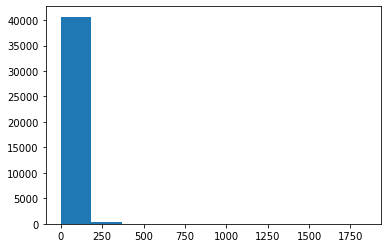

In [19]:
flat_stemmed_list = [item for sublist in total_stemmed_list for item in sublist]
flat_stemmed_len_list = [len(item) for sublist in total_stemmed_list for item in sublist]
print(flat_stemmed_len_list)

import matplotlib.pyplot as plt
plt.hist(flat_stemmed_len_list)

### Answer (d)

Create a bag of words representation

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
def bow_extractor(corpus, ngram_range=(1,1)):
    
    vectorizer = CountVectorizer(min_df=3, ngram_range=ngram_range,token_pattern=r'\b[^\d\W]+\b')
    features = vectorizer.fit_transform(corpus)
    return vectorizer, features


Build corpus arrays required for processing

In [21]:
print(len(total_stemmed_list))
flat_articles_corpus = []
flat_article_sentence_corpus = []
for article_list in total_stemmed_list:
  flat_article = ' '.join([' '.join(sentense) for sentense in article_list])
  flat_articles_corpus.append(flat_article)

  flat_sentence_list = [' '.join(sentense) for sentense in article_list]
  flat_article_sentence_corpus.append(flat_sentence_list)
print(len(flat_articles_corpus))

1725
1725


Validator function for different feature maps using k-means elbow method and sihouette score

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

def kmeans_validator(features_map,krange=range(2,10)):
  cluster_range = krange
  squared_distances = []
  silhouette_averages = []
  for num_clusters in cluster_range:
    # print(num_clusters)
    km = KMeans(n_clusters=num_clusters,
                  max_iter=10000)
    km.fit(features_map)
    squared_distances.append(km.inertia_)
    cluster_labels = km.fit_predict(features_map)
    # print(cluster_labels)
    silhouette_avg = silhouette_score(features_map, cluster_labels)
    silhouette_averages.append(silhouette_avg)
    print("For n_clusters =", num_clusters,
            "The average silhouette_score is :", silhouette_avg)


  plt.plot(cluster_range,squared_distances,'bx-')
  plt.xlabel("Cluster Range")
  plt.ylabel('Sum of Squared distances')
  plt.title('Elbow method plot for optimal cluster count')
  plt.show()

  plt.plot(cluster_range,silhouette_averages,'bx-')
  plt.xlabel("Cluster Range")
  plt.ylabel('Silhouette Averages')
  plt.title('Silhouette Average plot for optimal cluster count')
  plt.show()


from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


def tfidf_extractor(corpus, ngram_range=(1,1)):
    
    vectorizer = TfidfVectorizer(min_df=1, 
                                 norm='l2',
                                 smooth_idf=True,
                                 use_idf=True,
                                 ngram_range=ngram_range)
    features = vectorizer.fit_transform(corpus)
    return vectorizer, features

def display_features(features, feature_names):
    df = pd.DataFrame(data=features,
                      columns=feature_names)
    print(df)

Bag of words representation

For n_clusters = 2 The average silhouette_score is : 0.9196608852653897
For n_clusters = 3 The average silhouette_score is : 0.38652556351721906
For n_clusters = 4 The average silhouette_score is : 0.36380436568851754
For n_clusters = 5 The average silhouette_score is : 0.21811669799416186
For n_clusters = 6 The average silhouette_score is : 0.21819284319811177
For n_clusters = 7 The average silhouette_score is : 0.2160857291978888
For n_clusters = 8 The average silhouette_score is : 0.12164562905593607
For n_clusters = 9 The average silhouette_score is : 0.12656214835586022


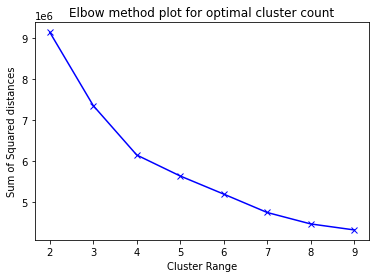

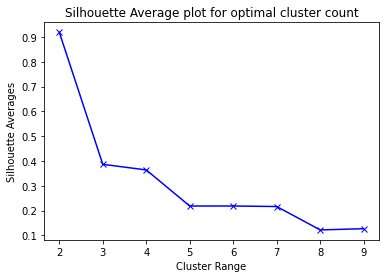

In [21]:
bow_vectorizer, bow_features = bow_extractor(flat_articles_corpus)
kmeans_validator(bow_features)

### Answer (e)

Get	a	better	‘signal’	for	identifying	more	crisp	clusters

Tfidf Representation

For n_clusters = 2 The average silhouette_score is : 0.009467731906155344
For n_clusters = 3 The average silhouette_score is : -7.044491151214364e-05
For n_clusters = 4 The average silhouette_score is : -0.0014137153050102801
For n_clusters = 5 The average silhouette_score is : -0.0009702634649808957
For n_clusters = 6 The average silhouette_score is : 0.0016103773266196316
For n_clusters = 7 The average silhouette_score is : -0.0005640538766968265
For n_clusters = 8 The average silhouette_score is : 0.0003281786233321246
For n_clusters = 9 The average silhouette_score is : -0.00041169780651169633


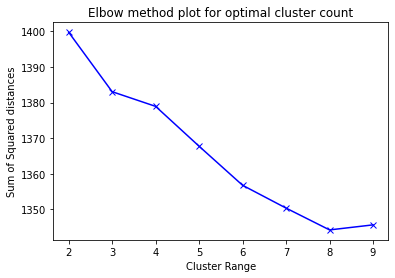

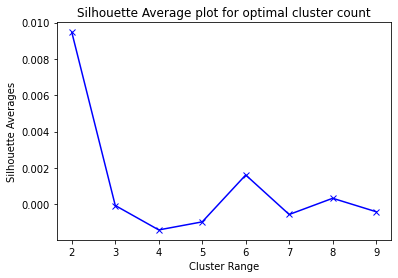

In [22]:
tfidf_vectorizer, tdidf_features = tfidf_extractor(flat_articles_corpus)
kmeans_validator(tdidf_features)

Bag of wards with bigram representation

For n_clusters = 2 The average silhouette_score is : 0.9249338626510628
For n_clusters = 3 The average silhouette_score is : 0.9024107271381472
For n_clusters = 4 The average silhouette_score is : 0.347553638923111
For n_clusters = 5 The average silhouette_score is : 0.3476704546752221
For n_clusters = 6 The average silhouette_score is : 0.19215891928446363
For n_clusters = 7 The average silhouette_score is : 0.18787882499750733
For n_clusters = 8 The average silhouette_score is : 0.18540093590403886
For n_clusters = 9 The average silhouette_score is : 0.09376803563905976


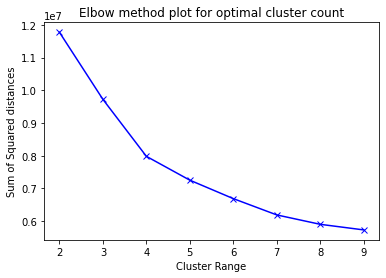

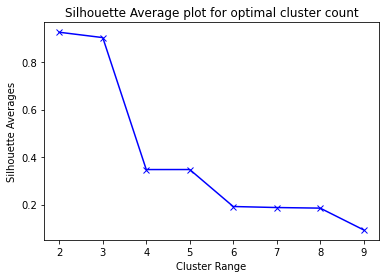

In [23]:
bow_vectorizer_2, bow_features_2 = bow_extractor(flat_articles_corpus,ngram_range=(1,2))
kmeans_validator(bow_features_2)

Tfidf with bigram representation

For n_clusters = 2 The average silhouette_score is : 0.0030905680017051414
For n_clusters = 3 The average silhouette_score is : -0.0012125071442043124
For n_clusters = 4 The average silhouette_score is : -0.00017305216690919573
For n_clusters = 5 The average silhouette_score is : -0.00019690331551954347
For n_clusters = 6 The average silhouette_score is : -0.0015652110537535263
For n_clusters = 7 The average silhouette_score is : 0.00035122459462254025
For n_clusters = 8 The average silhouette_score is : 0.0014793915573446635
For n_clusters = 9 The average silhouette_score is : 0.0020001514578051093


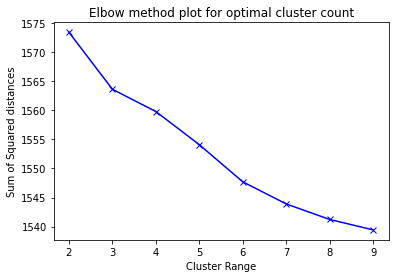

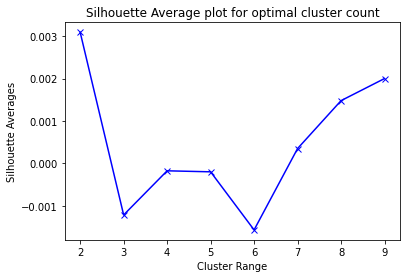

In [24]:
tfidf_vectorizer_2, tdidf_features_2 = tfidf_extractor(flat_articles_corpus,ngram_range=(1,2))
kmeans_validator(tdidf_features_2)

get low rank svd matrix using scipy.sparse.linalg's svds function 

In [24]:
from scipy.sparse.linalg import svds
    
def low_rank_svd(matrix, singular_count=1):
    u, s, vt = svds(matrix, k=singular_count)
    return u, s, vt


builds feature matrix with either count vectorizer or tfidf vectorizer

In [23]:
def build_feature_matrix(documents, feature_type='frequency'):

    feature_type = feature_type.lower().strip()  
    
    if feature_type == 'binary':
        vectorizer = CountVectorizer(binary=True, min_df=1, 
                                     ngram_range=(1, 1))
    elif feature_type == 'frequency':
        vectorizer = CountVectorizer(binary=False, min_df=1, 
                                     ngram_range=(1, 1))
    elif feature_type == 'tfidf':
        vectorizer = TfidfVectorizer(min_df=1, 
                                     ngram_range=(1, 1))
    else:
        raise Exception("Wrong feature type entered. Possible values: 'binary', 'frequency', 'tfidf'")

    feature_matrix = vectorizer.fit_transform(documents).astype(float)
    
    return vectorizer, feature_matrix



get sentense from the svd matrix

In [25]:
def get_low_rank_svd_sentense(dt_matrix,sentences):
  num_sentences = len(sentences)
  num_topics = 1
  
  td_matrix = dt_matrix.transpose()
  td_matrix = td_matrix.multiply(td_matrix > 0)
  u, s, vt = low_rank_svd(td_matrix,singular_count=num_topics) 

  sv_threshold = 0.5
  min_sigma_value = max(s) * sv_threshold
  s[s < min_sigma_value] = 0

  # Compute salience scores for all sentences in document
  salience_scores = np.sqrt(np.dot(np.square(s), np.square(vt)))
  # print(np.round(salience_scores, 2))

  # Rank sentences based on their salience scores
  top_sentence_indices = salience_scores.argsort()[-num_sentences:][::-1]
  top_sentence_indices.sort()

  # View the highest scoring sentence index positions
  # print(top_sentence_indices)

  top_sentences = []
  # # Get the document summary by combining the above sentences
  # # Compare the output with what gensim produces with its TextRank implementation
  for index in top_sentence_indices:
      top_sentences.append(sentences[index])

  return top_sentences

# kmeans_validator(svd_features)

calls above two function to get svd for the dataset
with bag of words vectorizer

displays the graphs for the generated matrix using kmeans validator function


For n_clusters = 2 The average silhouette_score is : 0.9196342254596798
For n_clusters = 3 The average silhouette_score is : 0.38593313066996315
For n_clusters = 4 The average silhouette_score is : 0.36317407225065923
For n_clusters = 5 The average silhouette_score is : 0.21950655962565893
For n_clusters = 6 The average silhouette_score is : 0.21539067759056402
For n_clusters = 7 The average silhouette_score is : 0.21965159542892732
For n_clusters = 8 The average silhouette_score is : 0.22510412807204866
For n_clusters = 9 The average silhouette_score is : 0.11827301603035707


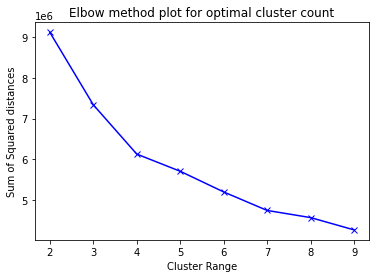

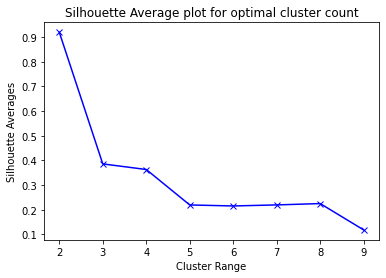

In [26]:
bow_svd_article_corpus = []
final_svd_flat_sentense_articles = []
errors = 0
for article in flat_article_sentence_corpus:
  try:
    vec, dt_matrix = build_feature_matrix(article, feature_type='frequency')
    svd_article = get_low_rank_svd_sentense(dt_matrix,article)
    bow_svd_article_corpus.append(' '.join(svd_article))
    final_svd_flat_sentense_articles.append(article)
  except:
    errors += 1
    


bow_vectorizer_svd, bow_features_svd = bow_extractor(bow_svd_article_corpus)
kmeans_validator(bow_features_svd)

calls above two function to get svd for the dataset with tfidf vectorizer

displays the graphs for the generated matrix using kmeans validator function

For n_clusters = 2 The average silhouette_score is : 0.005331561358174789
For n_clusters = 3 The average silhouette_score is : 0.0010000516888232268
For n_clusters = 4 The average silhouette_score is : 3.84882824595269e-05
For n_clusters = 5 The average silhouette_score is : -0.0017311503902535772
For n_clusters = 6 The average silhouette_score is : 0.0019289651262800523
For n_clusters = 7 The average silhouette_score is : -0.001884877928653214
For n_clusters = 8 The average silhouette_score is : -0.003474648001332989
For n_clusters = 9 The average silhouette_score is : 0.005289687521939597


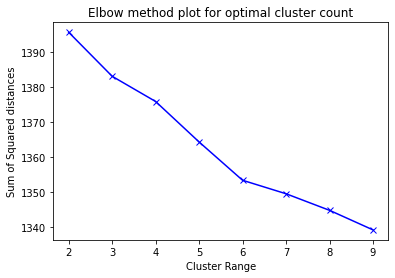

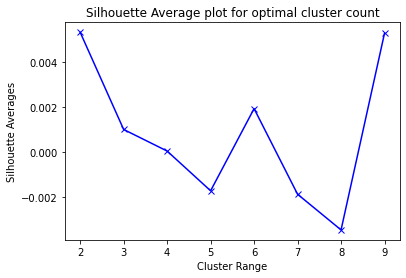

In [27]:
tfidf_svd_article_corpus = []

for article in flat_article_sentence_corpus:
  # print(article)
  try:
    vec, dt_matrix = build_feature_matrix(article, feature_type='tfidf')
    svd_article = get_low_rank_svd_sentense(dt_matrix,article)
    tfidf_svd_article_corpus.append(' '.join(svd_article))
  except:
    errors += 1
tfidf_vectorizer_svd, tdidf_features_svd = tfidf_extractor(tfidf_svd_article_corpus)
kmeans_validator(tdidf_features_svd)


Comprehensive results of the above outputs are as follows,

Evaluation technique | Elbow method | Silhouetter method
--- | --- | ---
BOW | 4 | 2 > 3 > 4
TFIDF | 3 | 2 > 6 > 8
BOW Bigram | 4 | 2 > 3 > 4
TFIDF Bigram | 3 | 2 > 9 > 8
BOW SVD | 4 | 2 > 3 > 4
TFIDF SVD | 4 | 2 > 8 > 3


Going through the above comparison table,
I assume the best number of clusters for the above data-set is 4



In [28]:
# write final dataset to csv
articledf = pd.DataFrame(tfidf_svd_article_corpus)
csv_data = articledf.to_csv('article_corpus.csv',index=False)

### Answer (f)

improve	the	categorization	of	news	articles	in order	to	create	a	predictive	model

for improved predictions, most promising things to do are,

*   Use a larger dataset
*   Use a laeled dataset
*   improve the data cleaning
*   Use the labeled dataset to model a prediction with an algorithm that suits better.

Although, For this task i will create a labeled dataset using the previous classification parameters and try to build a prediction model with higher accuracy

In [29]:
import pandas as pd 

processed_data = 'https://github.com/damithdev/public_files/blob/master/article_corpus.csv?raw=true'

articledf = pd.read_csv(processed_data)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=1,ngram_range=(1, 1))
X = vectorizer.fit_transform(tfidf_svd_article_corpus)

true_k = 4
model = KMeans(n_clusters=true_k,max_iter=10000)
model.fit(X)
clusters = model.labels_
articledf['cluster'] = clusters

csv_data = articledf.to_csv('article_labeled.csv',index=False)

In [79]:
from sklearn import metrics
import numpy as np

def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        2))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        2))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        2))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        2))
    

def train_predict_evaluate_model(classifier, 
                                 train_features, train_labels, 
                                 test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    # evaluate model prediction performance   
    get_metrics(true_labels=test_labels, 
                predicted_labels=predictions)
    return classifier , predictions

In [80]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(articledf, articledf.cluster, 
                                                        test_size=0.33, random_state=42)



from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier   

tfidf_vectorizer, tfidf_train_features = tfidf_extractor(train_X['0'])  
tfidf_test_features = tfidf_vectorizer.transform(test_X['0'])    

mnb = MultinomialNB()
svm = SGDClassifier(loss='hinge')

mnb_classifier, mnb_predictions = train_predict_evaluate_model(classifier=mnb,
                                           train_features=tfidf_train_features,
                                           train_labels=train_Y,
                                           test_features=tfidf_test_features,
                                           test_labels=test_Y)

svm_classifier, svm_predictions = train_predict_evaluate_model(classifier=svm,
                                           train_features=tfidf_train_features,
                                           train_labels=train_Y,
                                           test_features=tfidf_test_features,
                                           test_labels=test_Y)

#SVM classifier with SGD seems to perform better

Accuracy: 0.67
Precision: 0.44
Recall: 0.67
F1 Score: 0.53
Accuracy: 0.94
Precision: 0.95
Recall: 0.94
F1 Score: 0.94


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
def predict_text(text):
  tfidf_sample_features = tfidf_vectorizer.transform([text])
  prediction = svm_classifier.predict(tfidf_sample_features)
  print(prediction)

In [95]:
predict_text(tfidf_svd_article_corpus[66])

[2]


### Answer (g)

fit a deep learning model that generalizes a predictive model
for news classification

In [101]:
import pandas as pd 

labeled_data = 'https://github.com/damithdev/public_files/blob/master/article_labeled.csv?raw=true'

df = pd.read_csv(labeled_data)
df.head()


,0,cluster
0,white hous chief of staff say stimulus negoti ...,1
1,xinjiang capit in wartim lockdown over spike i...,1
2,lindsay lohan denni quaid and other star from ...,2
3,for mani student who tri to take the act test ...,1
4,these are the state requir peopl to wear mask ...,1


In [109]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['0'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 50320 unique tokens.


In [110]:
X = tokenizer.texts_to_sequences(df['0'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (1721, 250)


In [111]:
Y = pd.get_dummies(df['cluster']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (1721, 4)


In [112]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1548, 250) (1548, 4)
(173, 250) (173, 4)


In [117]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, Embedding, LSTM, Bidirectional, SpatialDropout1D
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1393 samples, validate on 155 samples
Epoch 1/5
1393/1393 [==============================] - 10s 7ms/step - loss: 1.1745 - accuracy: 0.6181 - val_loss: 0.9606 - val_accuracy: 0.6194
Epoch 2/5
1393/1393 [==============================] - 10s 7ms/step - loss: 0.9468 - accuracy: 0.6425 - val_loss: 0.8897 - val_accuracy: 0.6194
Epoch 3/5
1393/1393 [==============================] - 10s 7ms/step - loss: 0.8942 - accuracy: 0.6425 - val_loss: 0.8498 - val_accuracy: 0.6194
Epoch 4/5
1393/1393 [==============================] - 9s 7ms/step - loss: 0.7682 - accuracy: 0.6892 - val_loss: 0.8532 - val_accuracy: 0.6710
Epoch 5/5
1393/1393 [==============================] - 10s 7ms/step - loss: 0.6041 - accuracy: 0.7954 - val_loss: 0.7551 - val_accuracy: 0.7548


In [118]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

173/173 [==============================] - 0s 2ms/step
Test set
  Loss: 0.741
  Accuracy: 0.728


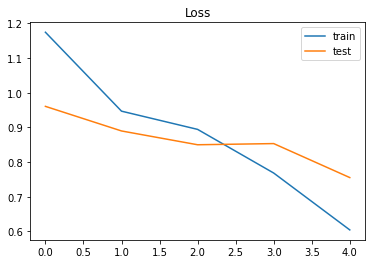

In [119]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

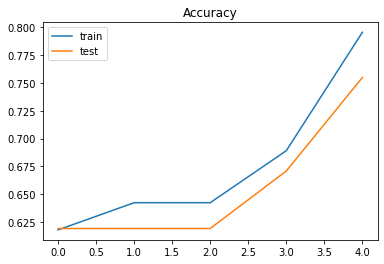

In [122]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [128]:
new_complaint = ['I am a victim of identity theft and someone stole my identity and personal information to open up a Visa credit card account with Bank of America. The following Bank of America Visa credit card account do not belong to me : XXXX.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)

print(pred, "Predicted type : "+ str(np.argmax(pred)))

[[0.00710686 0.10279807 0.8547524  0.03534256]] Predicted type : 2
